In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl

# setting parameters for default matplotlib plots
%matplotlib inline
pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
pl.rcParams['xtick.labelsize'] = 7
pl.rcParams['ytick.labelsize'] = 7
pl.rcParams['axes.labelsize'] = 7

# needs to find the library of functions
sys.path.append('../../../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
NOTEBOOK_NAME = 'psth_Odors'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [10]:
folder = './autorestore/preprocessing_Odors/'
for var in ('time_ax', 'time_ax_single','events', 'cycles','licks',
            'CYCLE_START', 'ANALYSIS_WINDOW',
            'US_START', 'US_DURATION',
            'is_femalet', 'is_coyotet'): 
    exec('%s = ut.load_variable(\'%s\', folder=\'%s\')'%(var, var, folder))
    
folder = './autorestore/selectivity_Odors/'
for var in 'selectivity',: 
    exec('%s = ut.load_variable(\'%s\', folder=\'%s\')'%(var, var, folder))
    

In [11]:
bool_filter = np.r_[[False]*len(events)]

baseline_period = (US_START-CYCLE_START-ANALYSIS_WINDOW, US_START-CYCLE_START)

for s, e in cycles:
    bool_filter[(time_ax>=(s-CYCLE_START+baseline_period[0])) *
                (time_ax<(s-CYCLE_START+baseline_period[1]))] = True

evs_means = np.zeros(events.shape[1])
for cell in xrange(events.shape[1]):
    evs_means[cell] = events[:, cell][bool_filter * (events[:, cell]>0)].mean(0)

/home/fabios/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: Mean of empty slice.
/home/fabios/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
# def plot_hm(cell, iso, ax, vmax=5, t_pre=6, t_post=6):

#     alldffs = ut.compute_all_dffs(time_ax, events, cell, cycles[iso], time_ax_single)
#     im = ax.imshow(alldffs, origin='lower', aspect='auto',
#               extent=(time_ax_single[0], time_ax_single[-1], 0, len(cycles[iso])))
#     pt.nicer_plot(ax)
#     ax.set_xlim(-t_pre, t_post+CS_DURATION)

#     return im

# def plot_mean(cell, iso, ax, vmax=5, t_pre=6, t_post=6, color='k'):

#     alldffs = ut.compute_all_dffs(time_ax, events, cell, cycles[iso], time_ax_single)
#     ax.plot(time_ax_single, np.mean(alldffs, 0), lw=1, color=color)
#     m = np.mean(alldffs, 0)
#     s = np.std(alldffs, 0)/np.sqrt(np.sum(iso)-1)
#     ax.fill_between(time_ax_single, m-s, m+s,
#                      lw=0, color=color, zorder=0, alpha=0.2)
#     for s in ax.spines.values():
#         s.set_visible(False)
#     ax.set_xticks(())
#     ax.set_yticks(())
#     pt.nicer_plot(ax)

#     ax.set_xlim(-t_pre, t_post+CS_DURATION)

#     return


In [13]:
delta_t = min(np.diff(time_ax))

def plot_panel(cell, cycles, trial_types_top, trial_types_bottom,
               lick_trials_top, lick_trials_bottom, delta_t=delta_t,
               colortop='b', colorbottom='r', cmap=pl.cm.jet, cs_color='r', us_color='k',
               t_start=-6, t_stop=6, vmax=1):
    fig, axs = pl.subplots(3, 2, figsize=(3, 4),
                           gridspec_kw={'width_ratios':(1, .1), 'height_ratios':(2, 4, 4)},)

    for iso, ax, ax0 in zip(trial_types_top, axs[1], axs[0]):
        alldffs = ut.compute_all_dffs(time_ax, events, cell, cycles[iso], time_ax_single)
        im = ax.imshow(alldffs/np.max(alldffs), origin='lower', aspect='auto', vmax=vmax,
                  extent=(time_ax_single[0], time_ax_single[-1], 0, len(cycles[iso])), cmap=cmap)
        ax0.plot(time_ax_single, np.mean(alldffs, 0), lw=0.5, color=colortop)
        m = np.mean(alldffs, 0)
        s = np.std(alldffs, 0)/np.sqrt(np.sum(iso)-1)
        ax0.fill_between(time_ax_single, m-s, m+s,
                         lw=0, color=colortop, zorder=0, alpha=0.2)
        ax0.set_ylim(-1, 5)
        ax.vlines(US_START, 0, np.sum(iso), color='r', lw=0.5)


    for iso, ax, ax0 in zip(trial_types_bottom, axs[2], axs[0]):
        alldffs = ut.compute_all_dffs(time_ax, events, cell, cycles[iso], time_ax_single)
        im = ax.imshow(alldffs/np.max(alldffs), origin='lower', aspect='auto', vmax=vmax,
                  extent=(time_ax_single[0], time_ax_single[-1], 0, len(cycles[iso])), cmap=cmap)
        ax0.plot(time_ax_single, np.mean(alldffs, 0), lw=0.5, color=colorbottom)
        m = np.mean(alldffs, 0)
        s = np.std(alldffs, 0)/np.sqrt(np.sum(iso)-1)
        ax0.fill_between(time_ax_single, m-s, m+s,
                         lw=0, color=colorbottom, zorder=0, alpha=0.2)
        ax0.set_ylim(-1, 5)
        ax.vlines(US_START, 0, np.sum(iso), color='r', lw=0.5)


    ax = axs[1][-1]
    fig.colorbar(im, cax=ax, orientation='vertical', ticks=(0, vmax) )
    ax.set_xticks(())
    ax.set_yticks((0, 10))
    ax.text(-0.5, 0.7, 'Normalized event magnitude', rotation=90, ha='center', fontsize=3)

    for ax in axs.flatten():
        pt.remove_axes(ax)
    
    axs[1][0].set_ylabel("Cell #%d" % (cell+1), rotation=0, ha='right', fontsize=5)

    for ax, iso in zip(axs[0], trial_types_bottom):
        ax.set_clip_on(False)
        pt.plot_period_bar(ax, -0.5, delta_y=.3, color=us_color,
                           start_end=(US_START, ANALYSIS_WINDOW))
        
        
#    pt.plot_licks(cycles[:, 0][lick_trials_top]-CYCLE_START, licks, color='b', ax=axs[1][1])
#    pt.plot_licks(cycles[:, 0][lick_trials_bottom]-CYCLE_START, licks, color='r', ax=axs[2][1])
    
    for a in axs:
        for ax in a[:-1]:
            ax.set_xlim(t_start, t_stop)
    
#    for ax, iso in zip(axs[0], trial_types_bottom):
#        ax.set_ylim(0, np.sum(iso))
#        ax.set_clip_on(False)

    return fig, axs

In [14]:
!mkdir ../img

mkdir: cannot create directory ‘../img’: File exists


/home/fabios/anaconda2/lib/python2.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")
/home/fabios/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


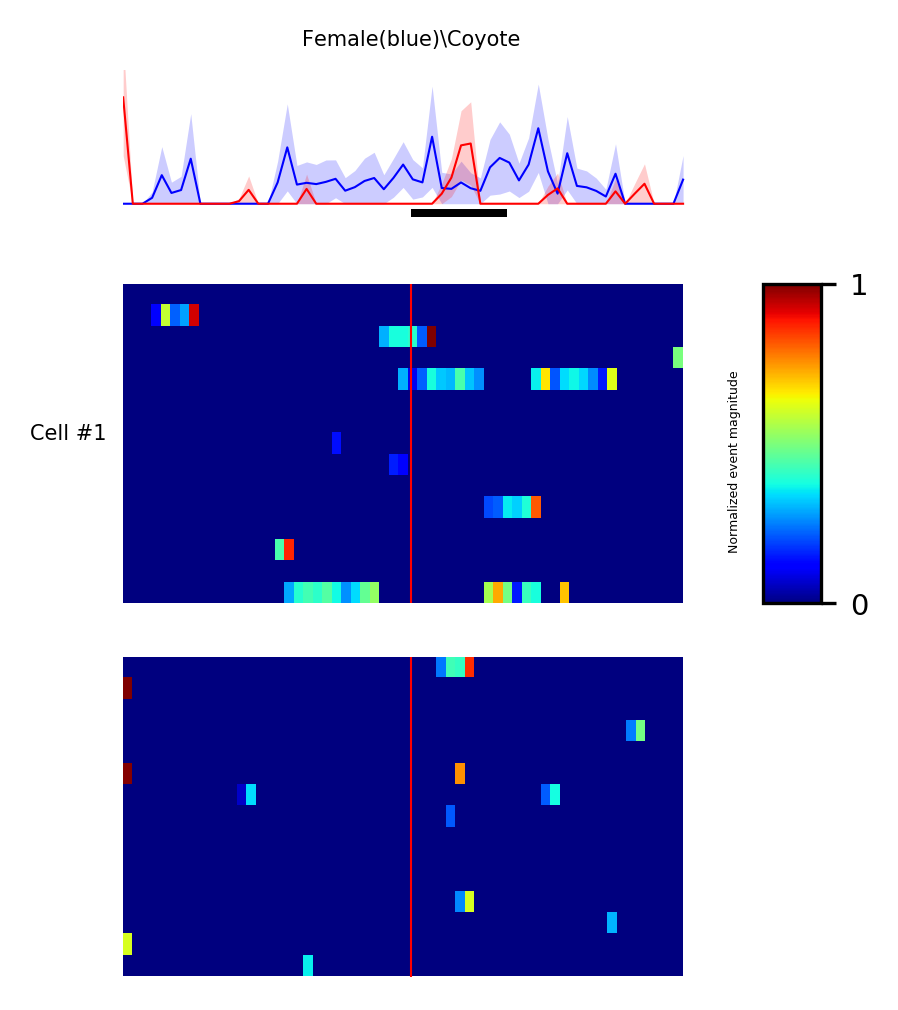

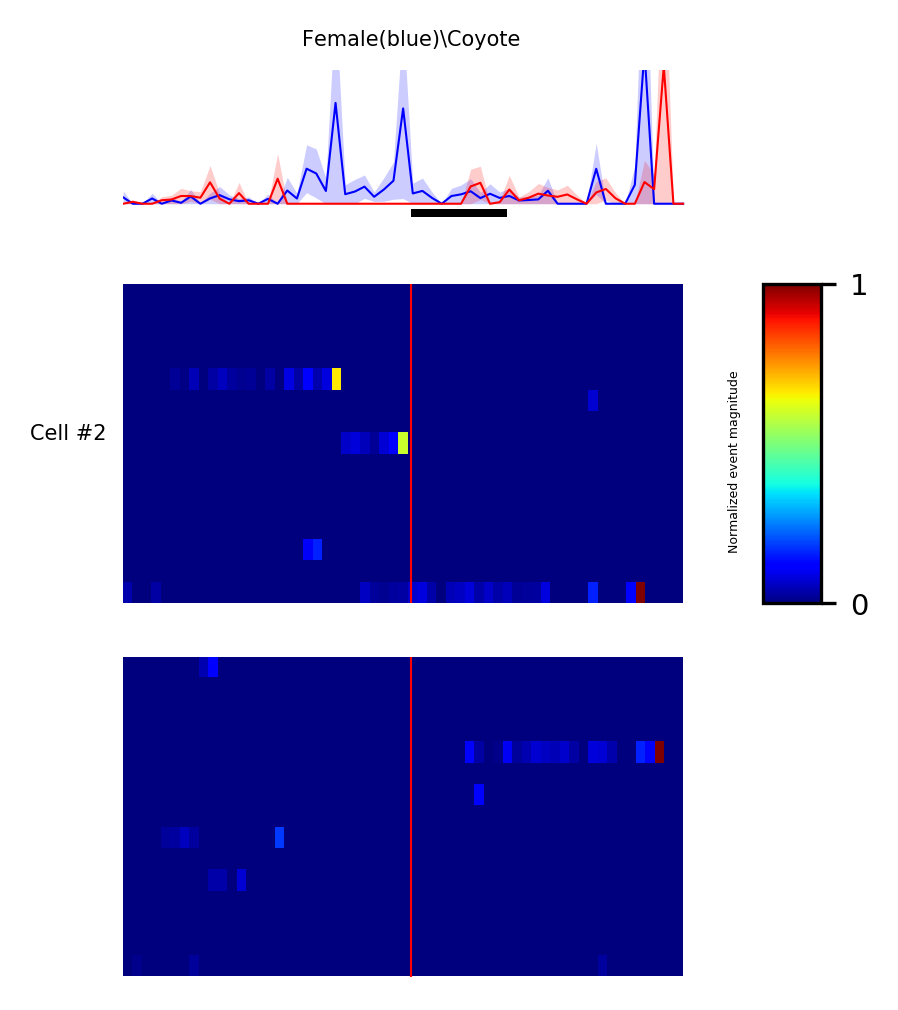

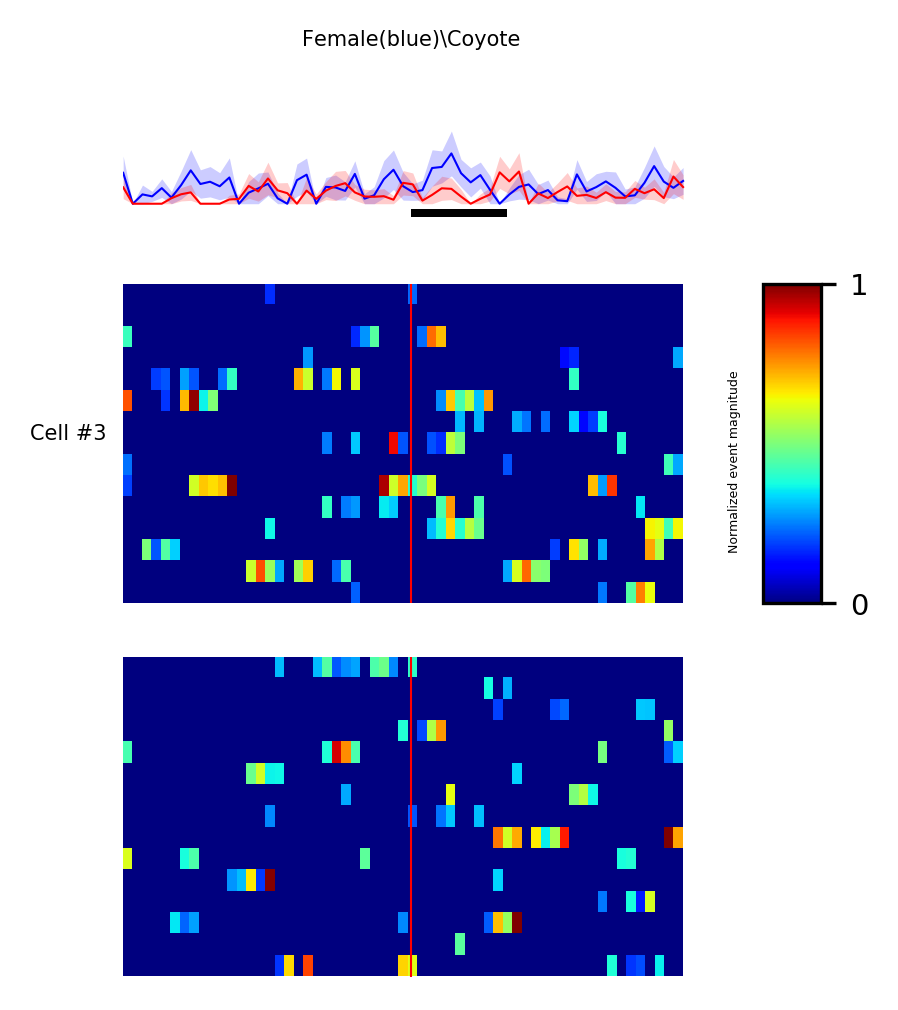

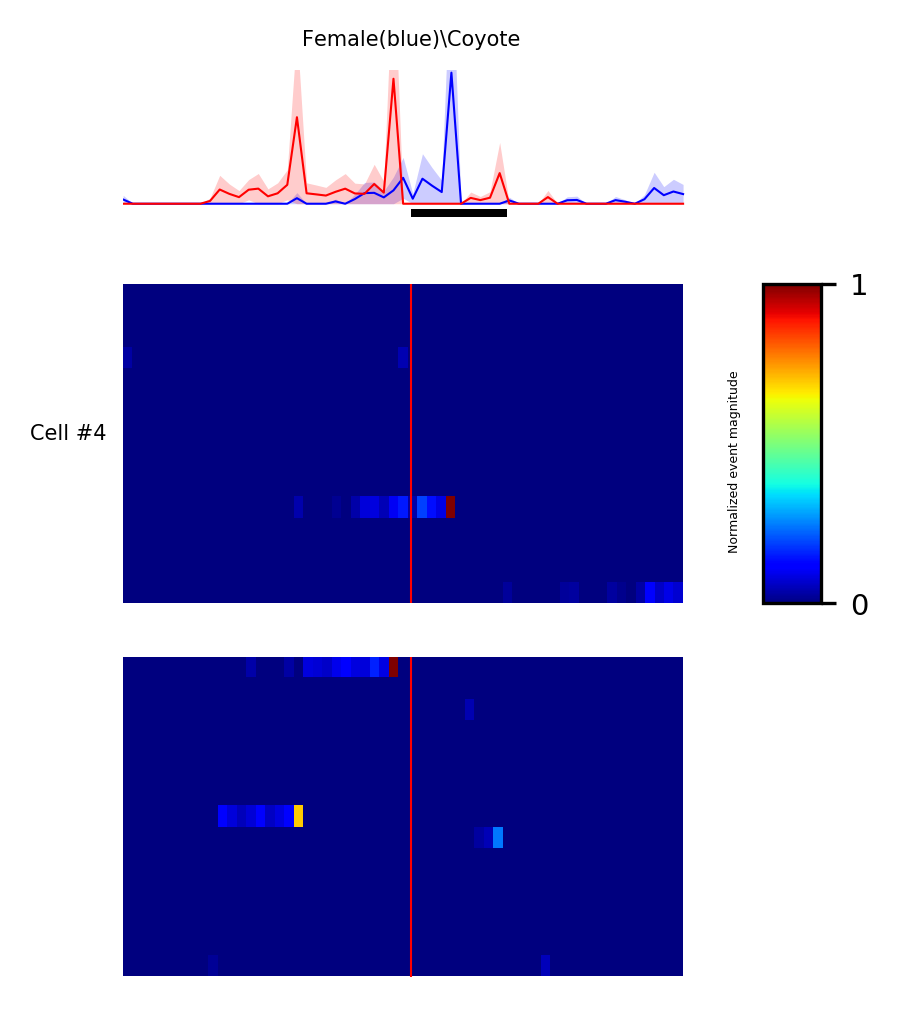

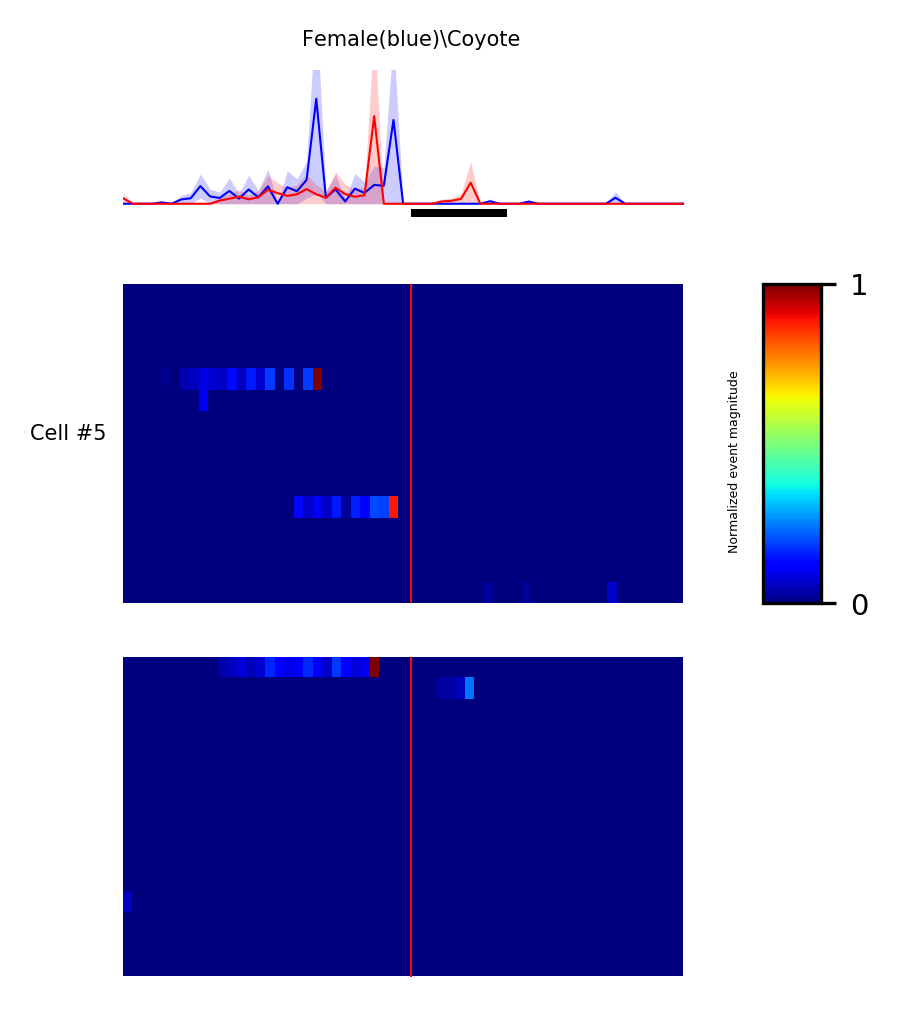

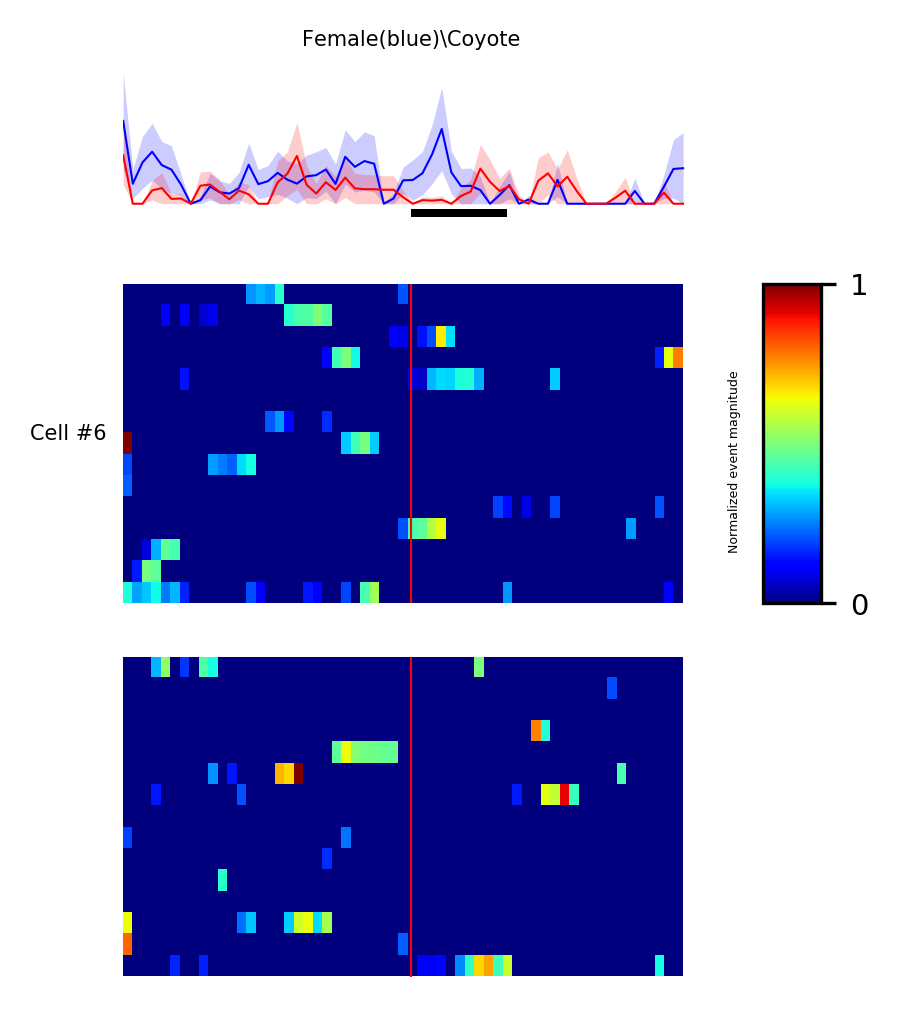

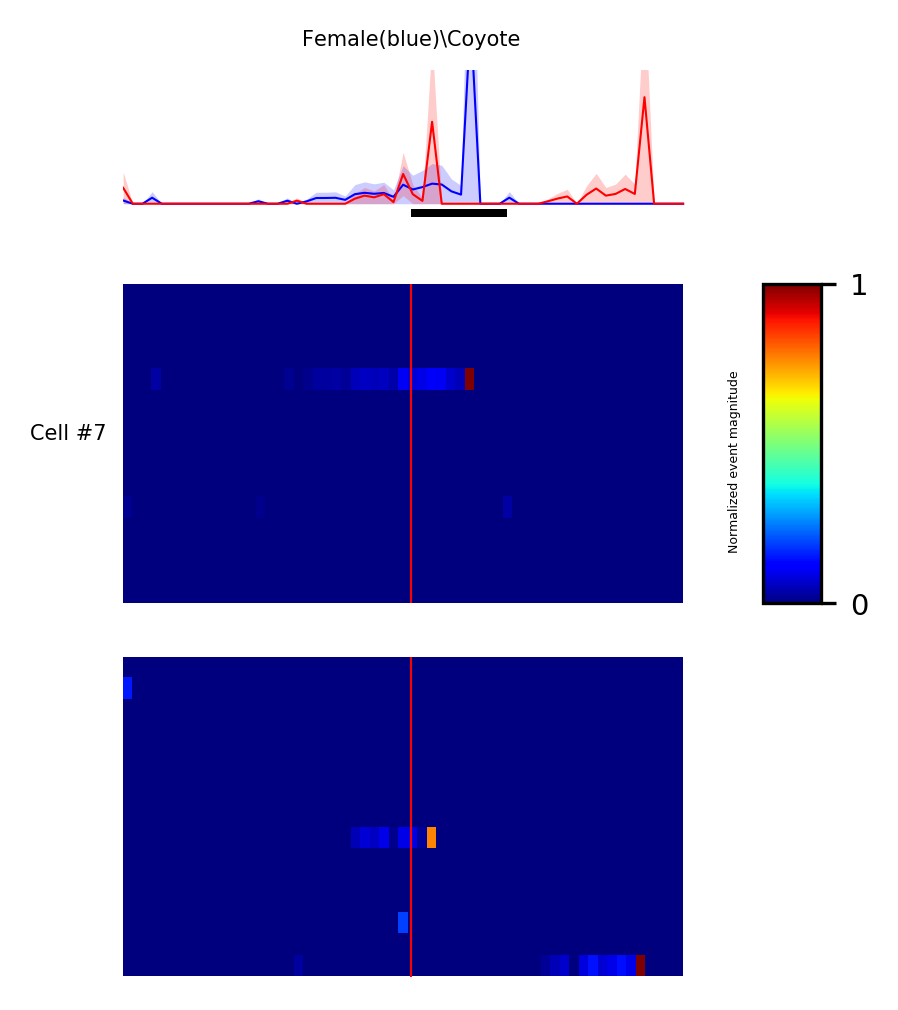

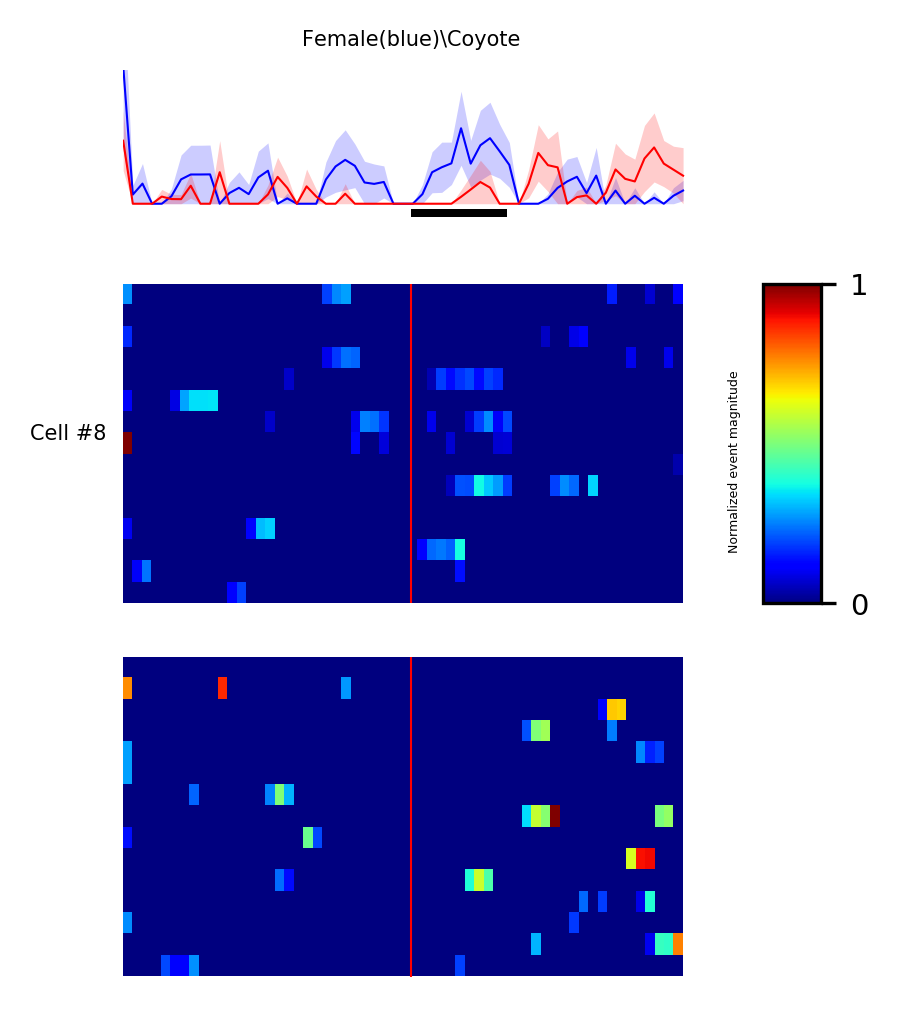

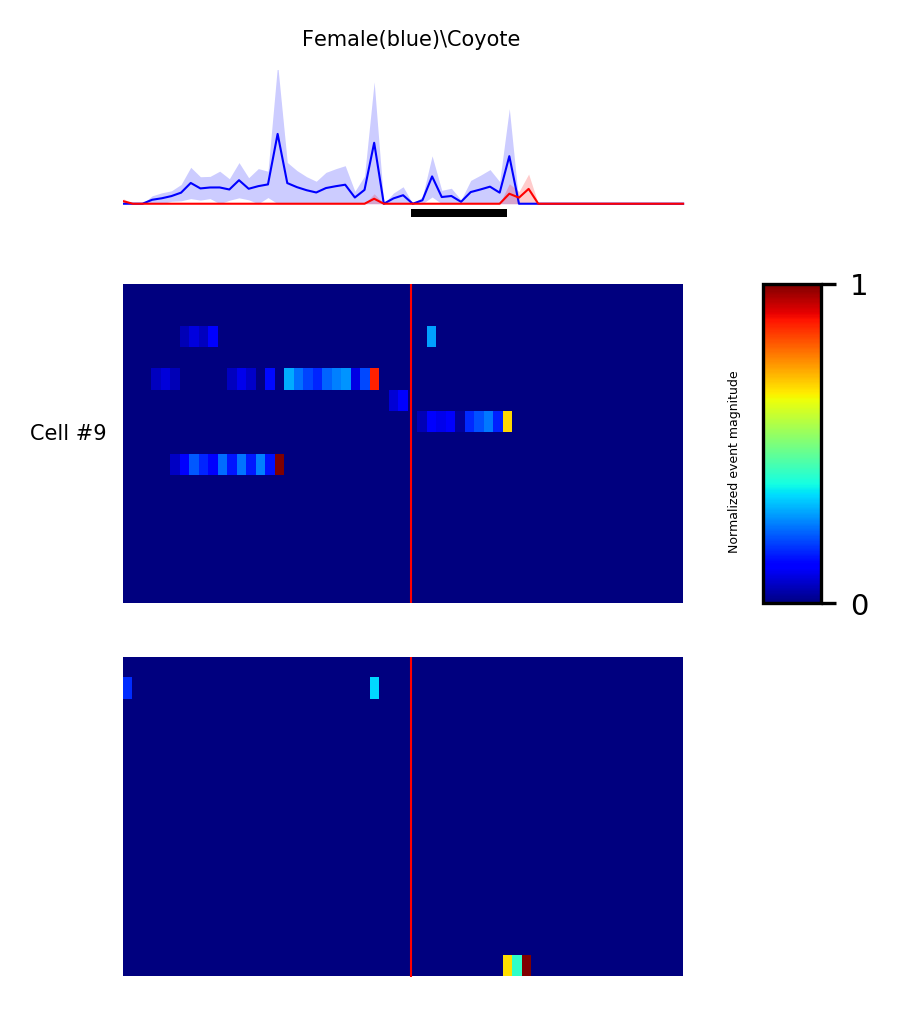

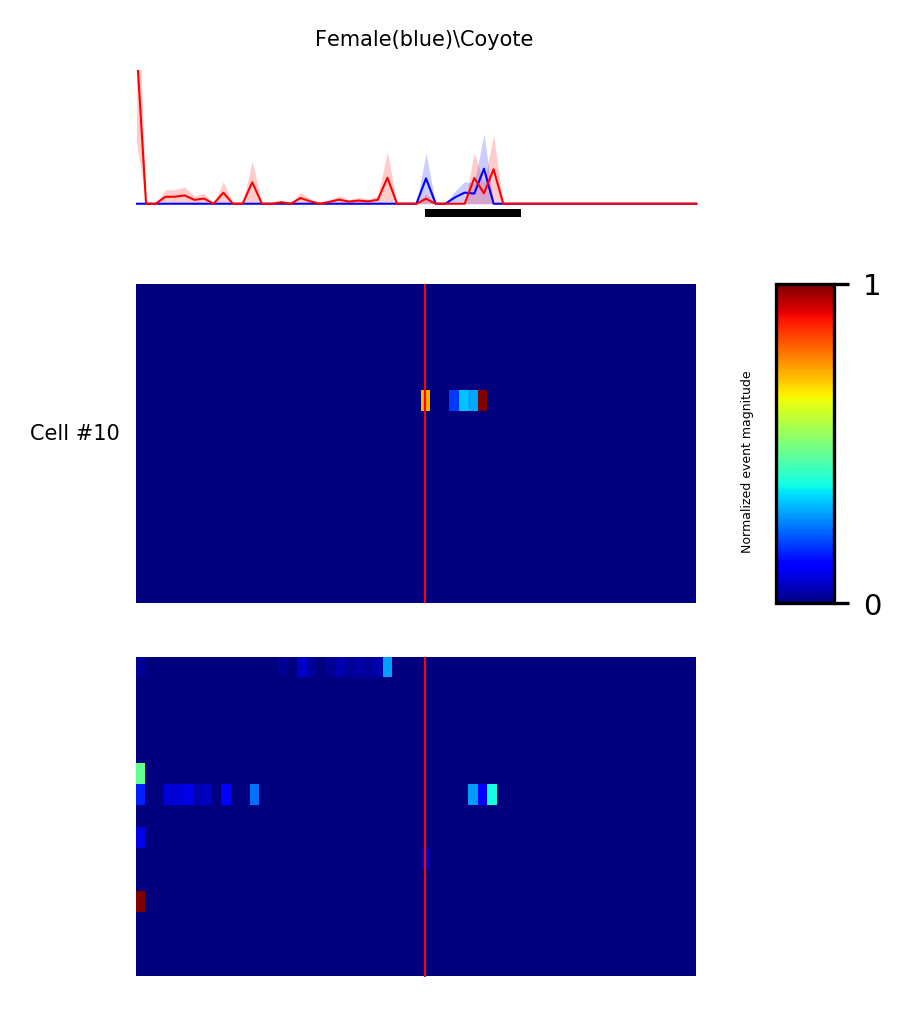

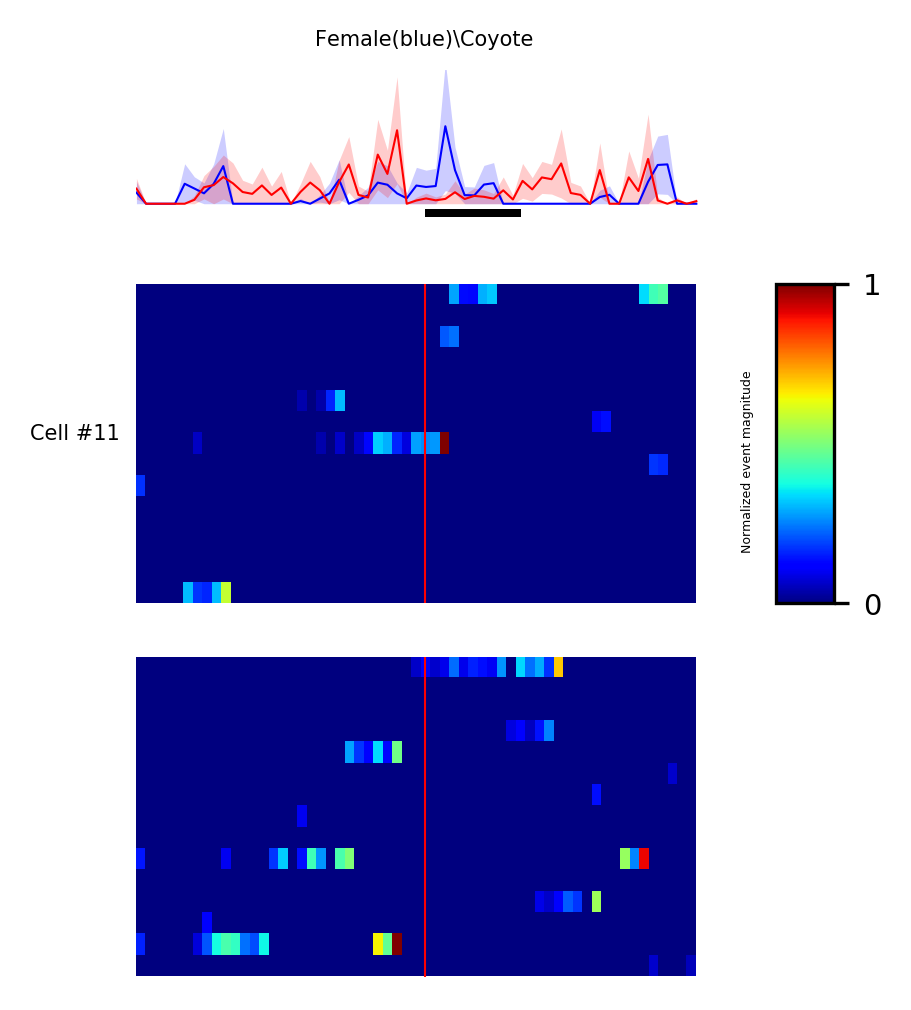

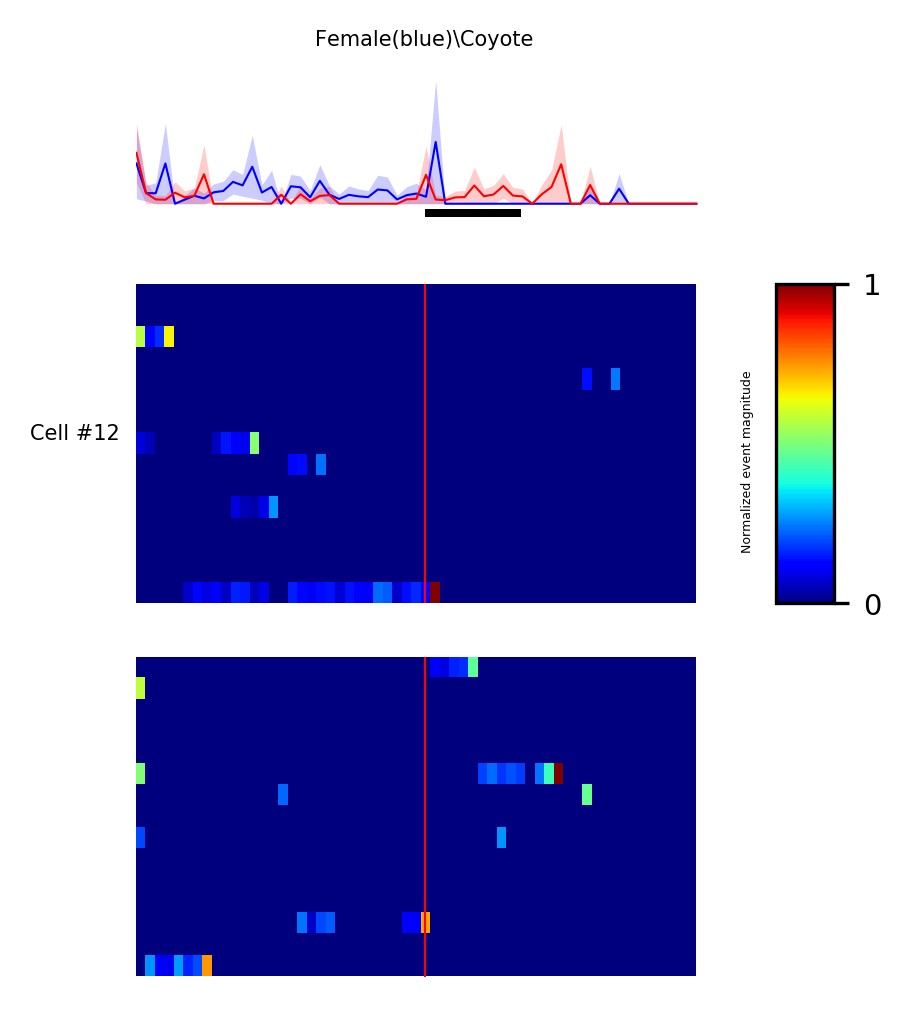

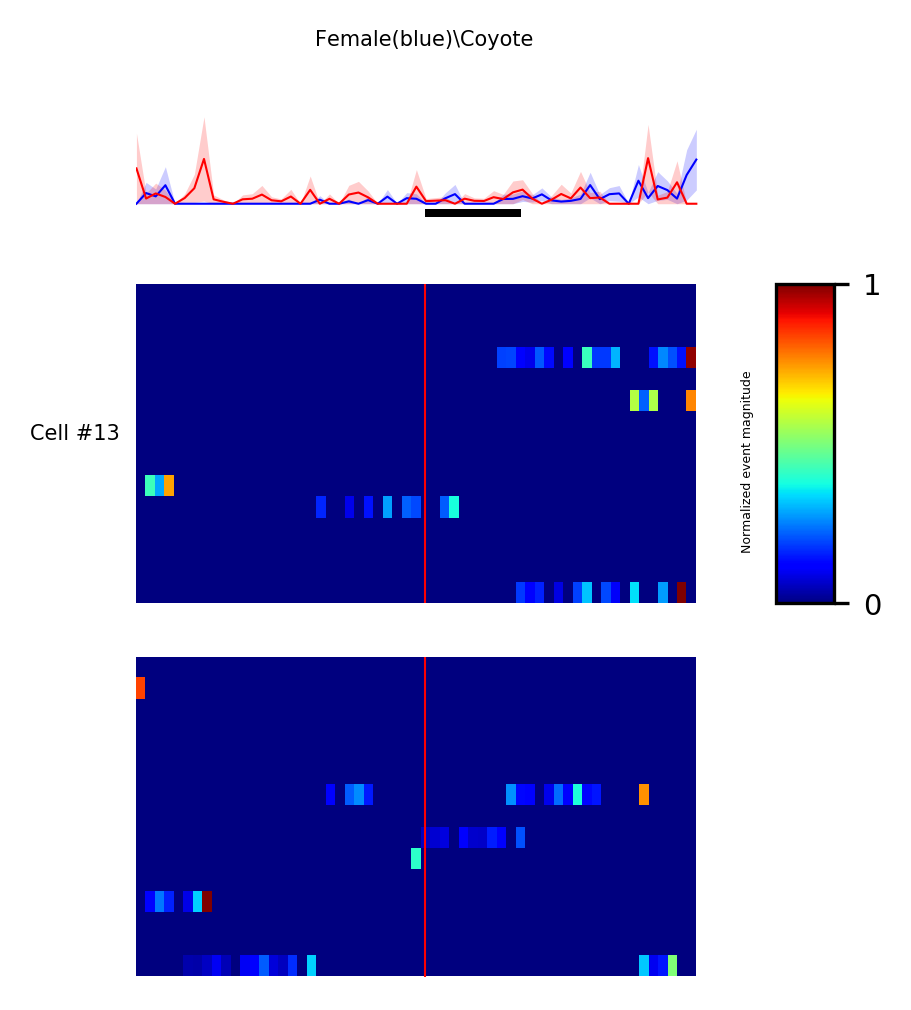

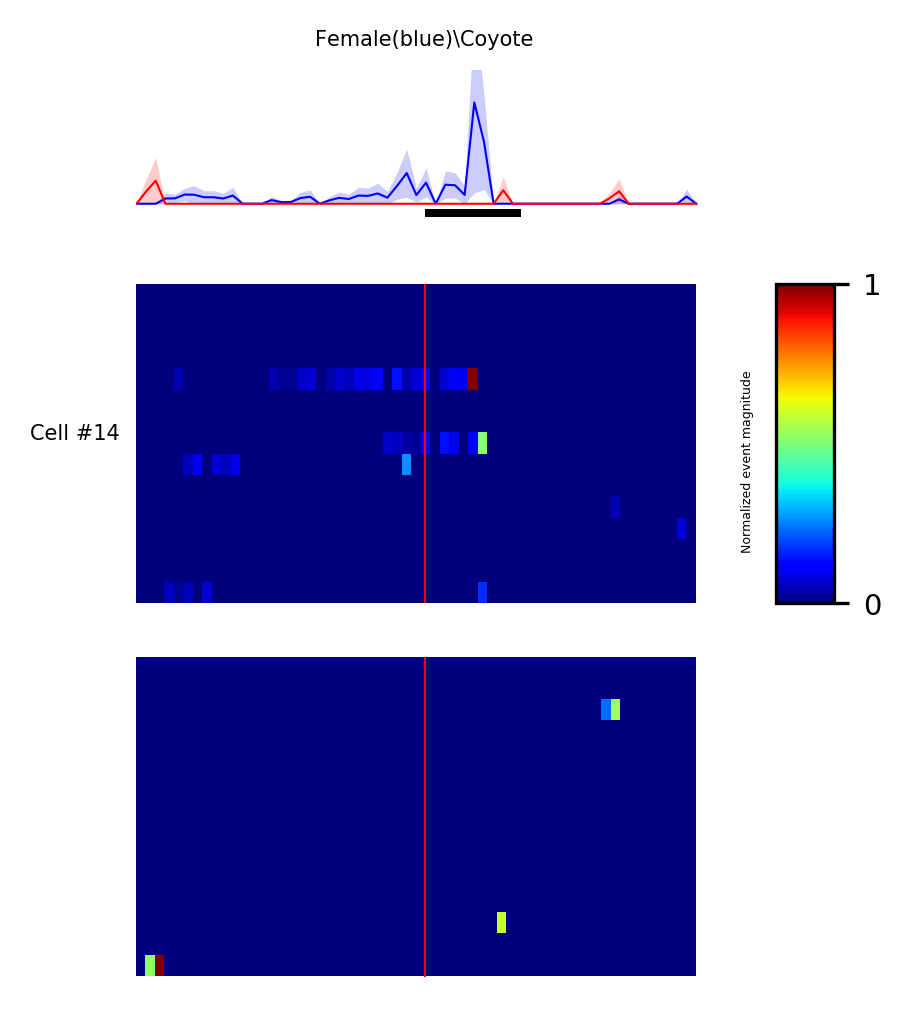

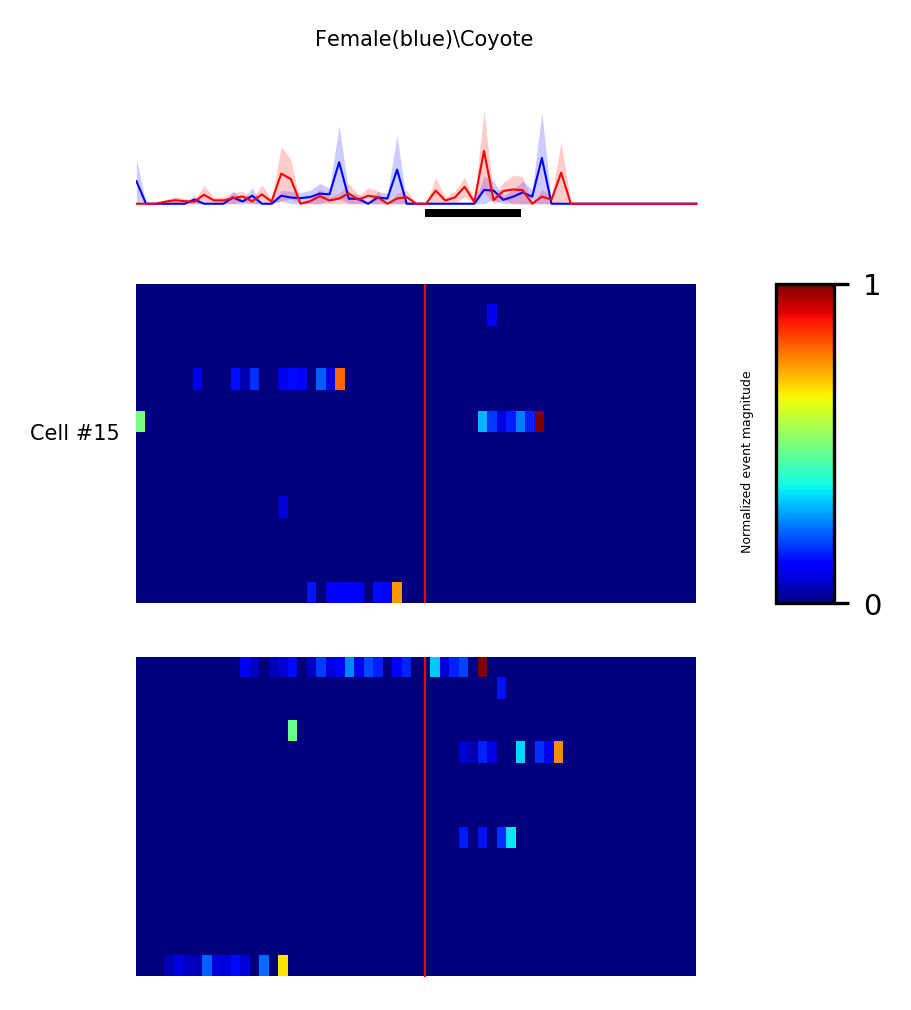

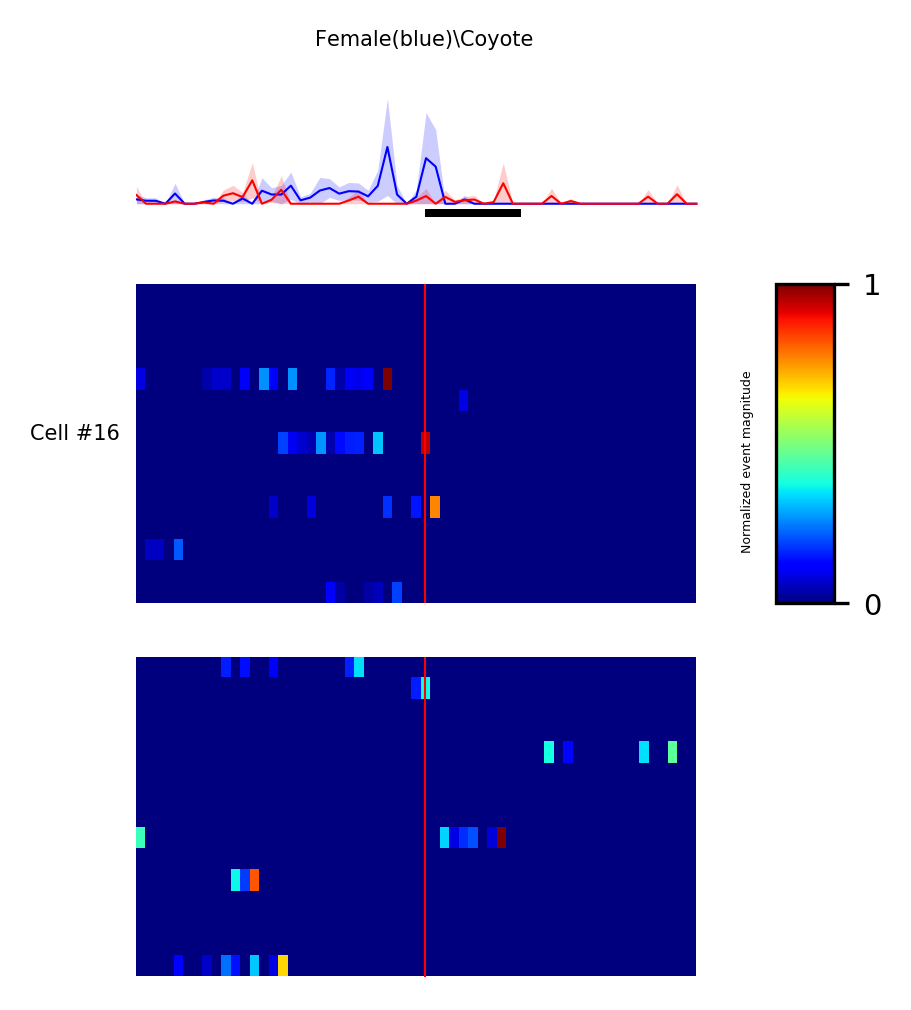

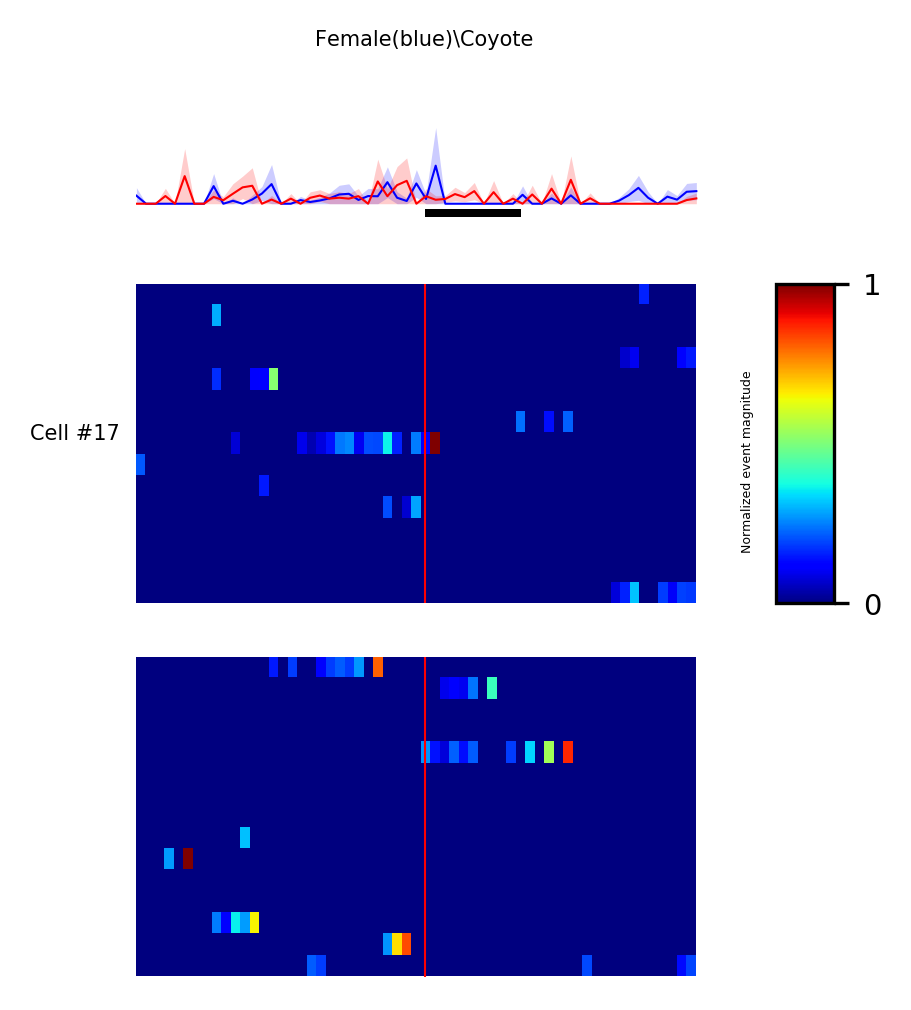

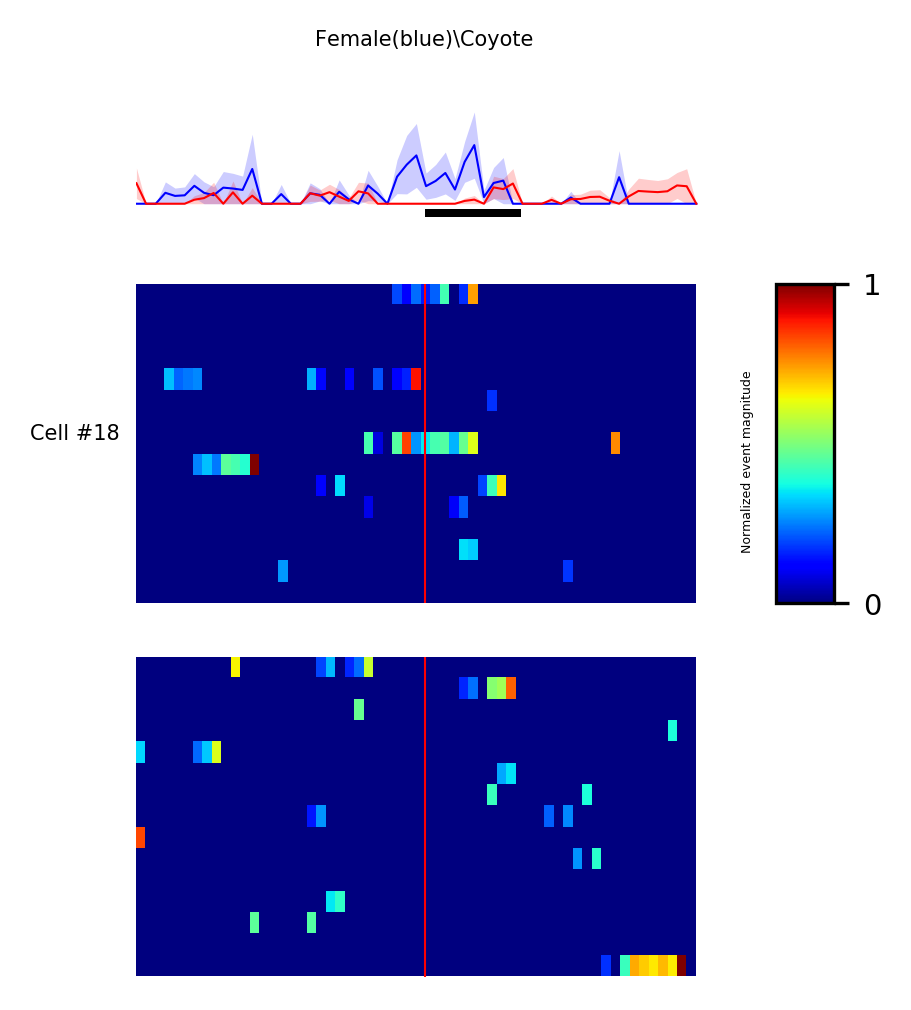

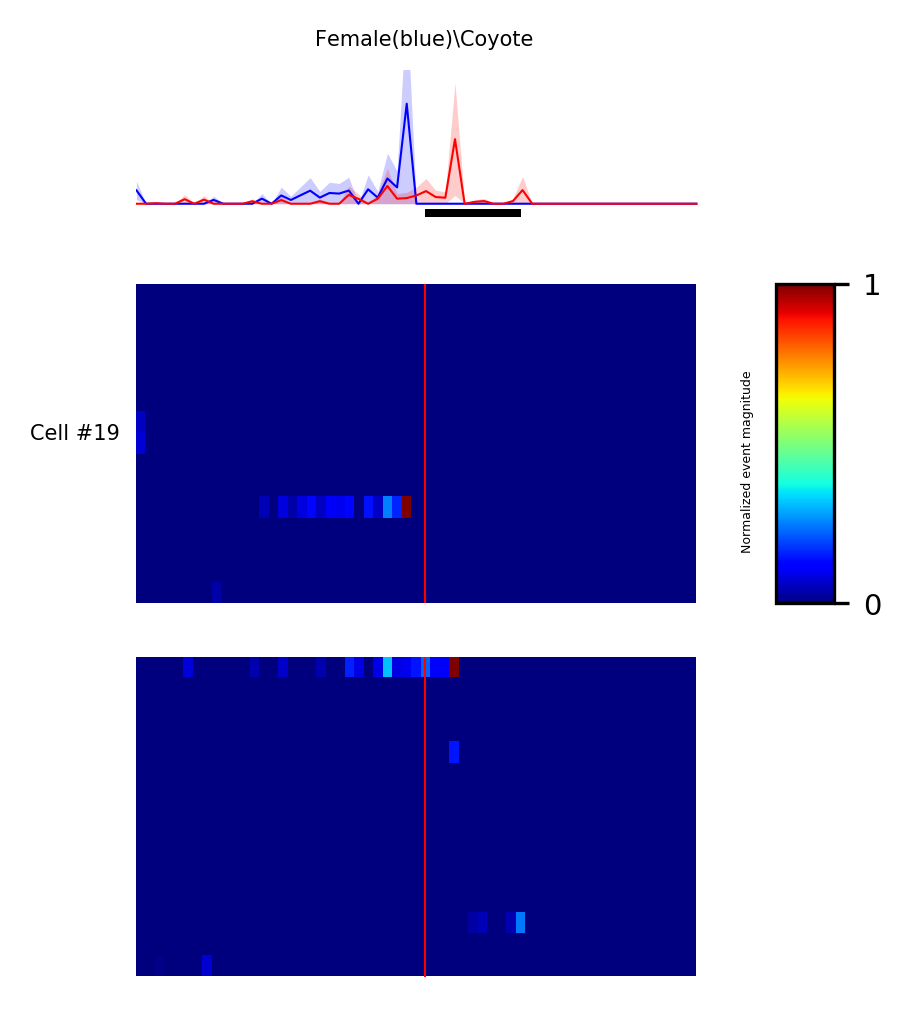

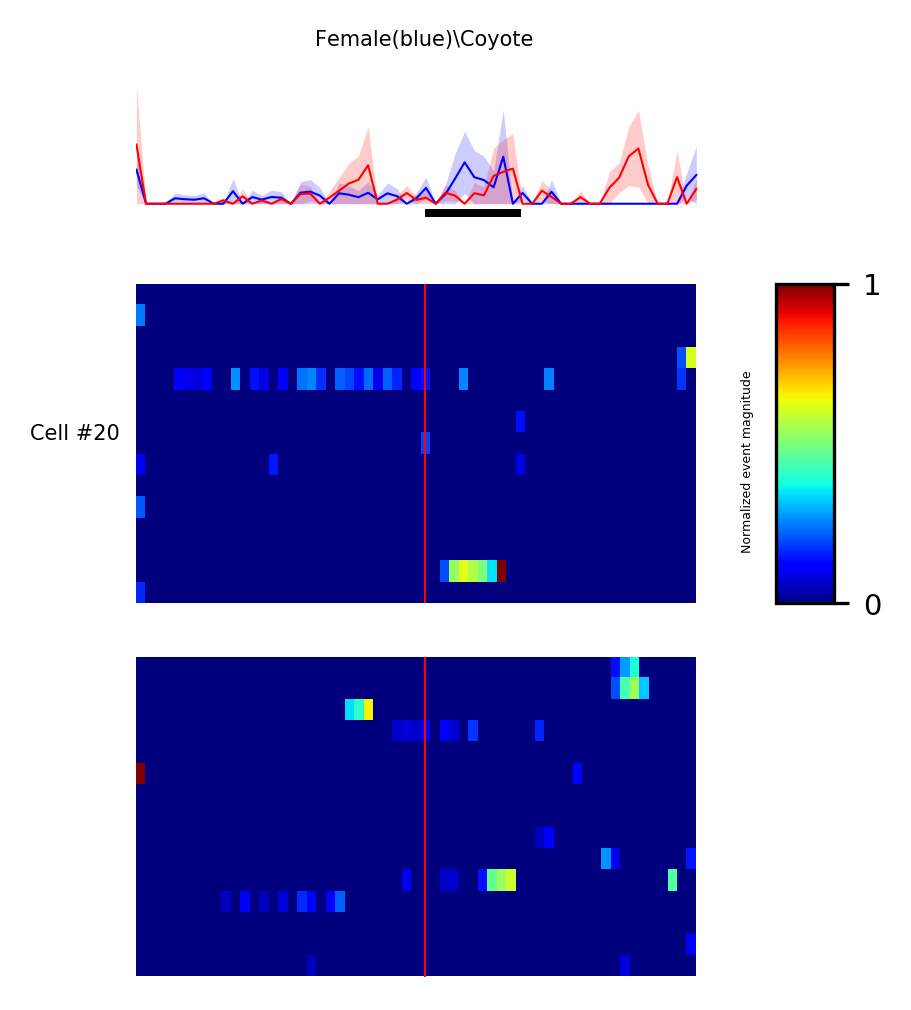

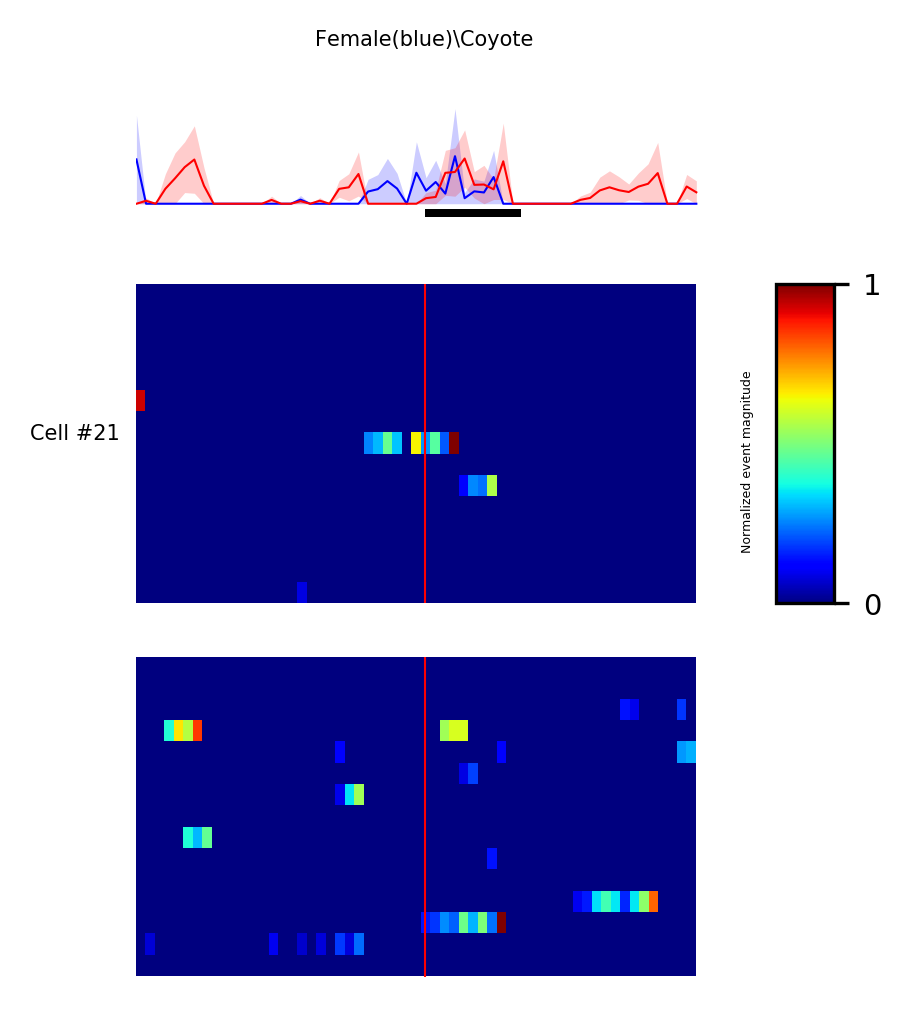

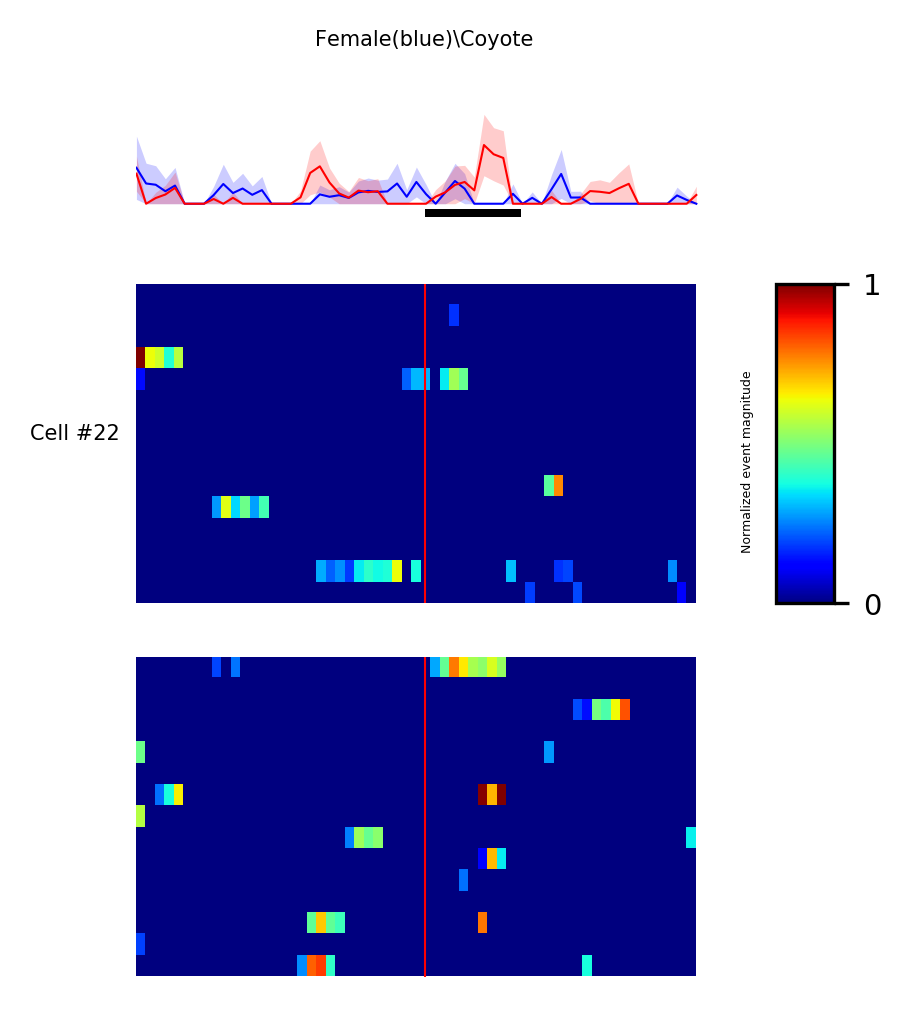

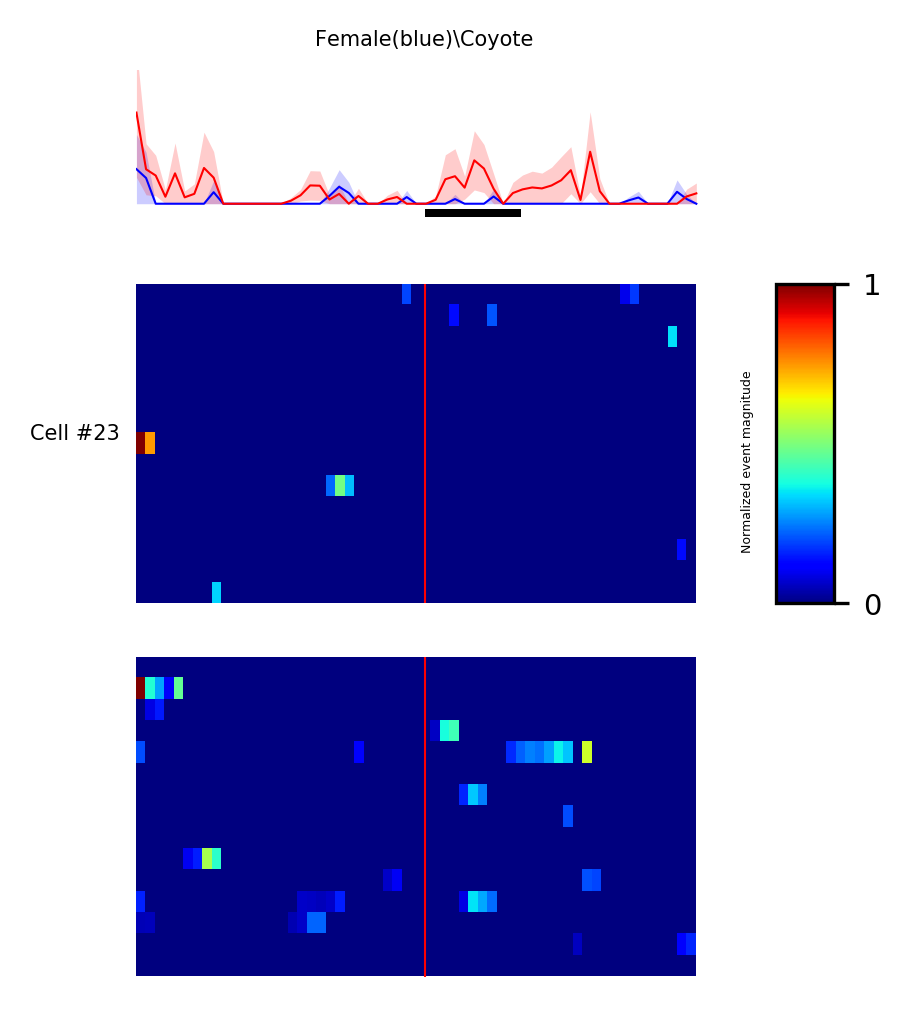

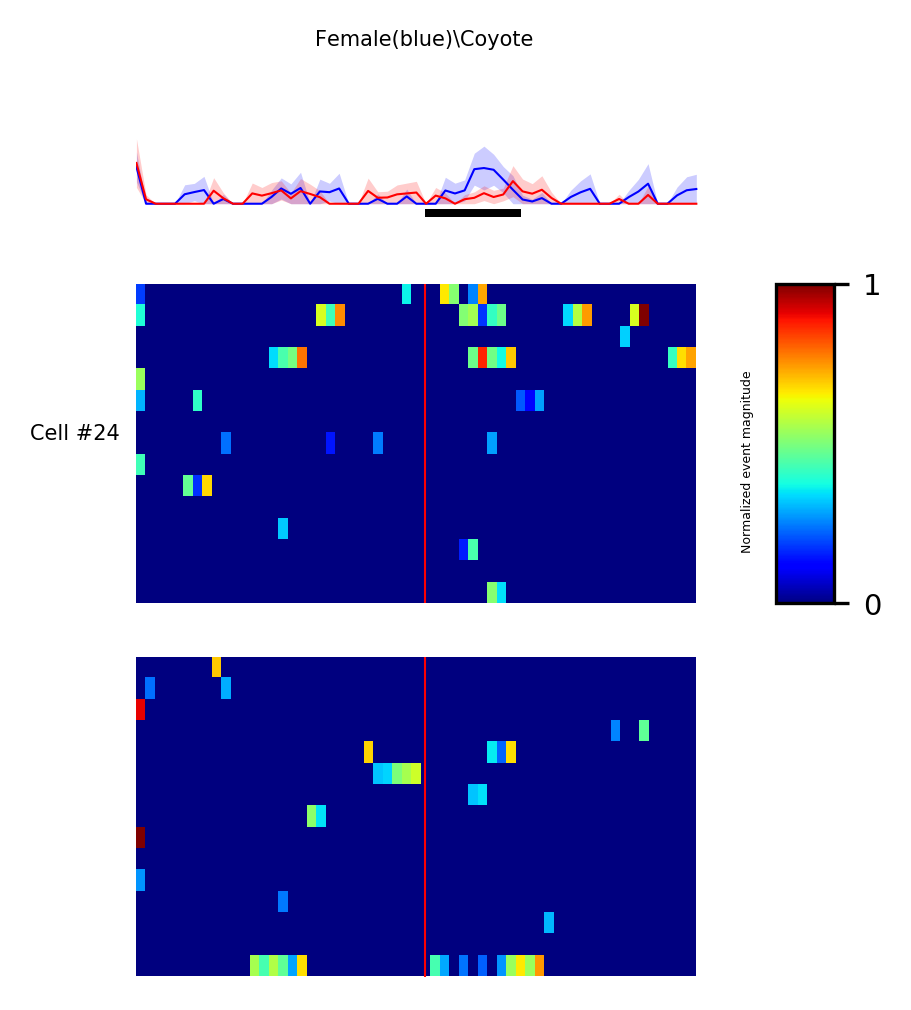

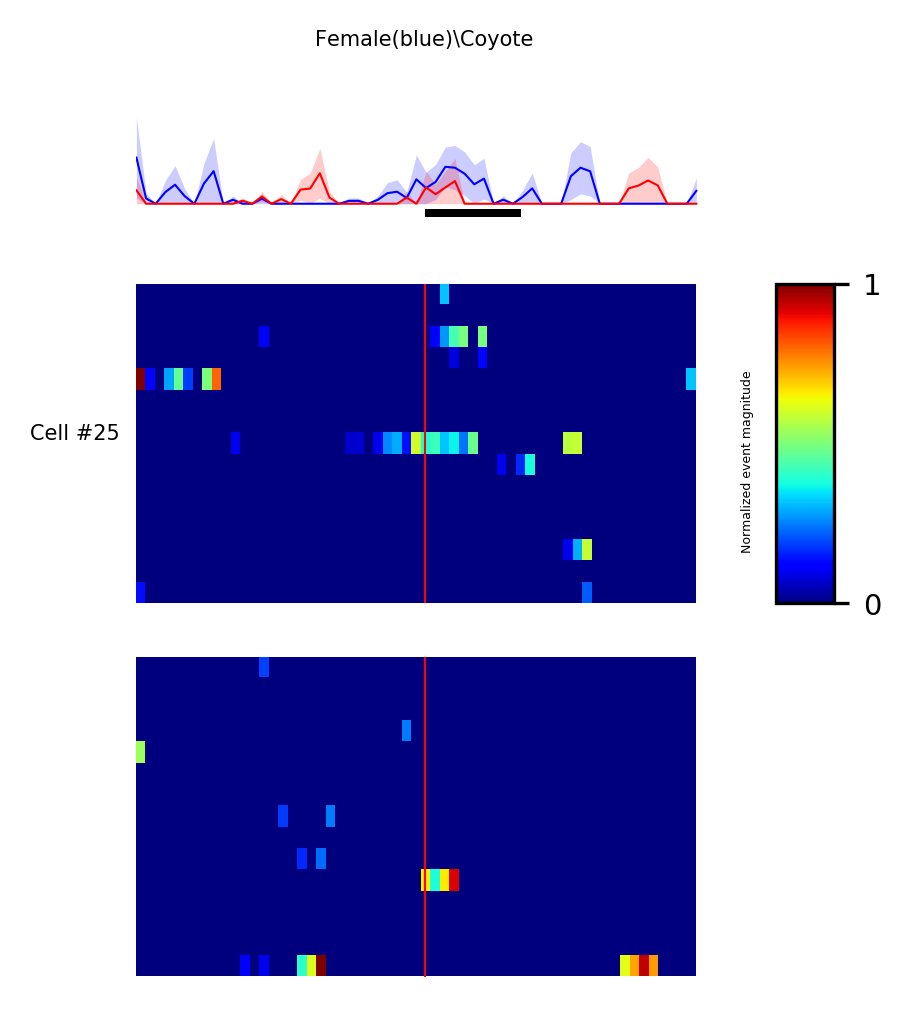

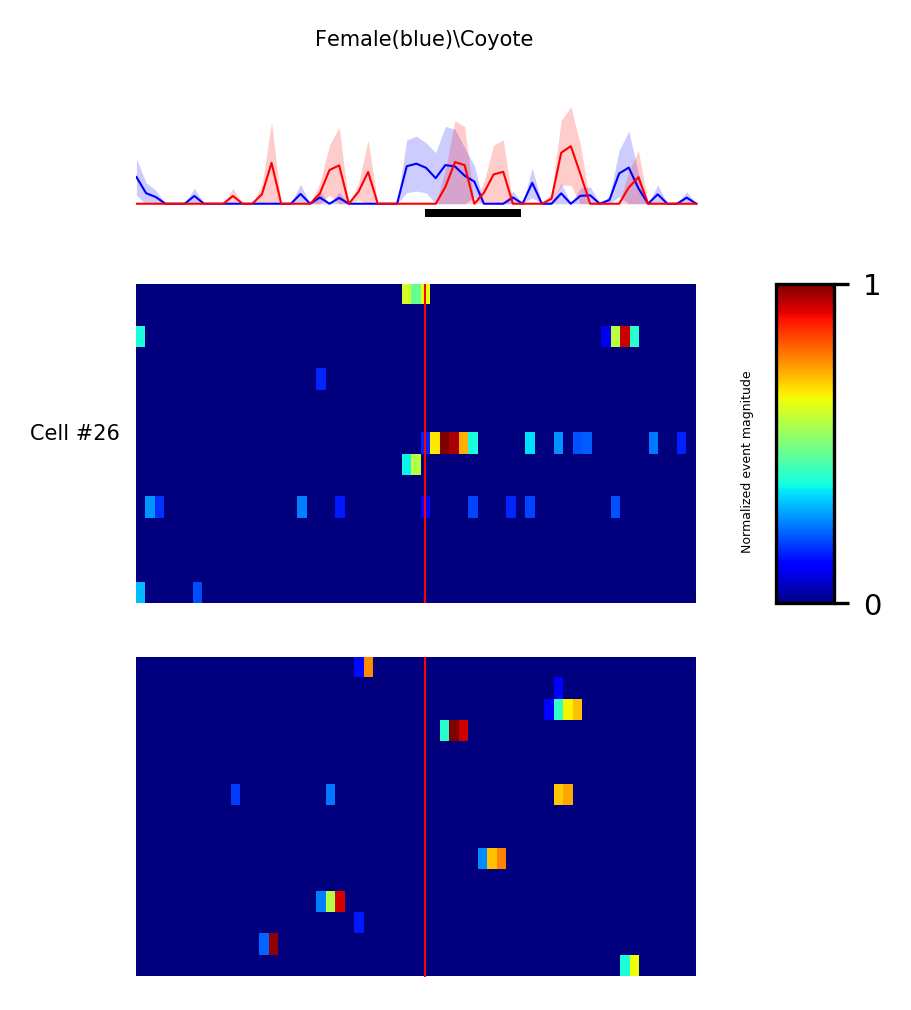

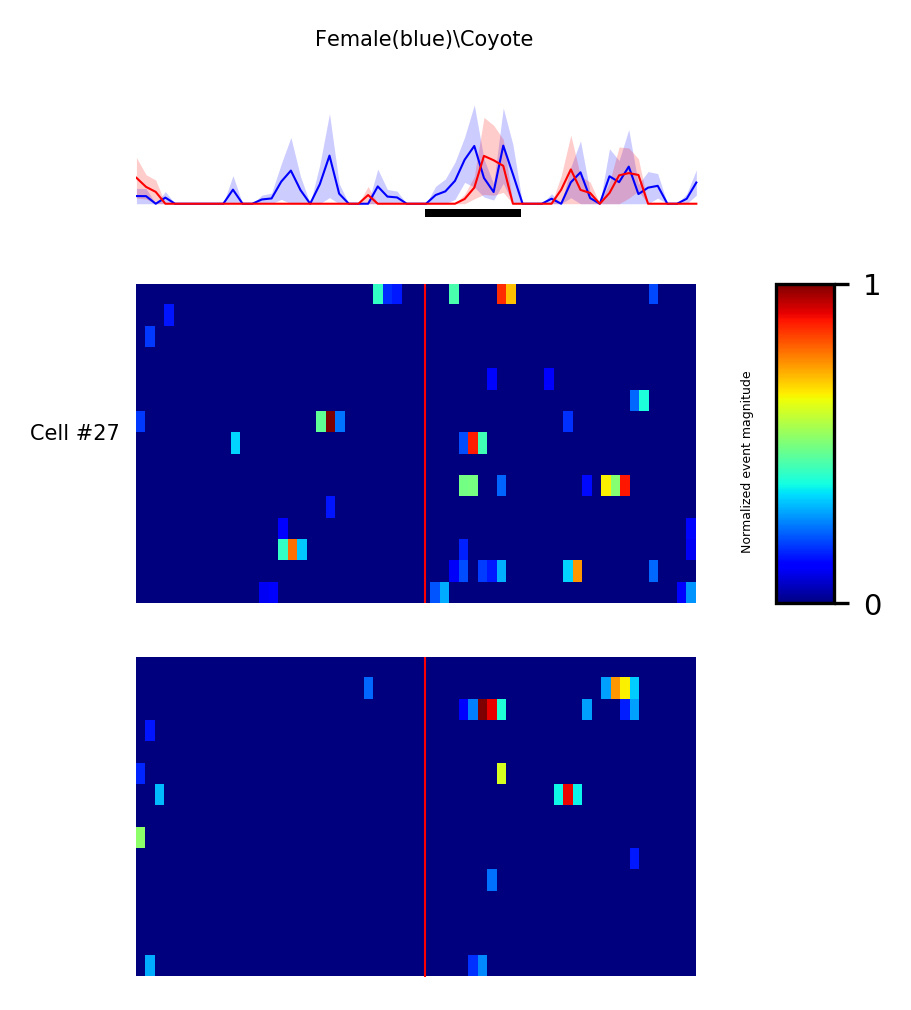

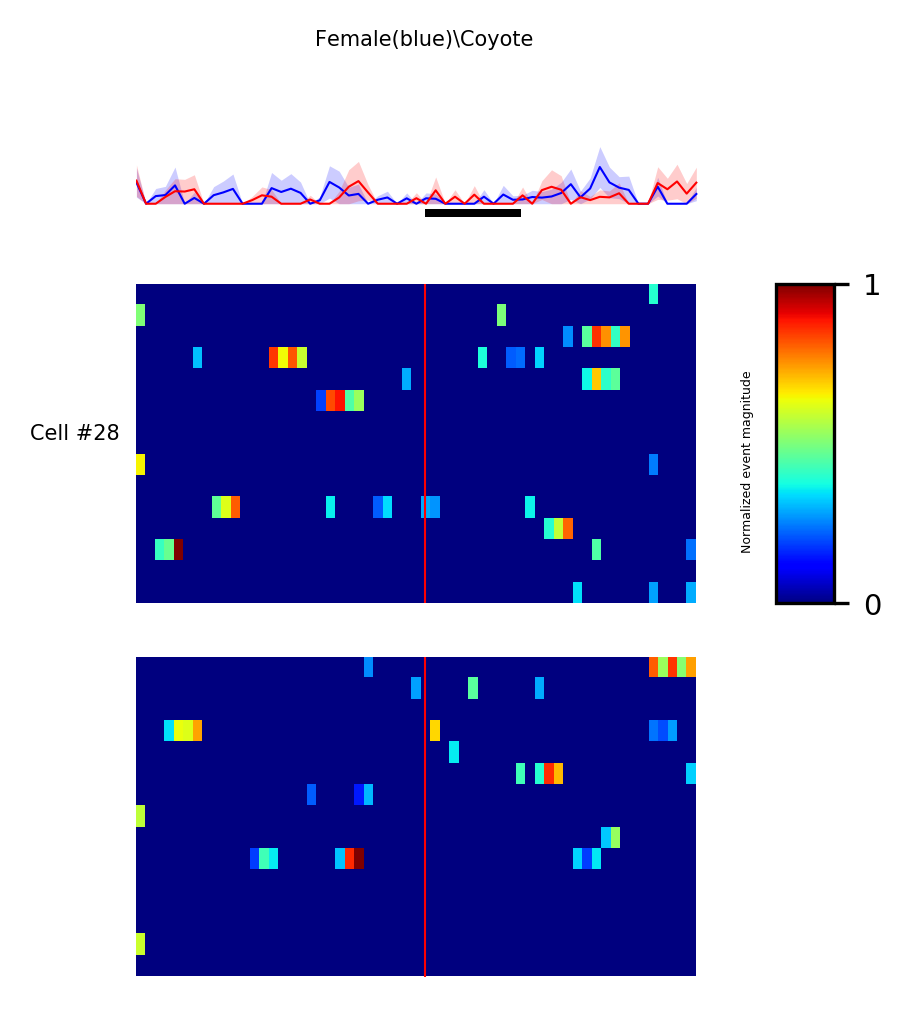

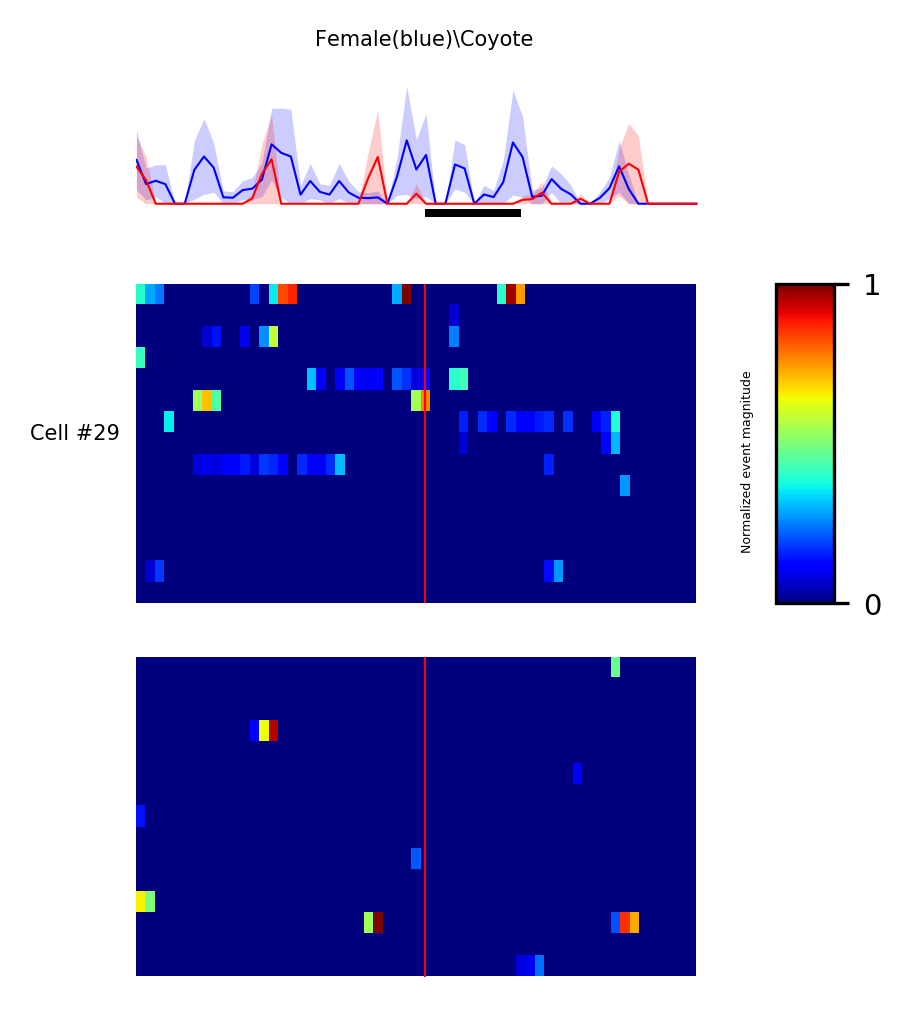

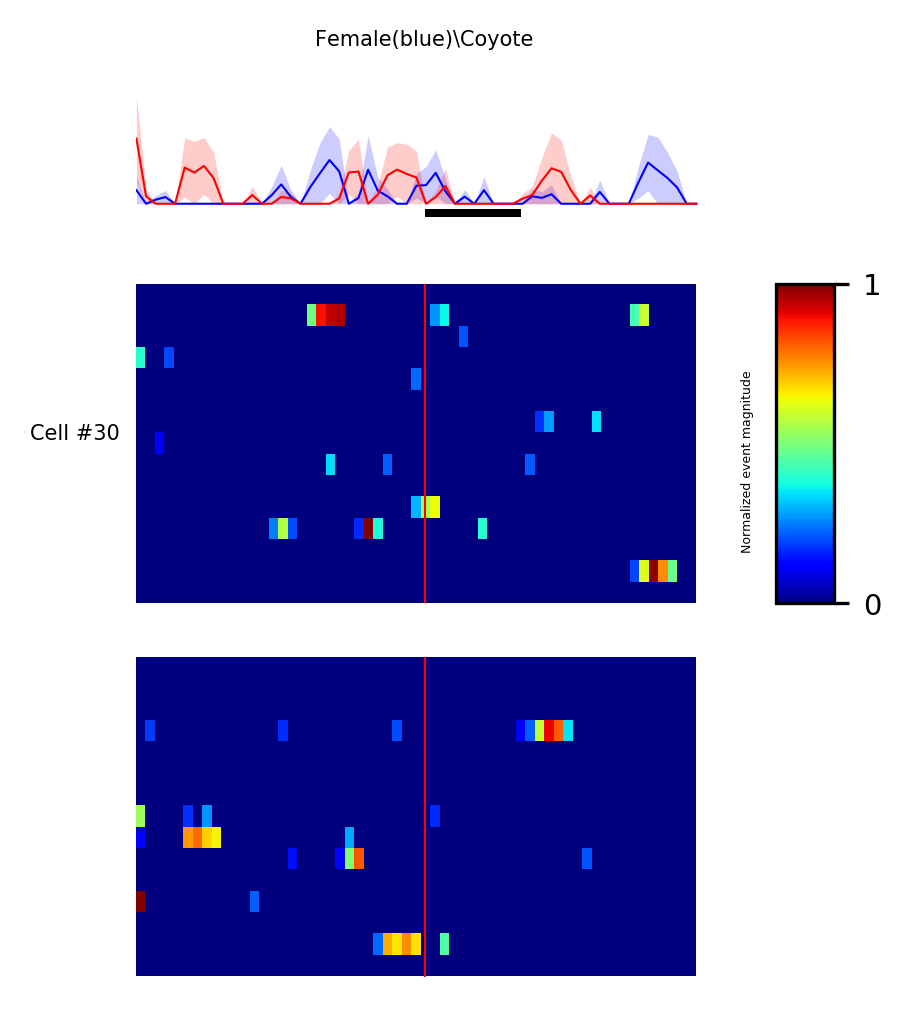

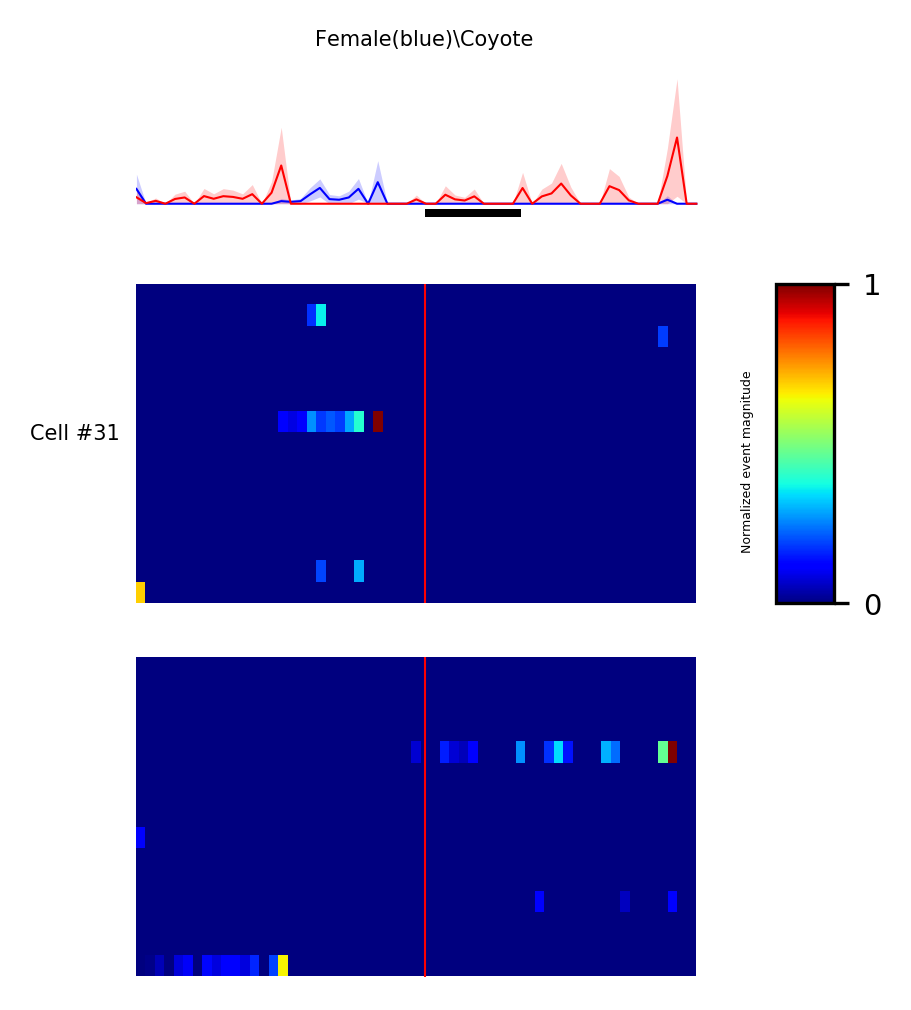

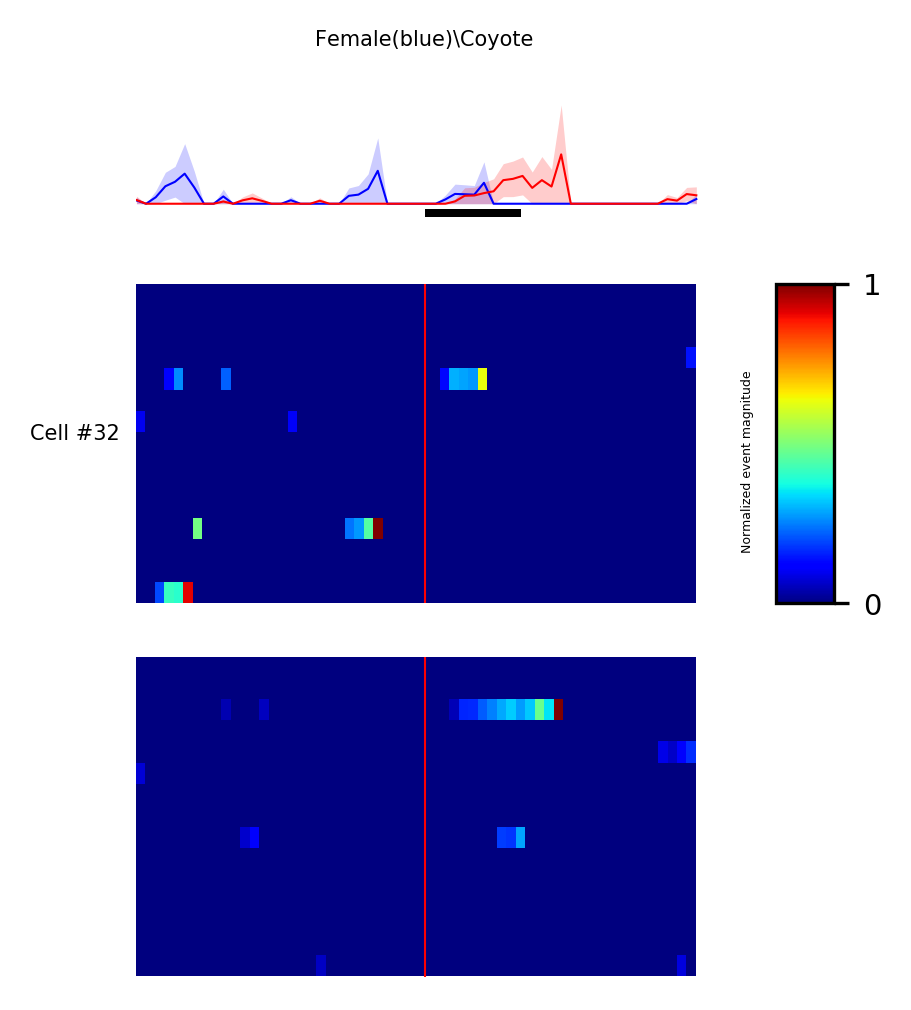

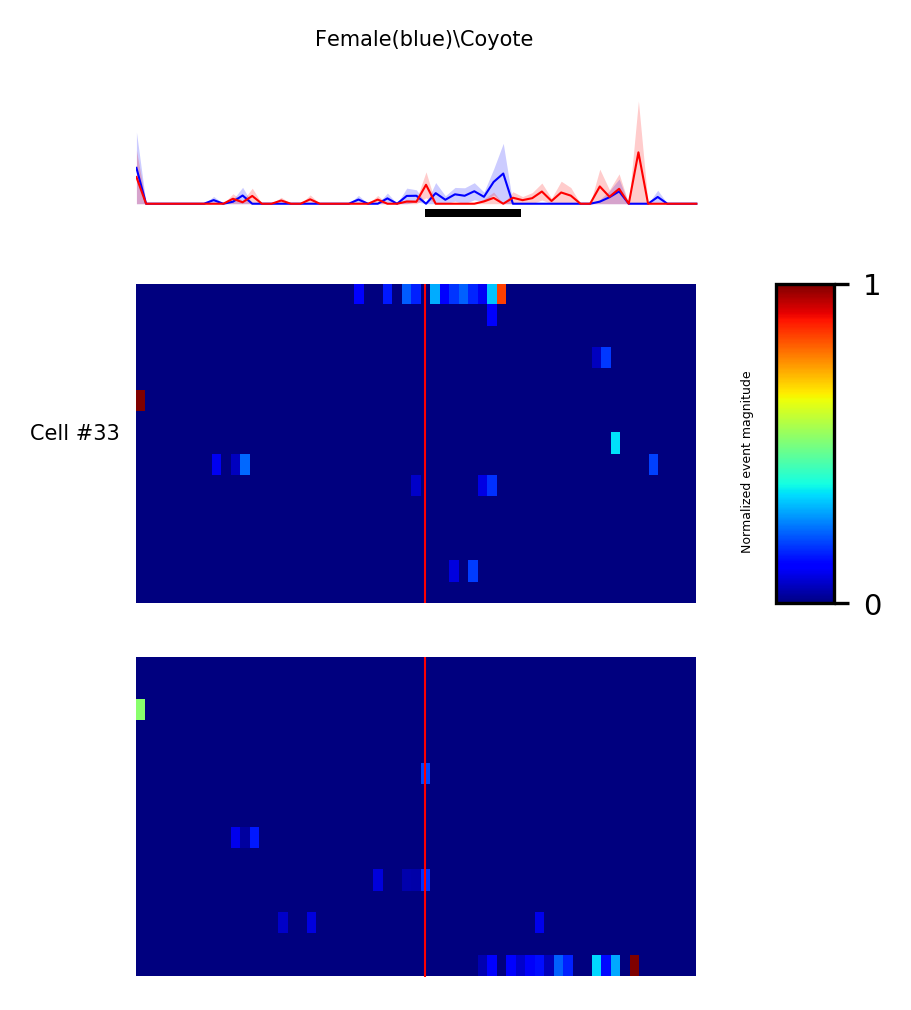

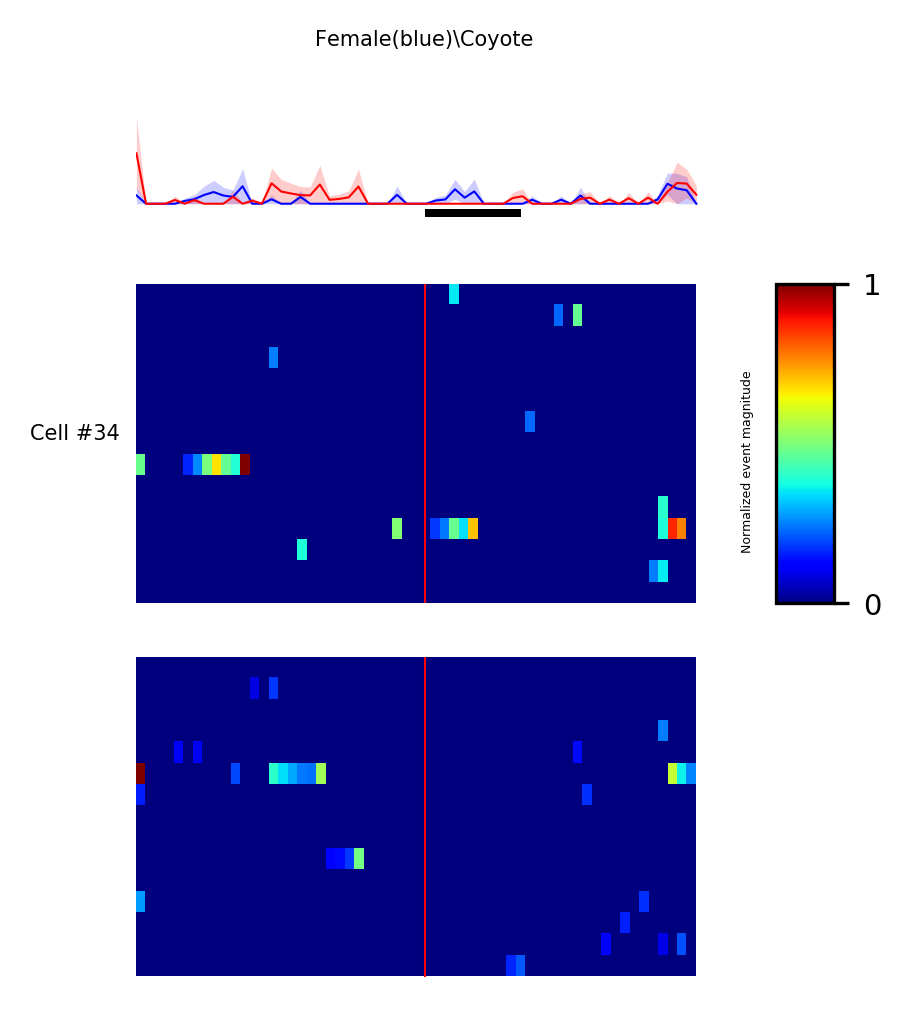

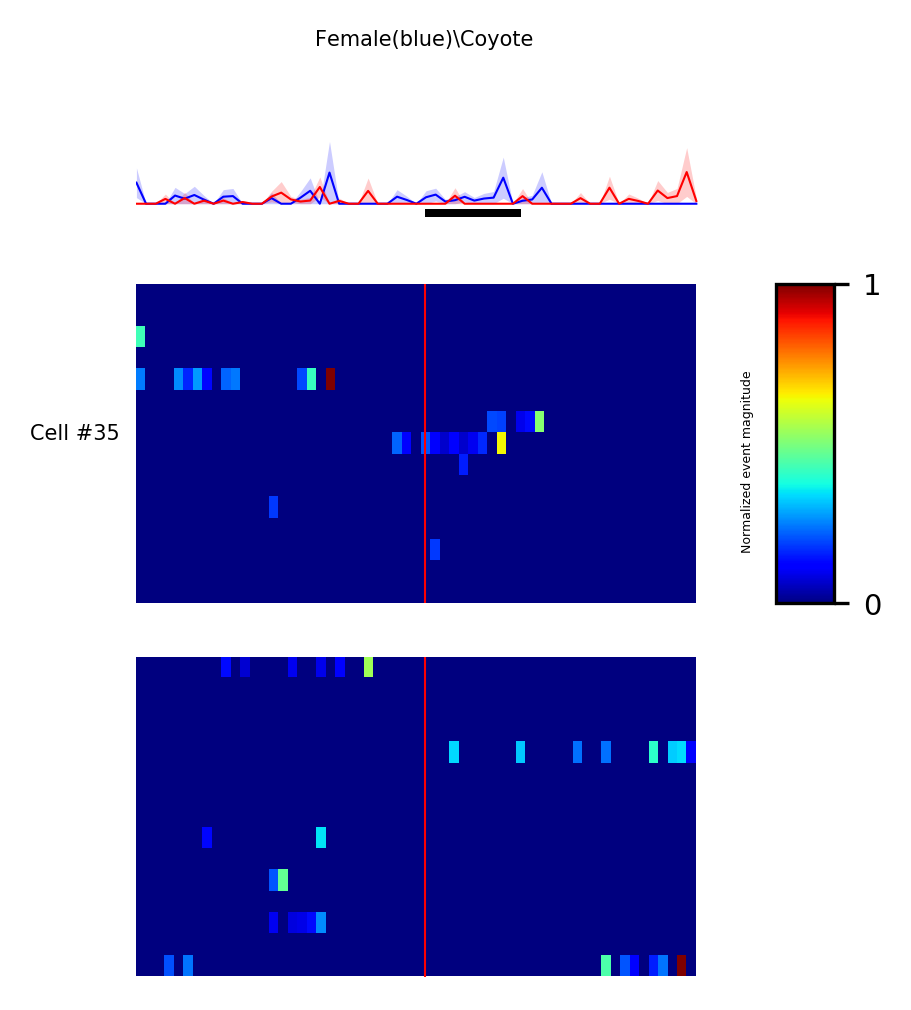

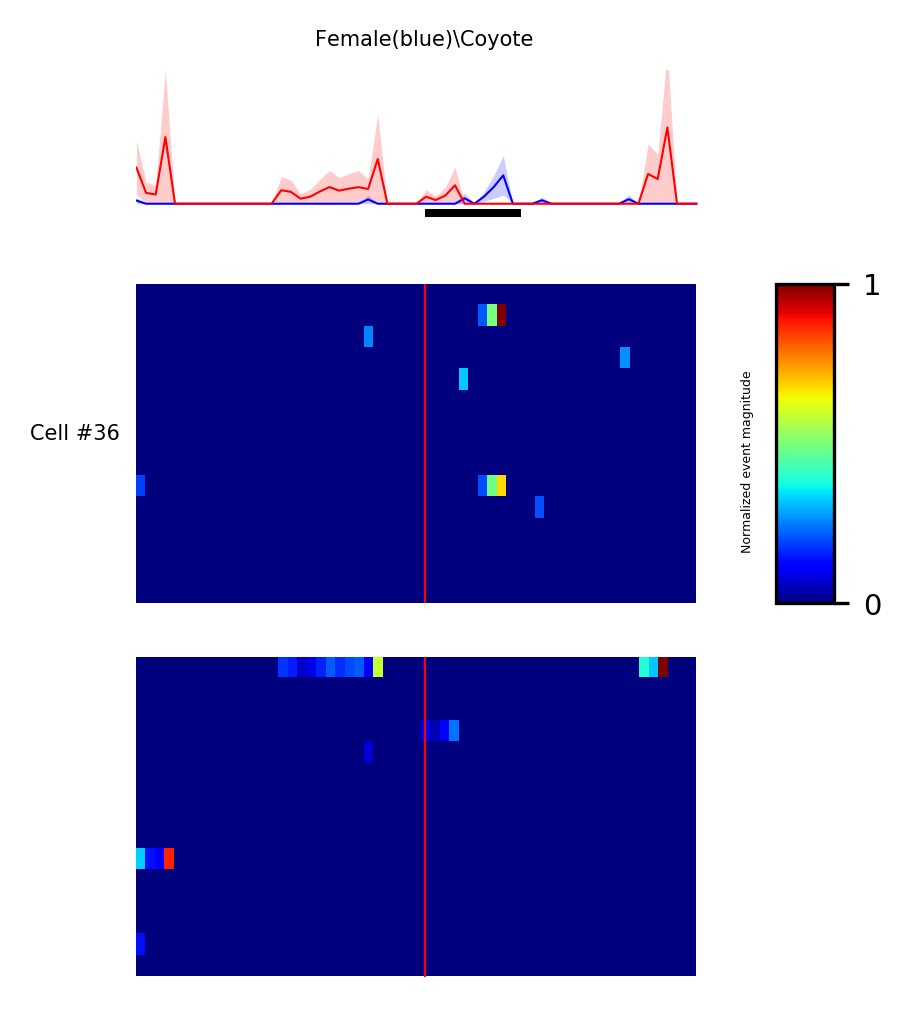

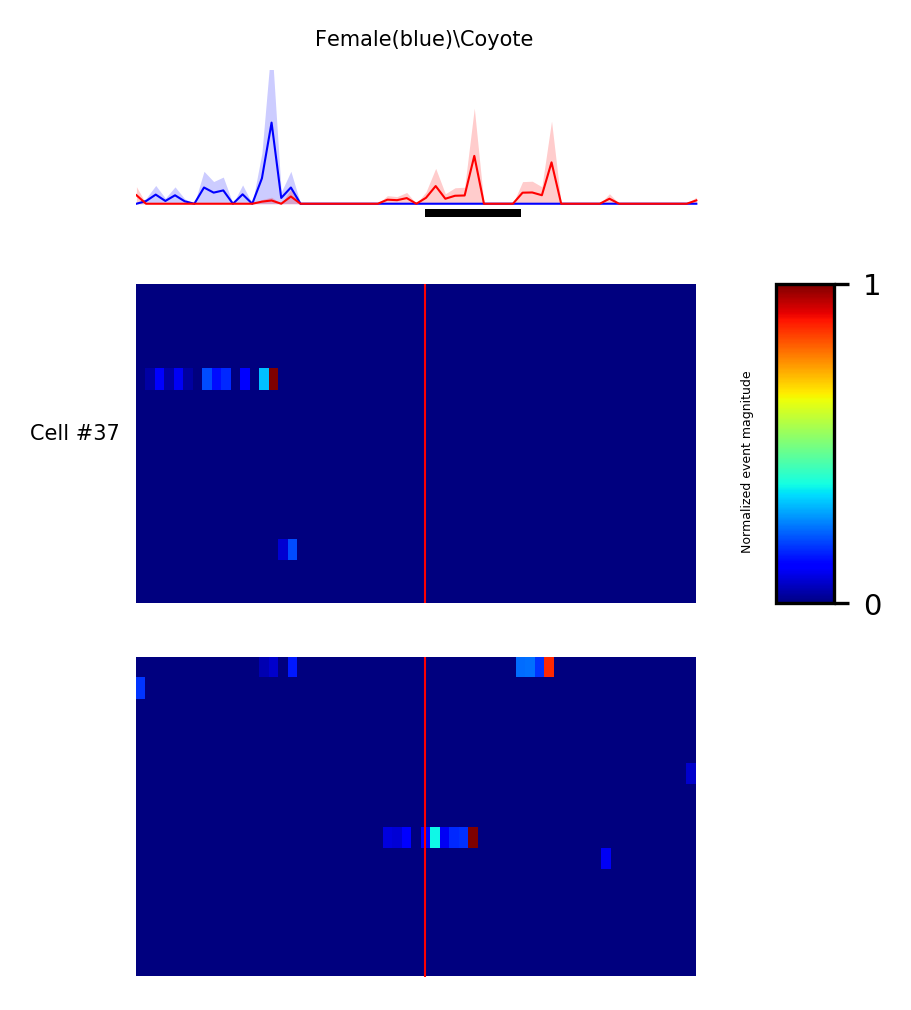

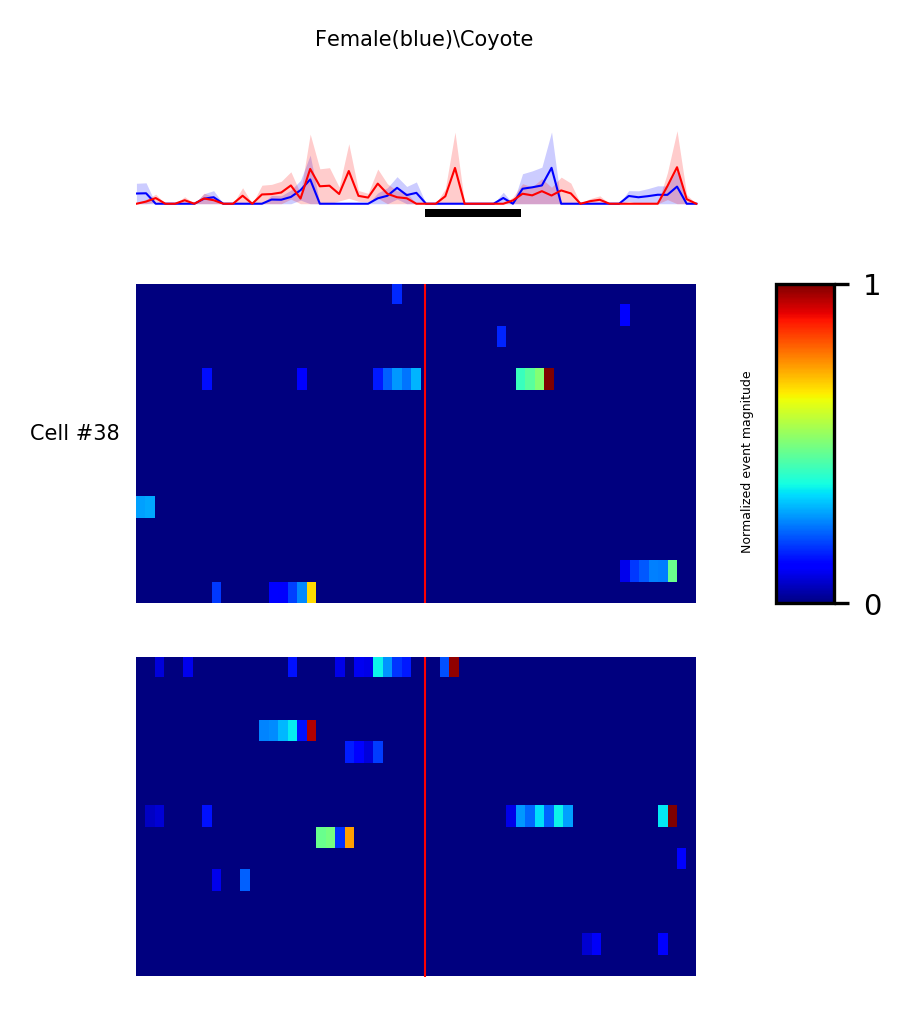

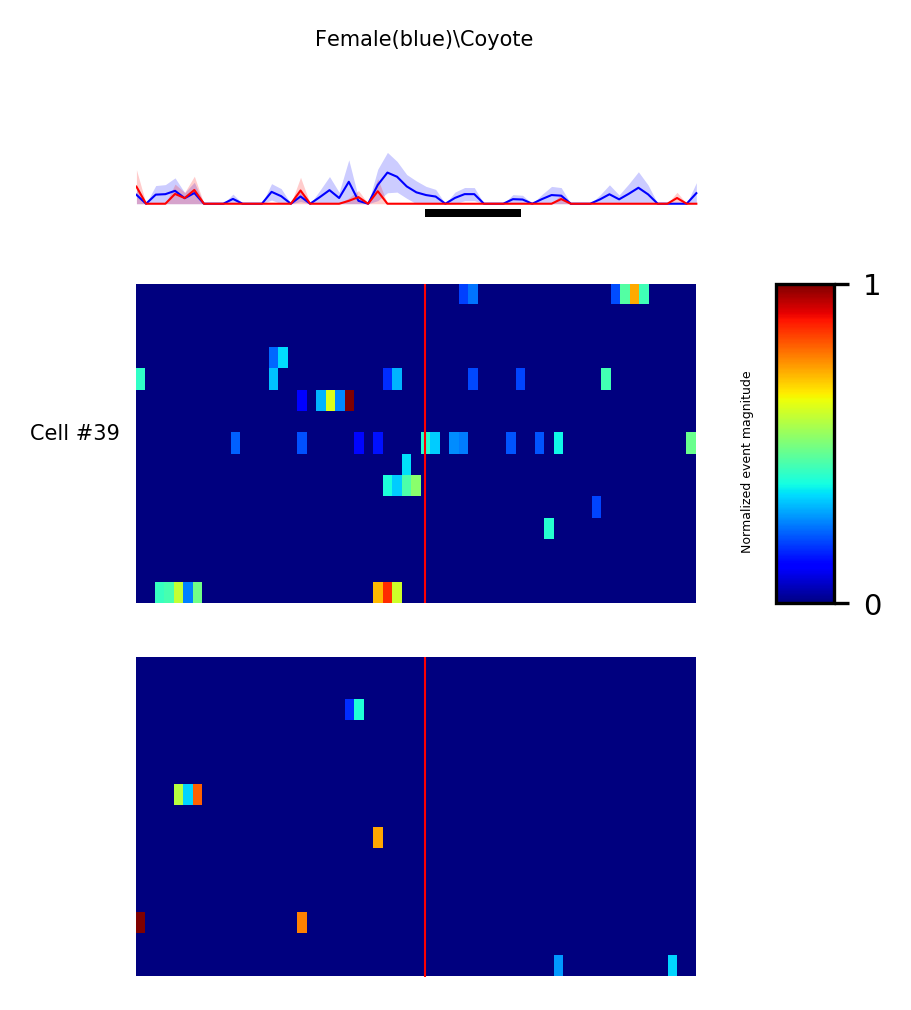

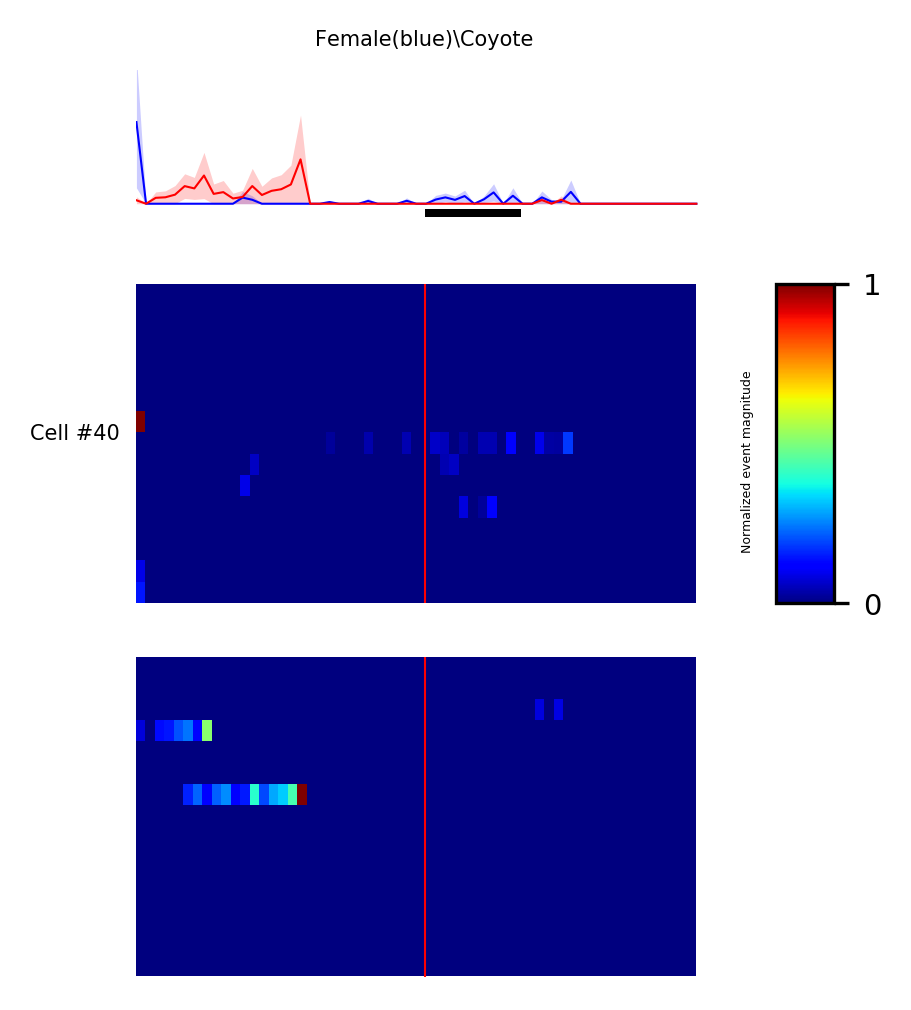

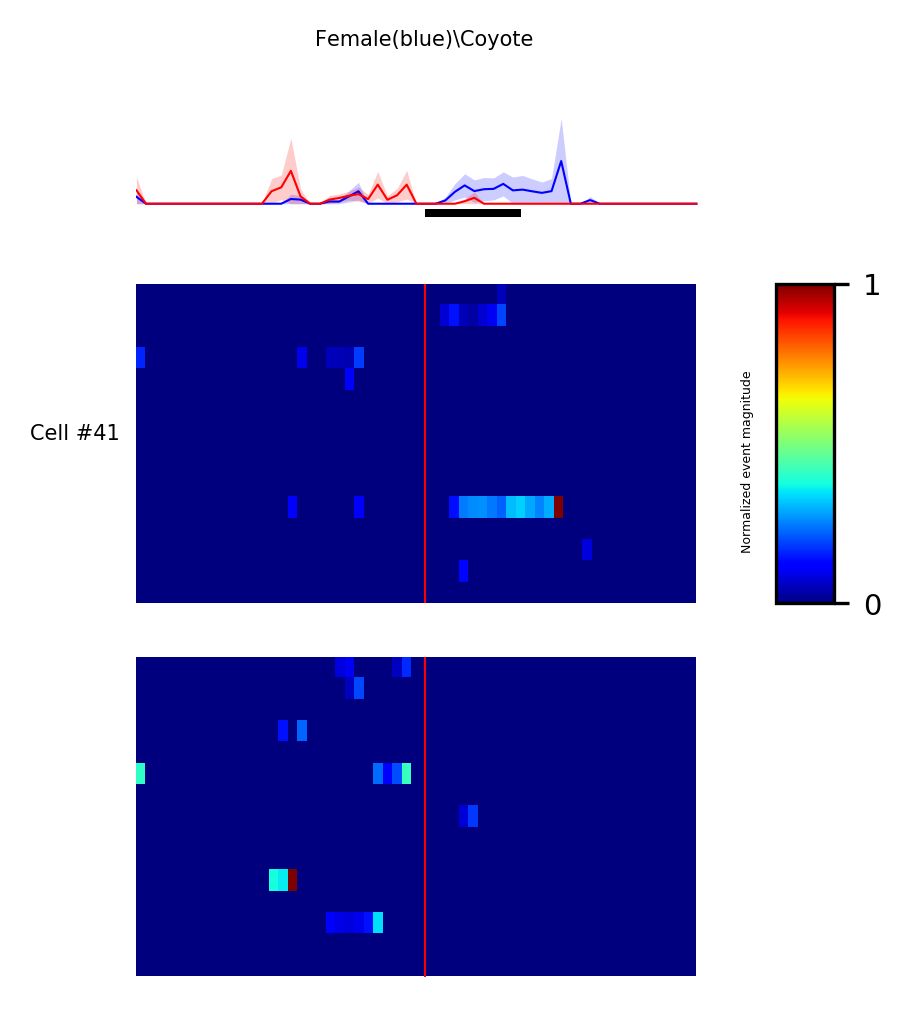

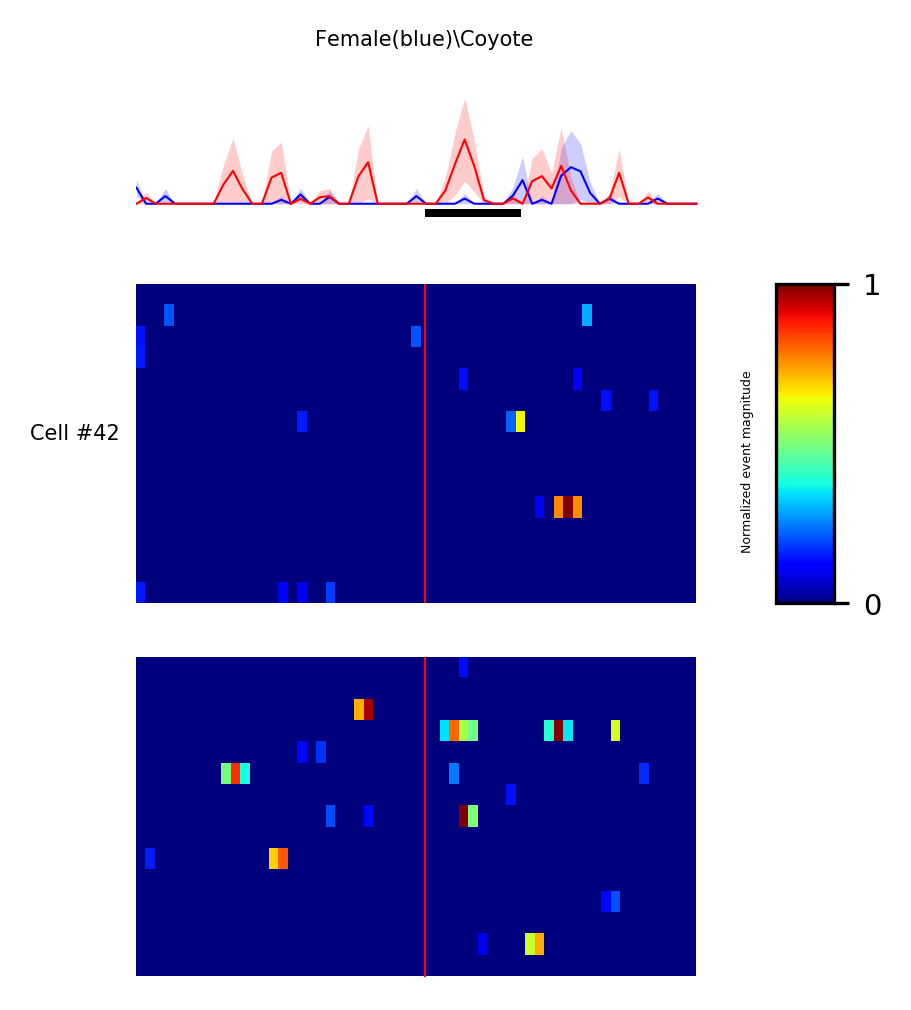

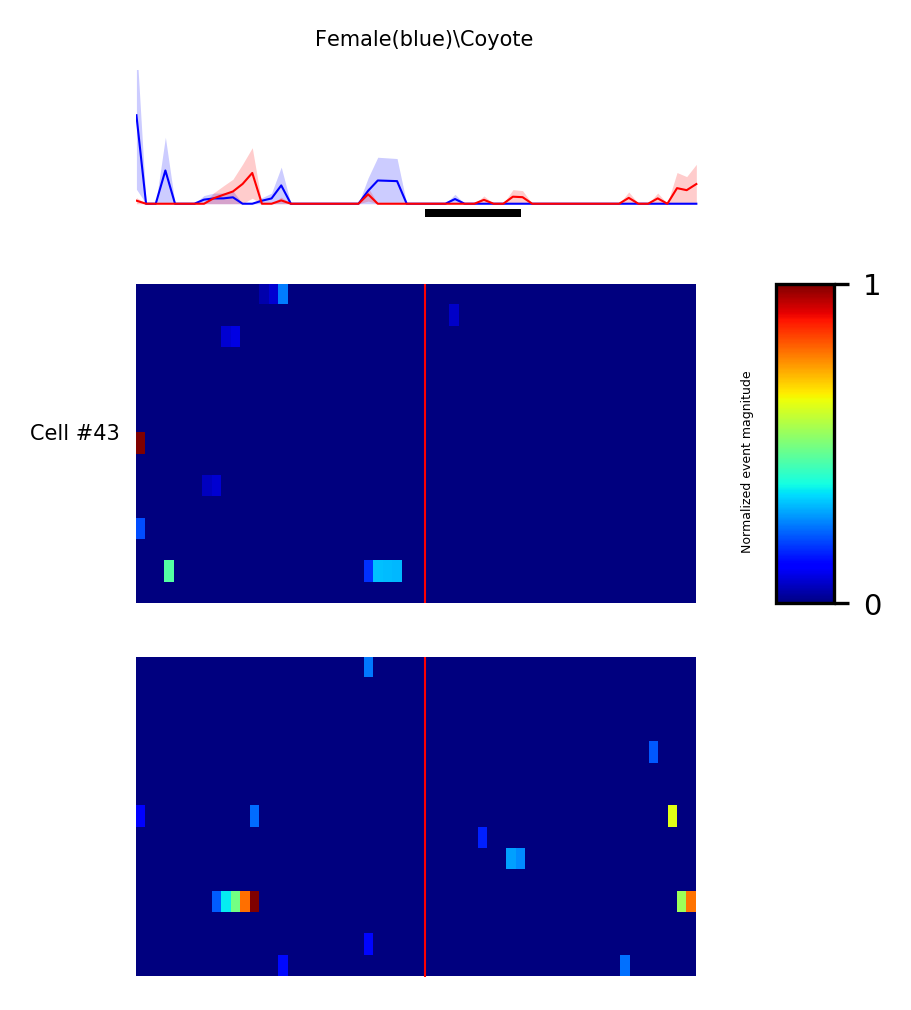

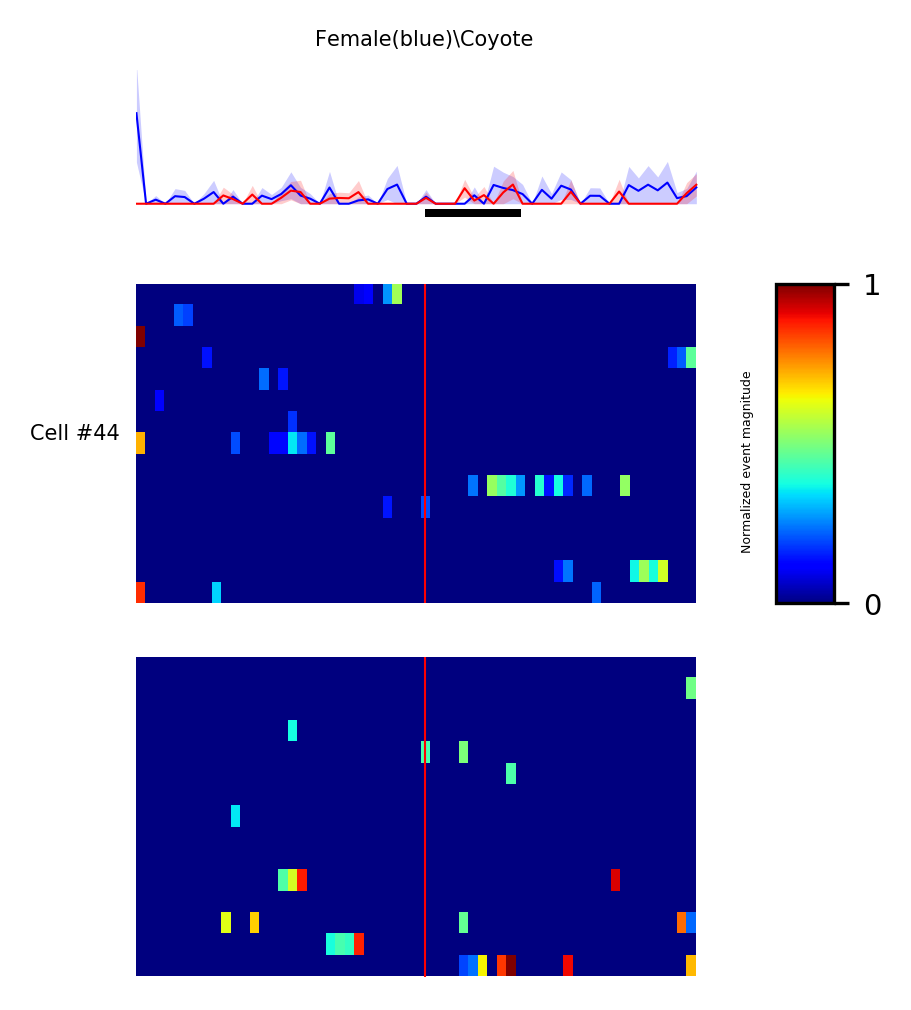

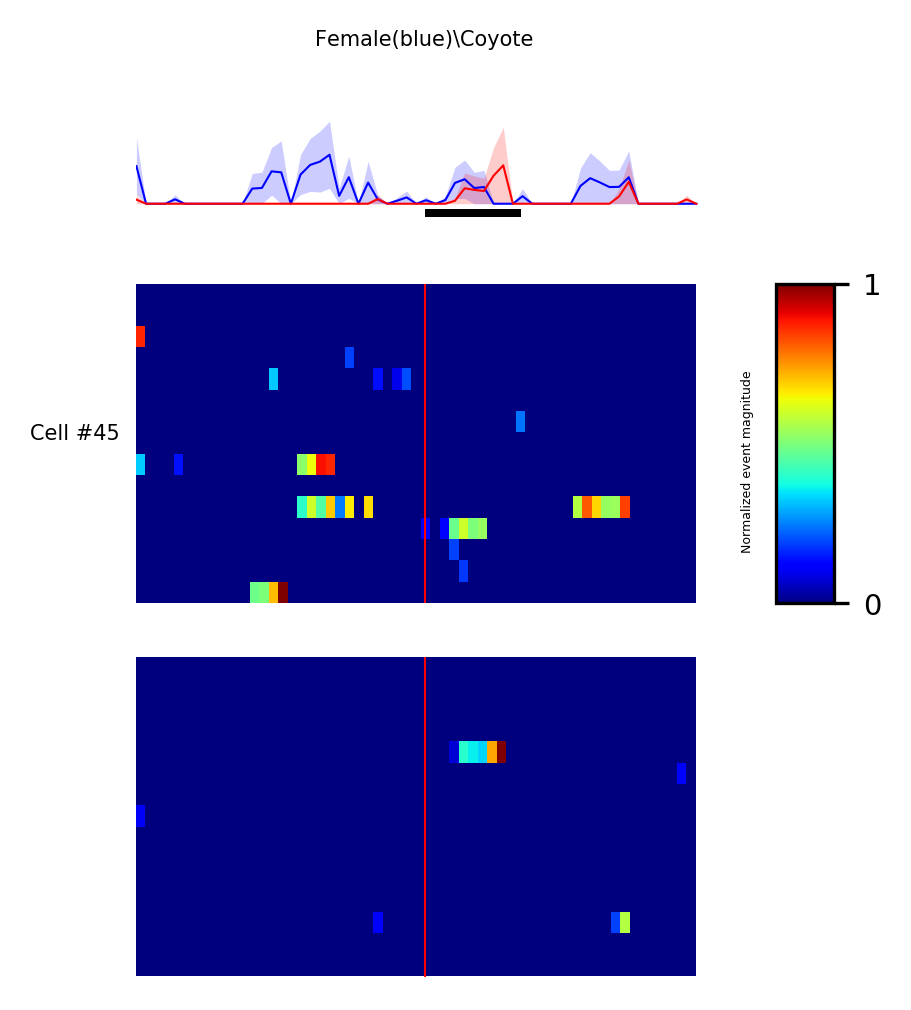

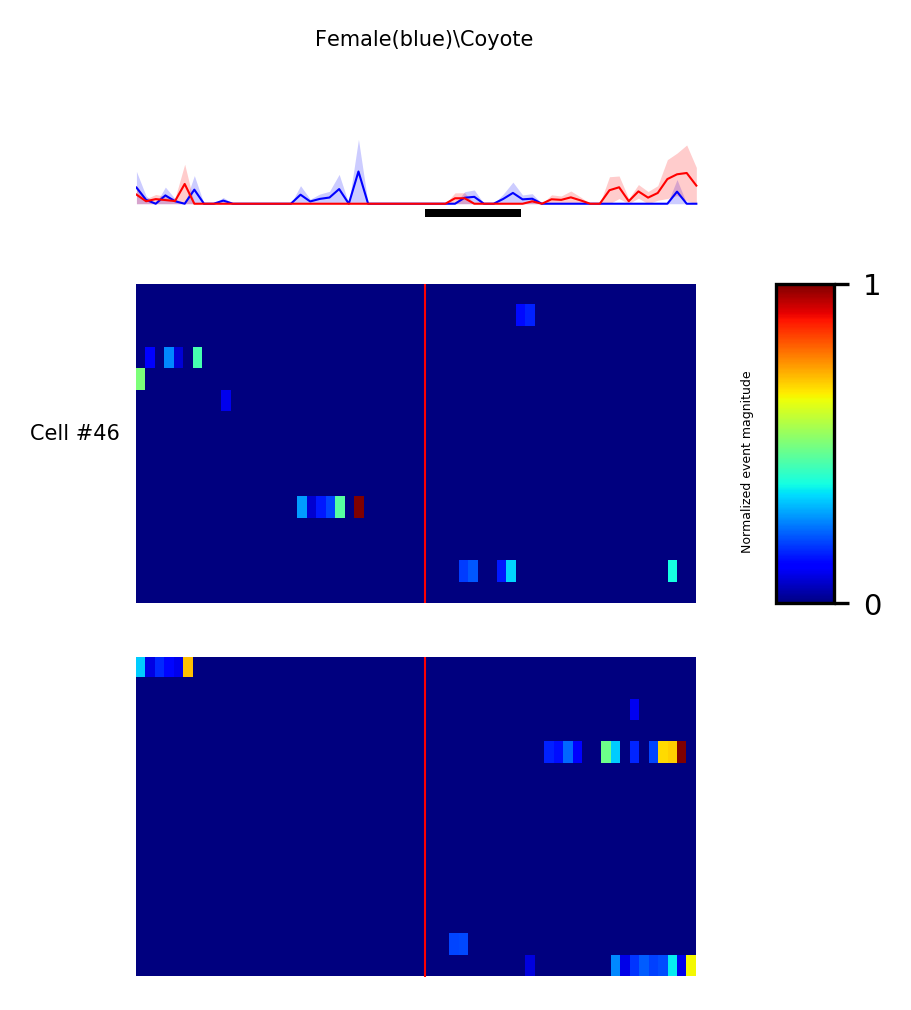

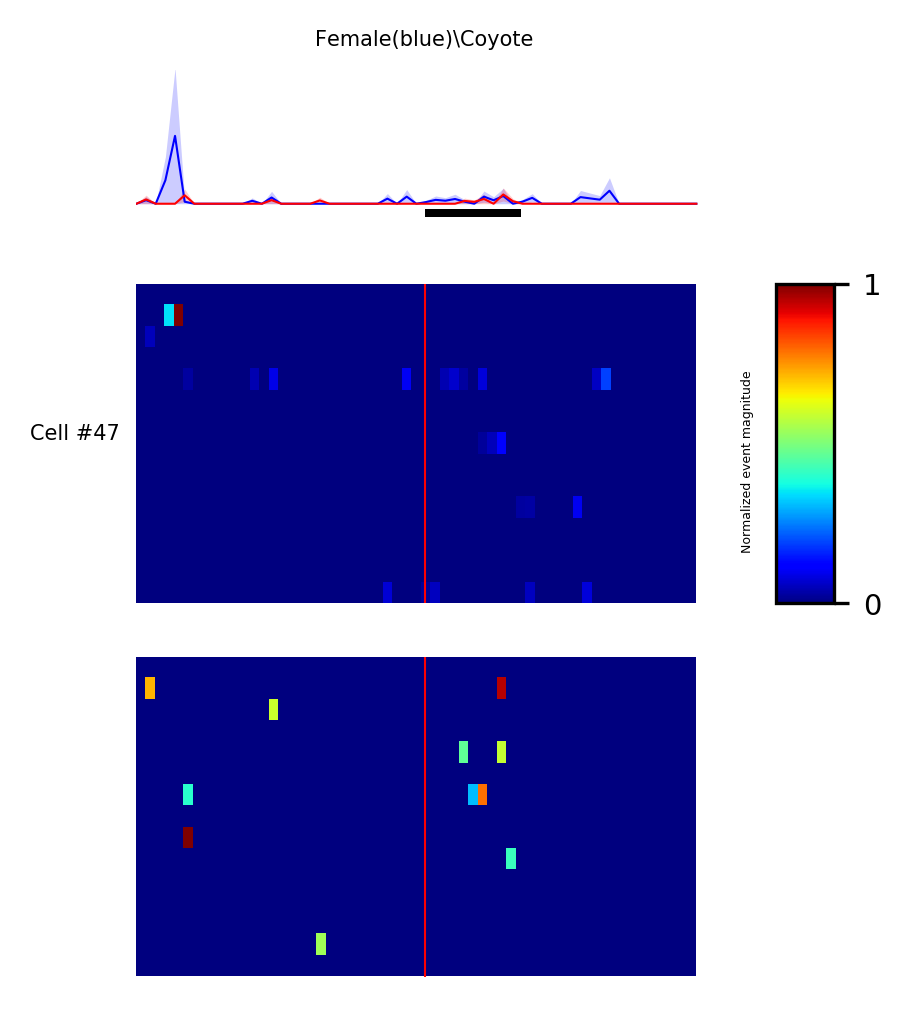

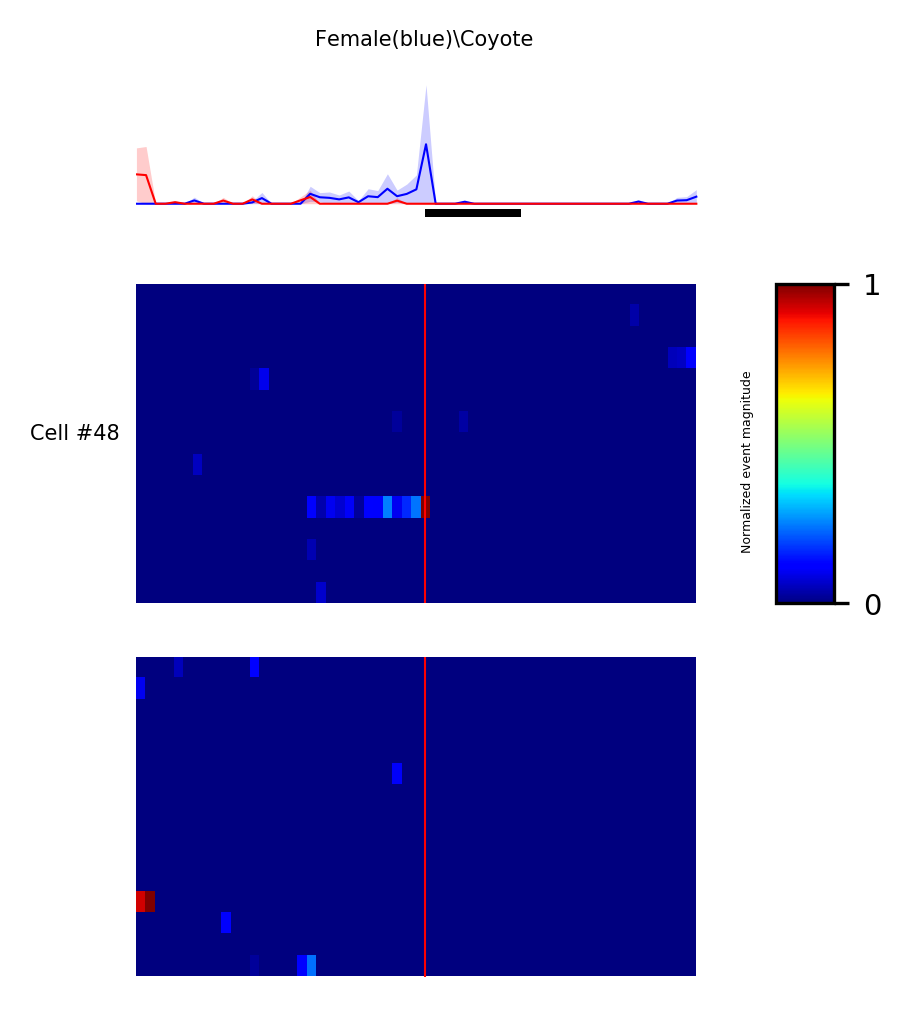

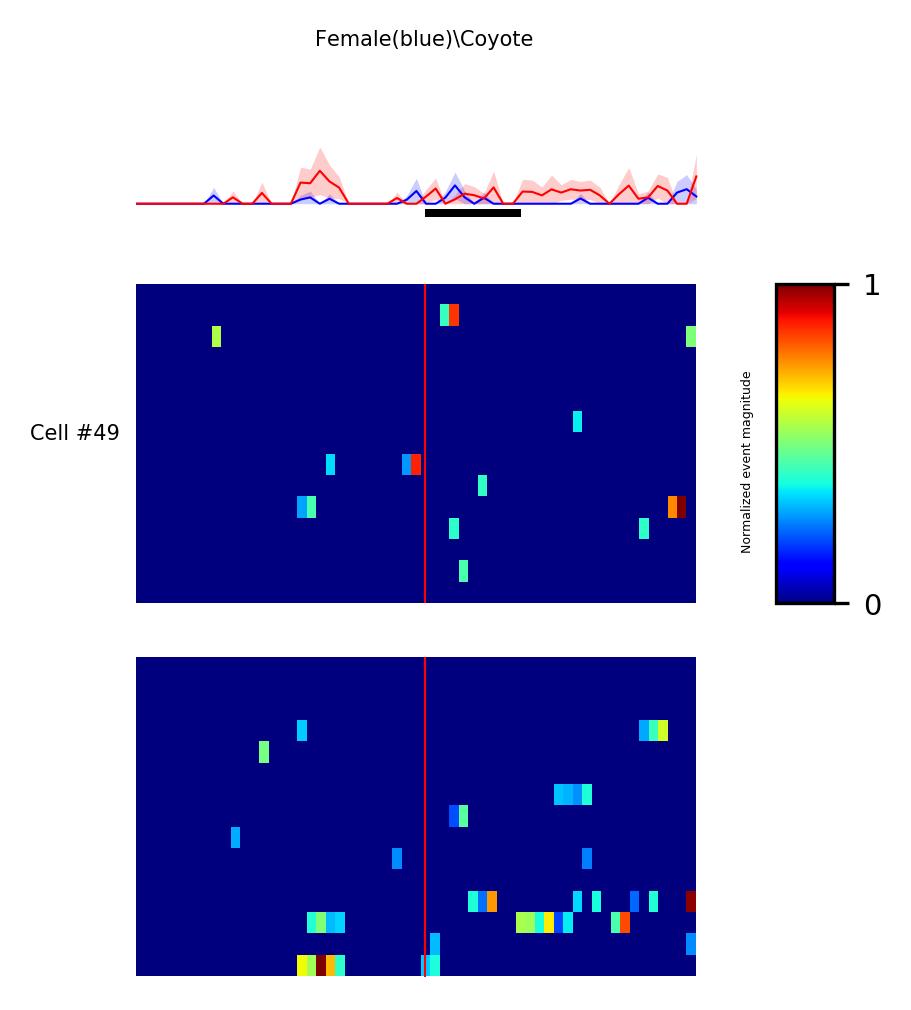

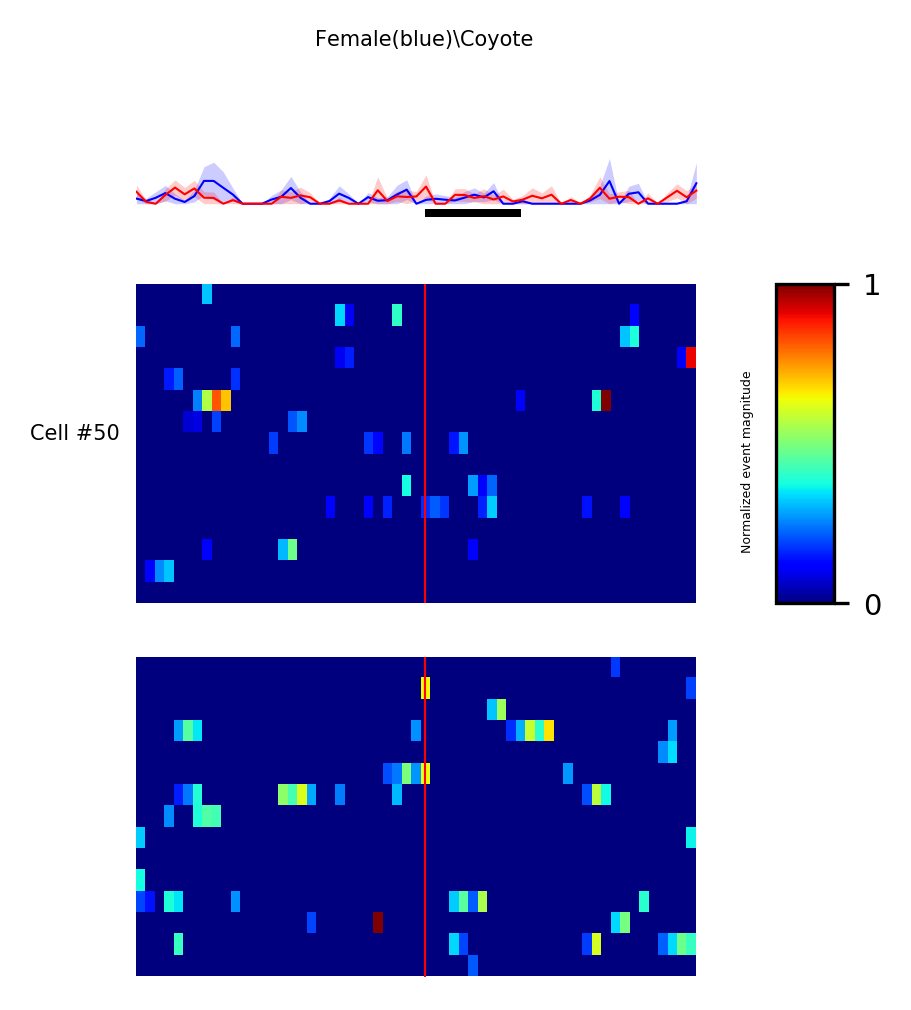

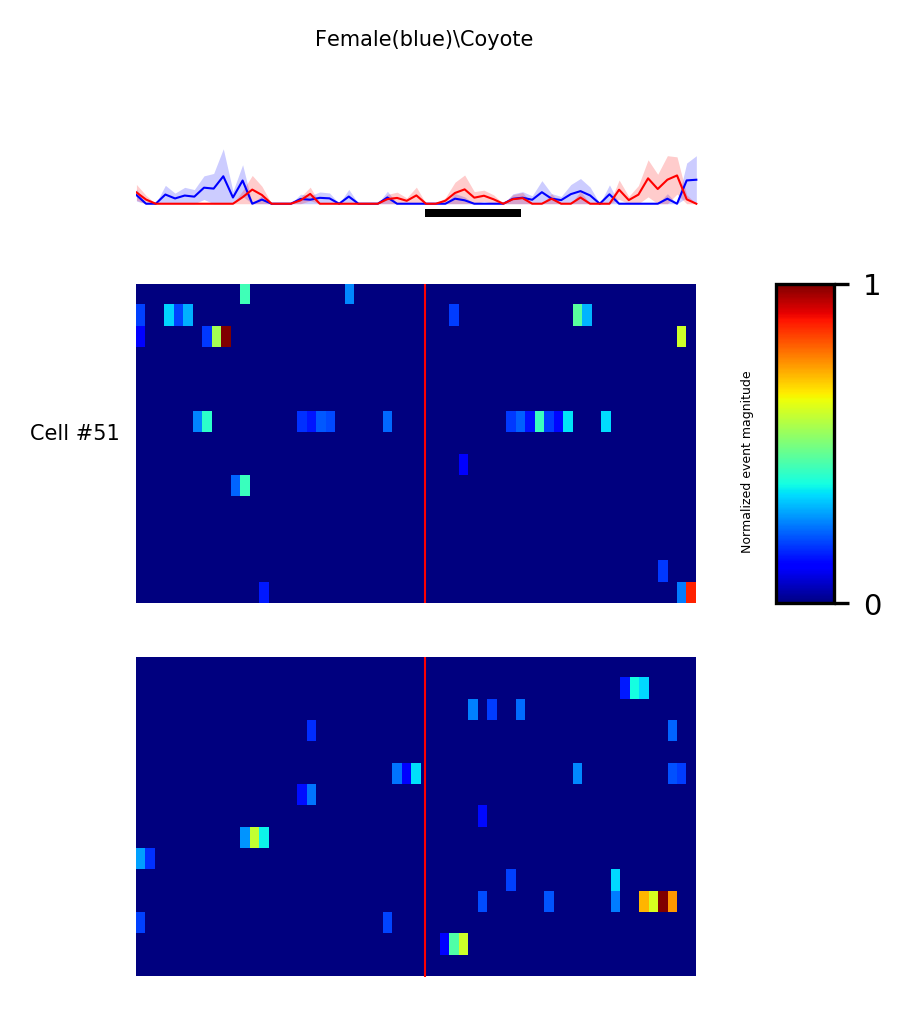

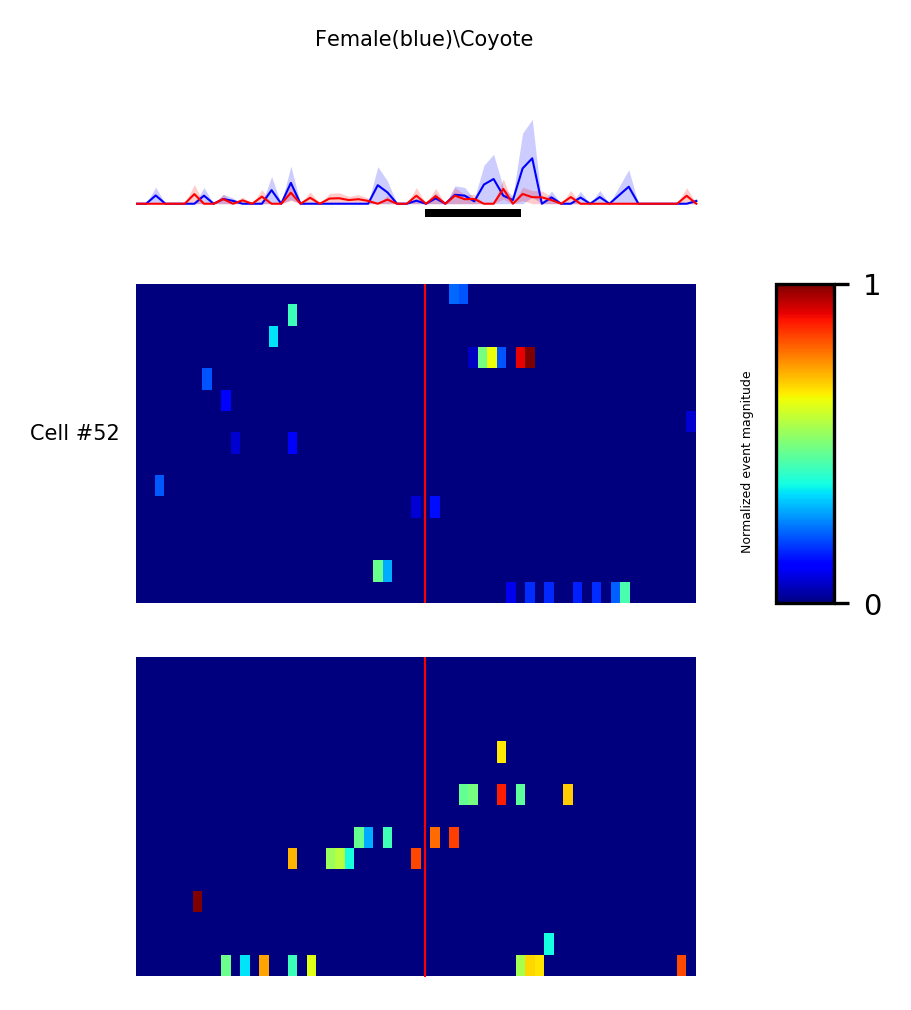

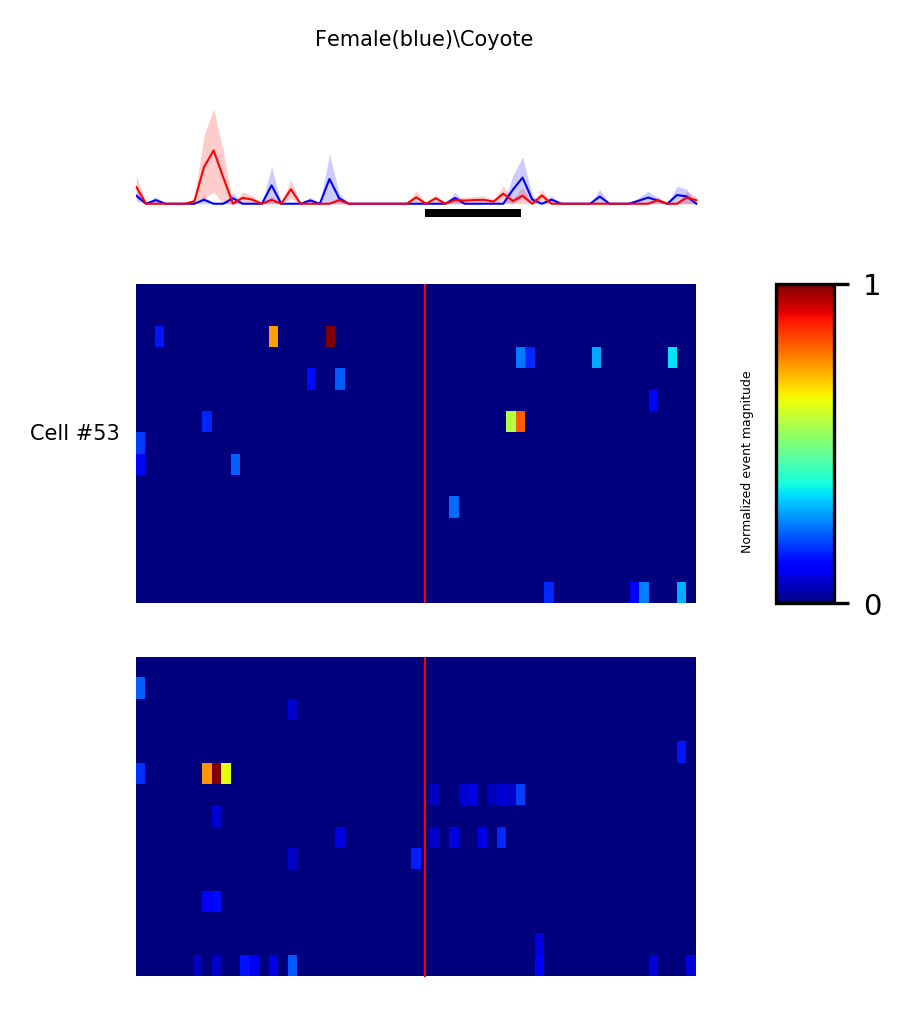

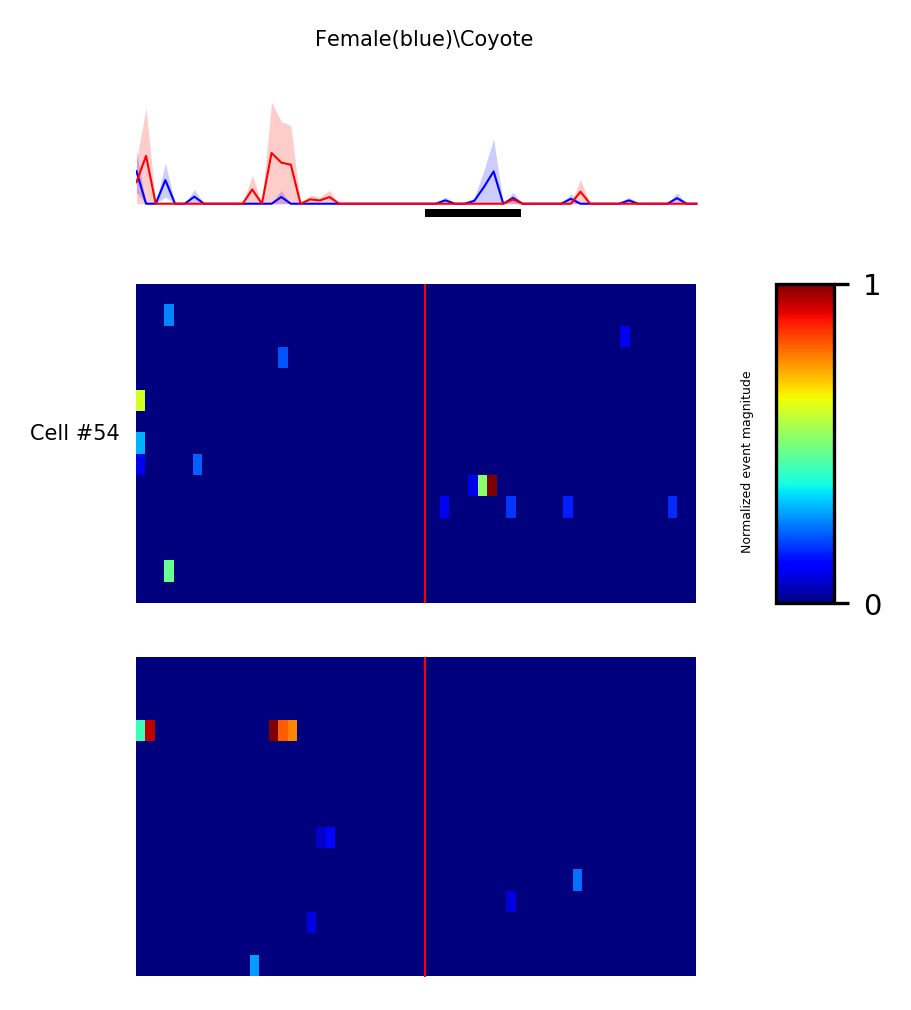

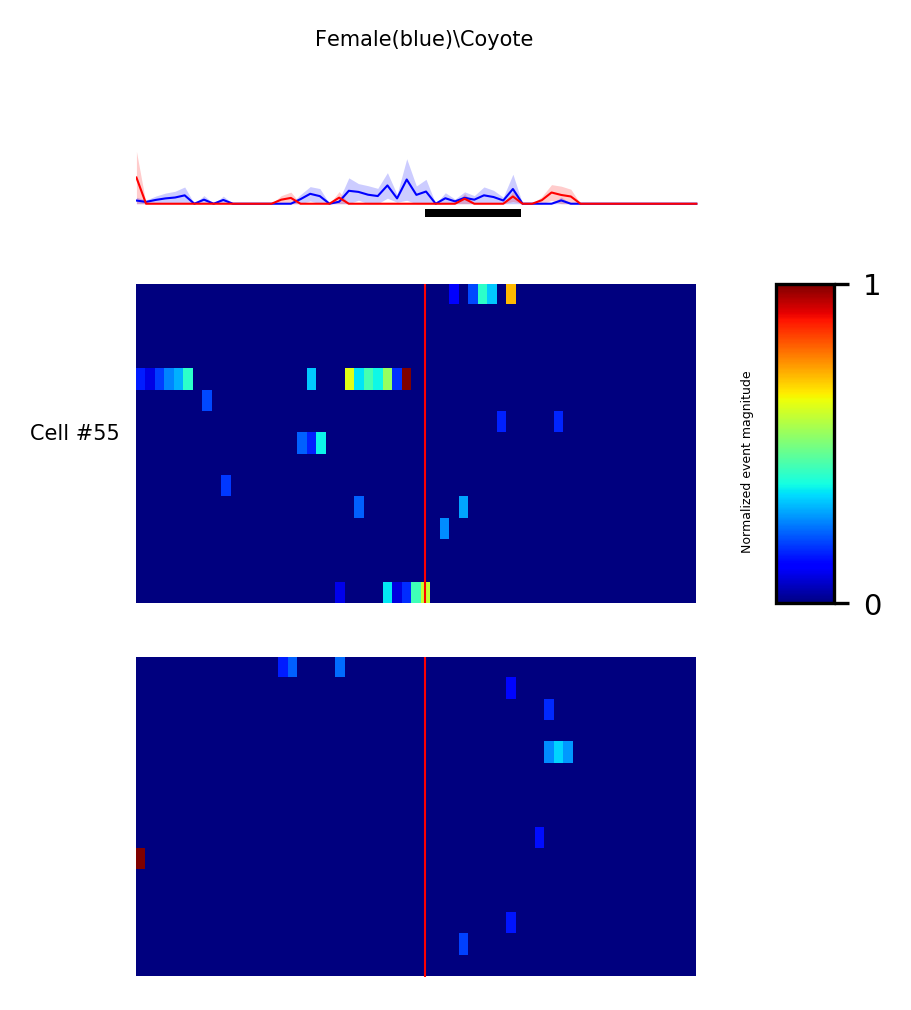

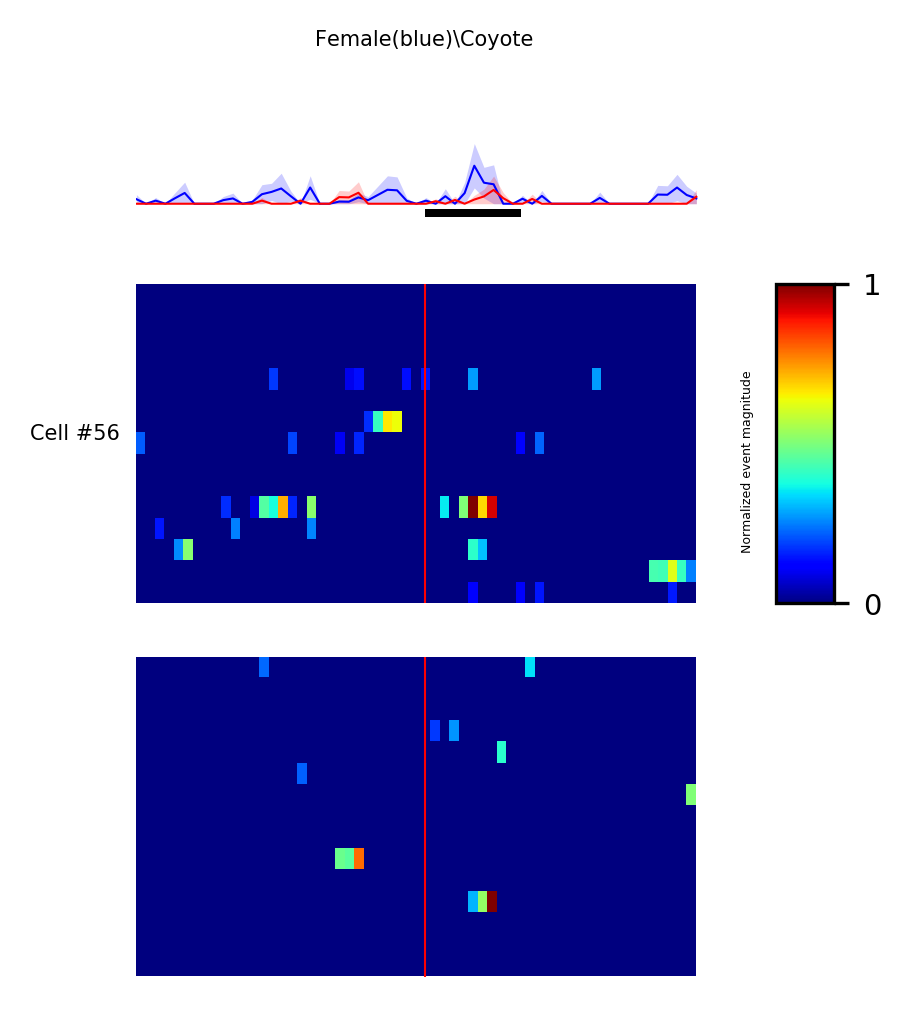

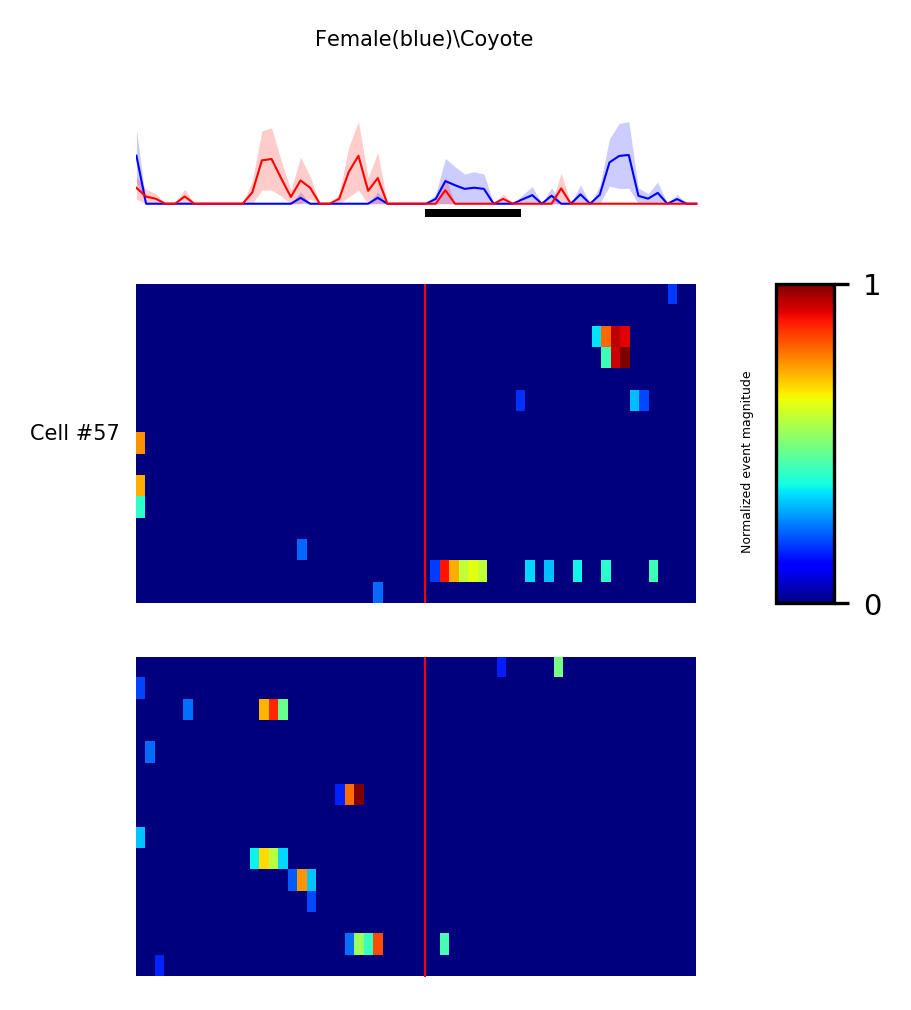

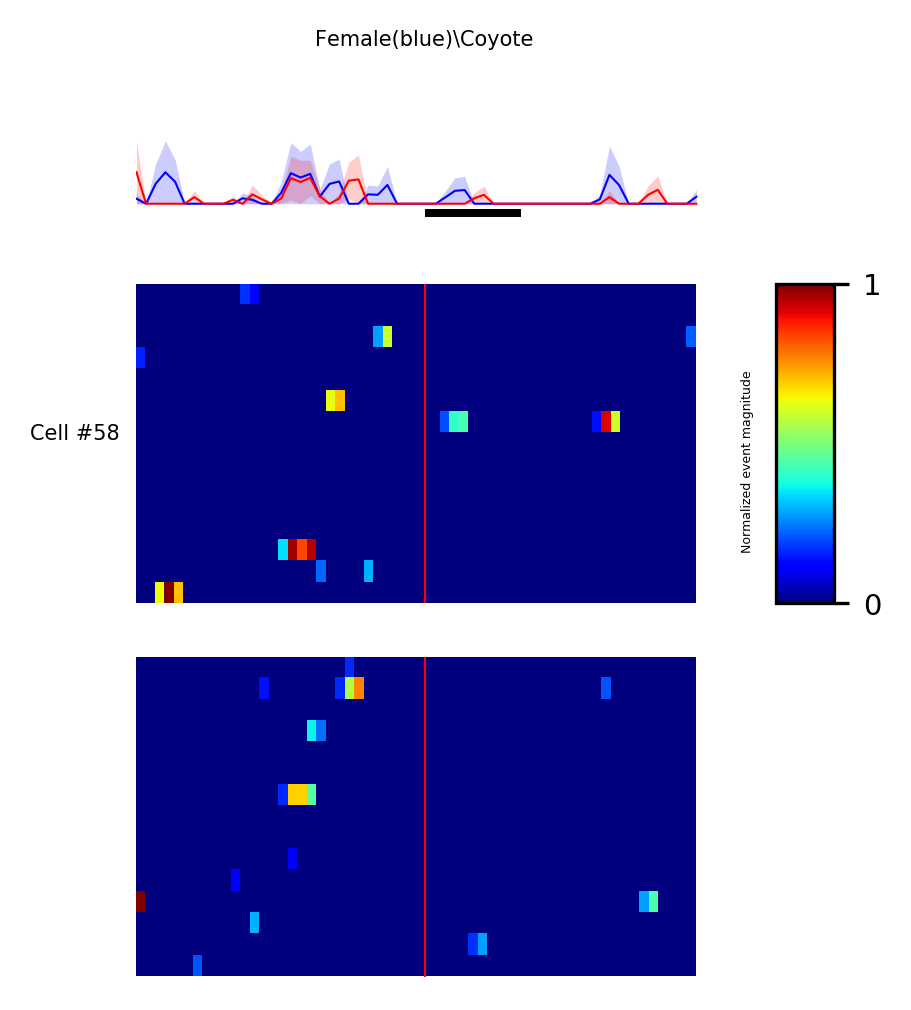

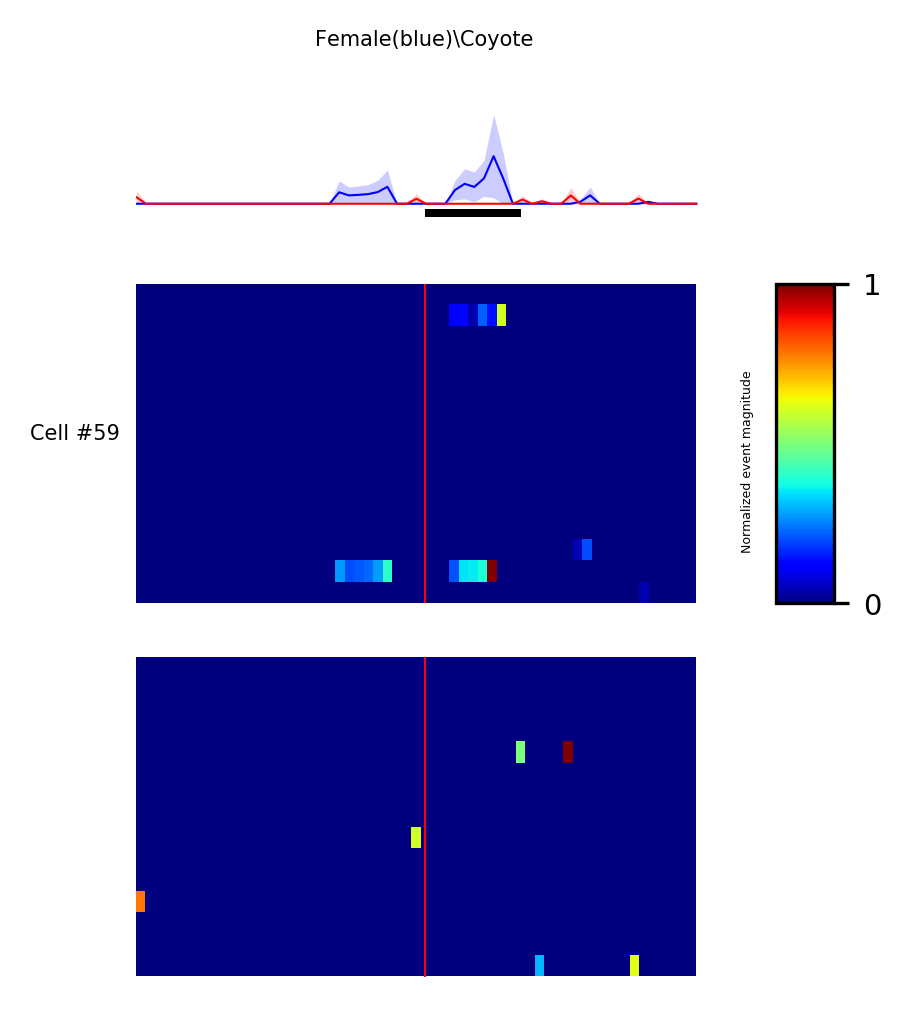

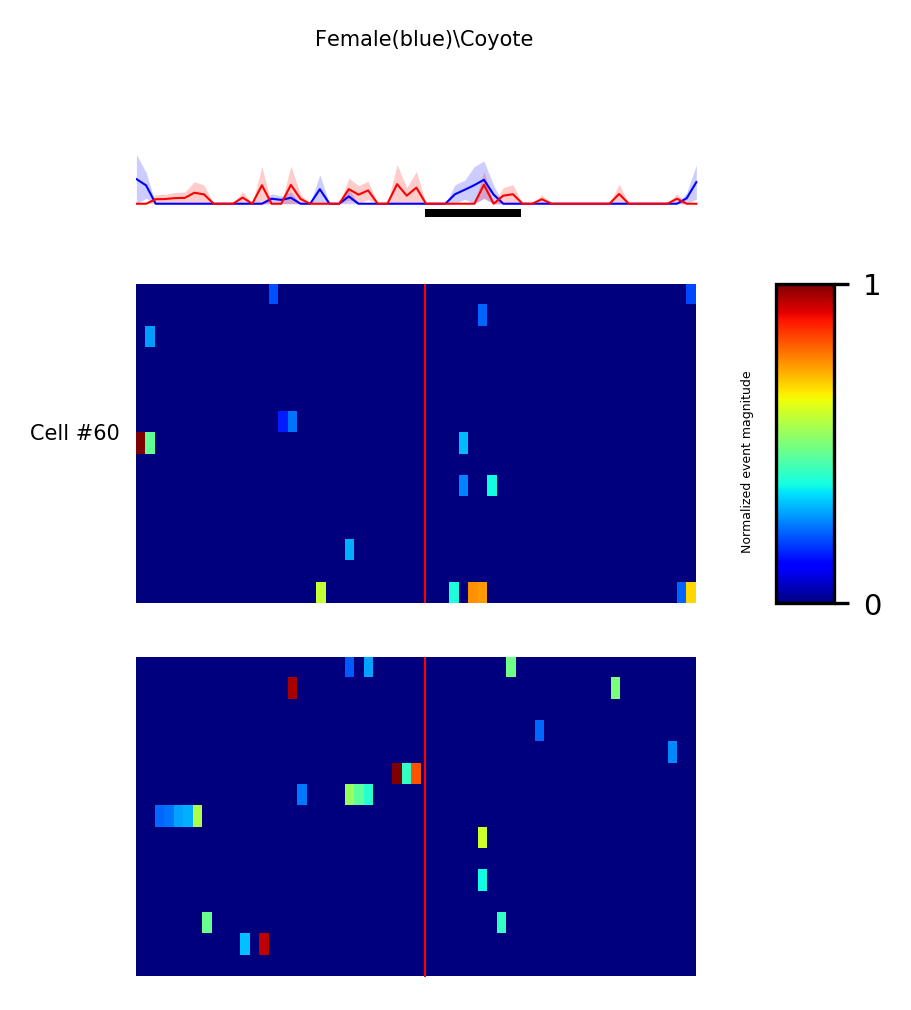

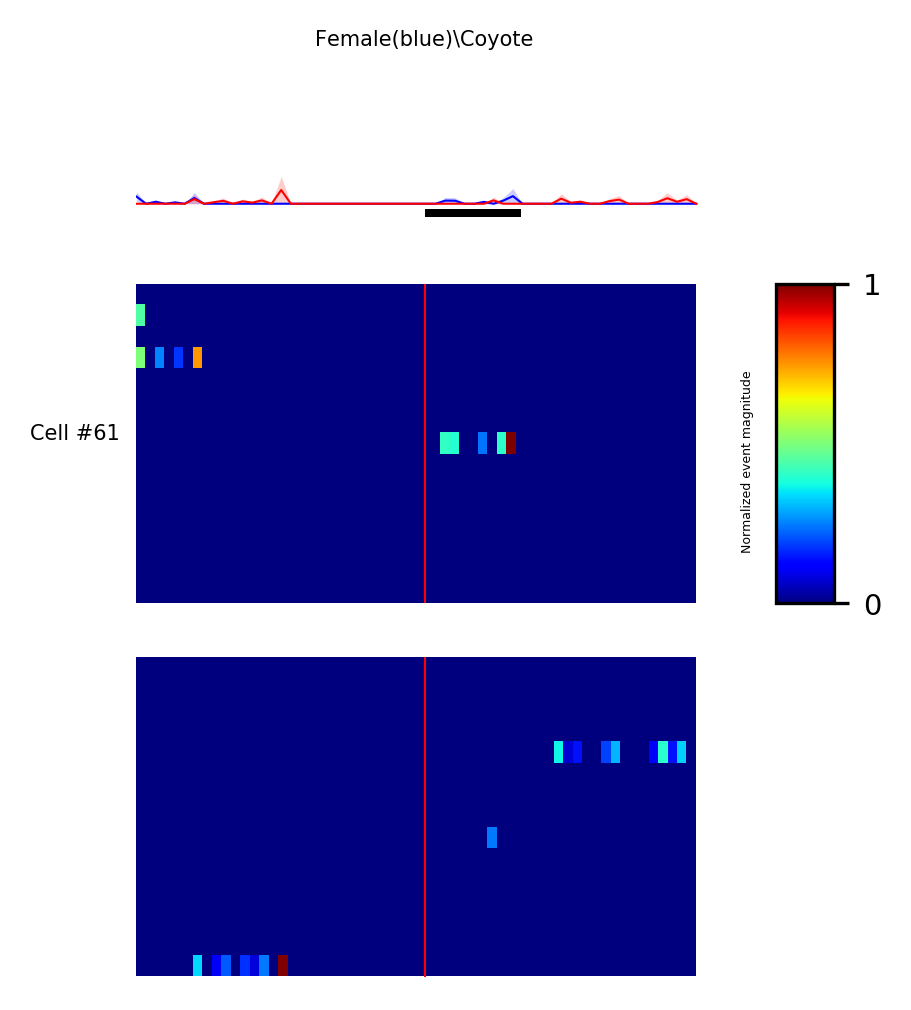

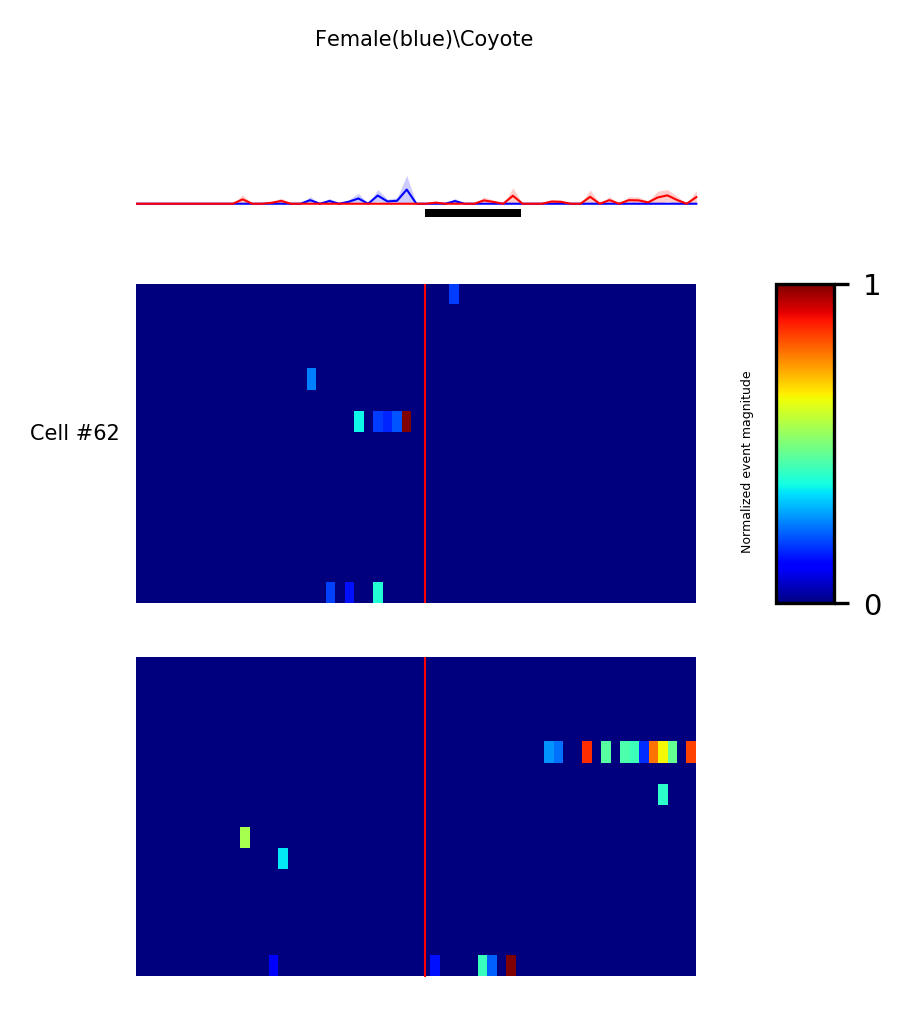

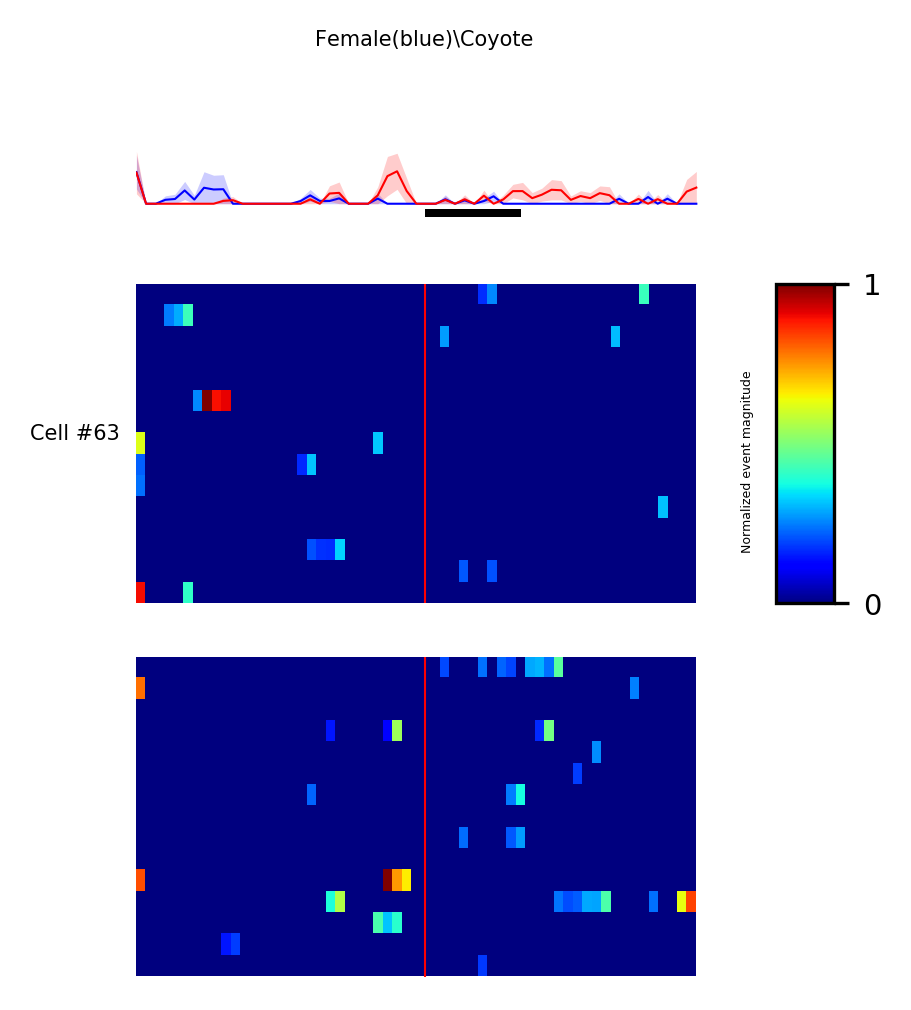

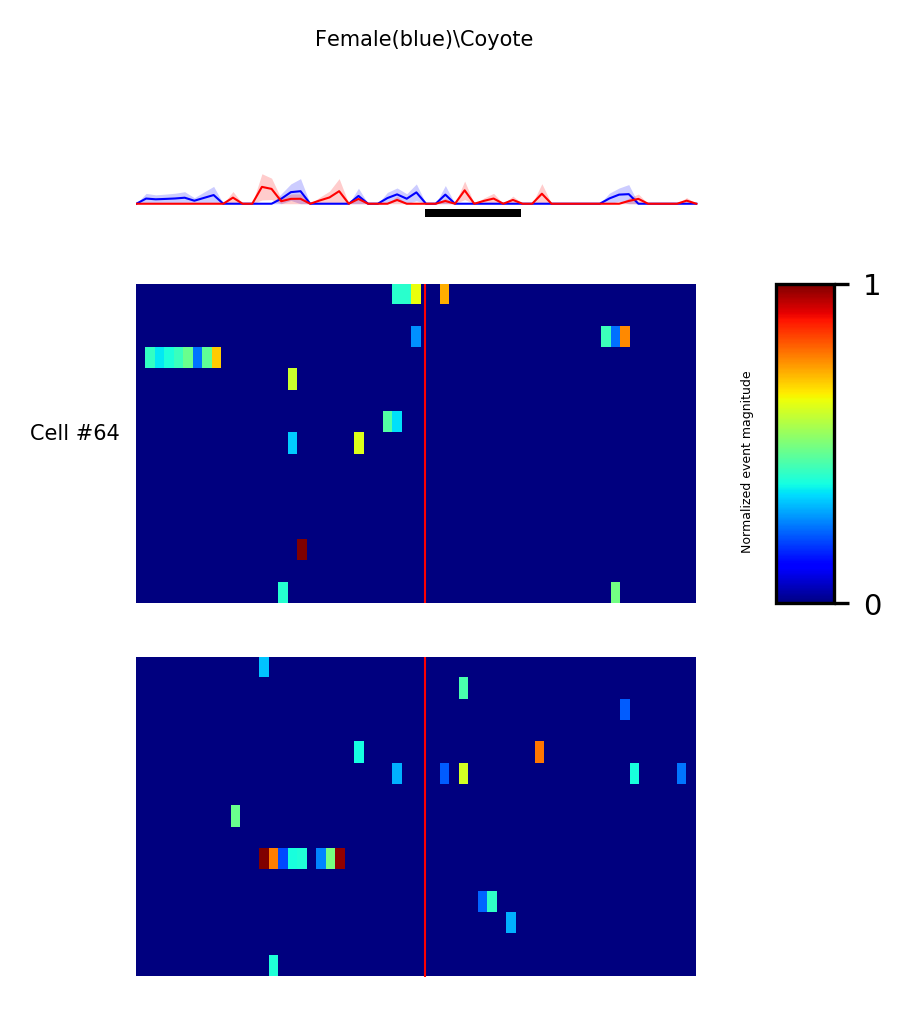

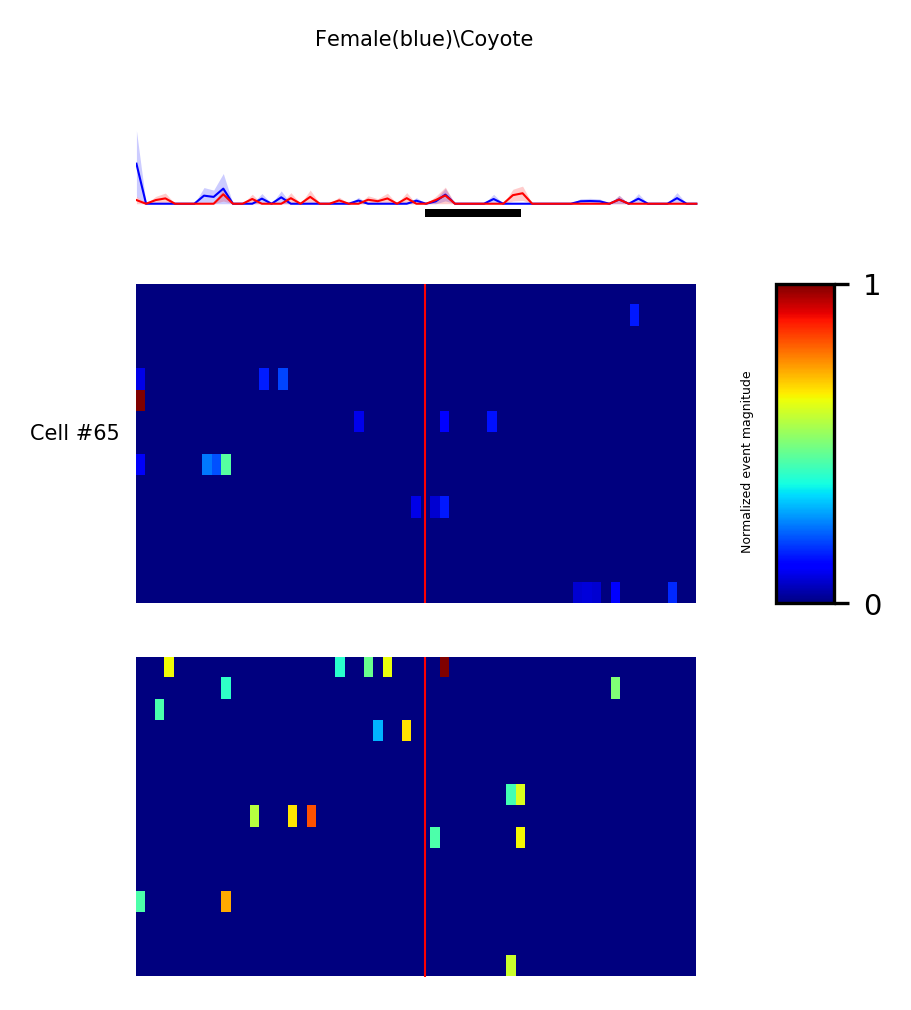

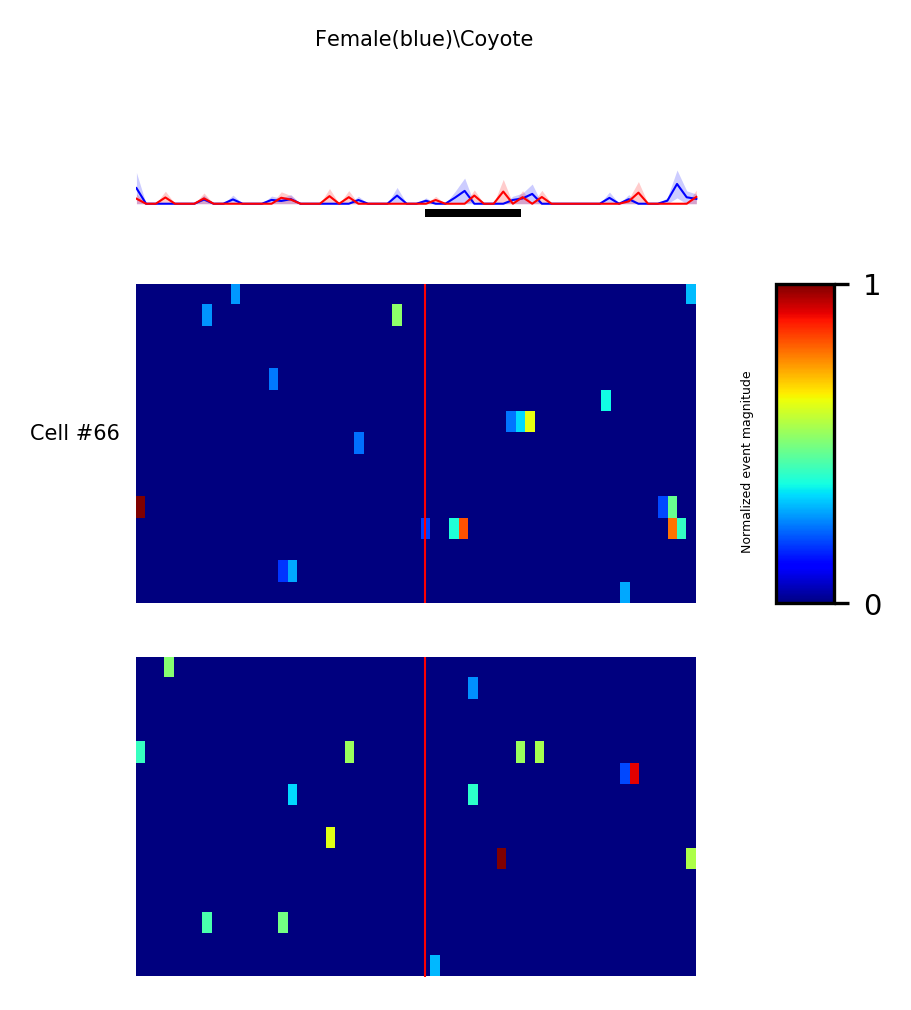

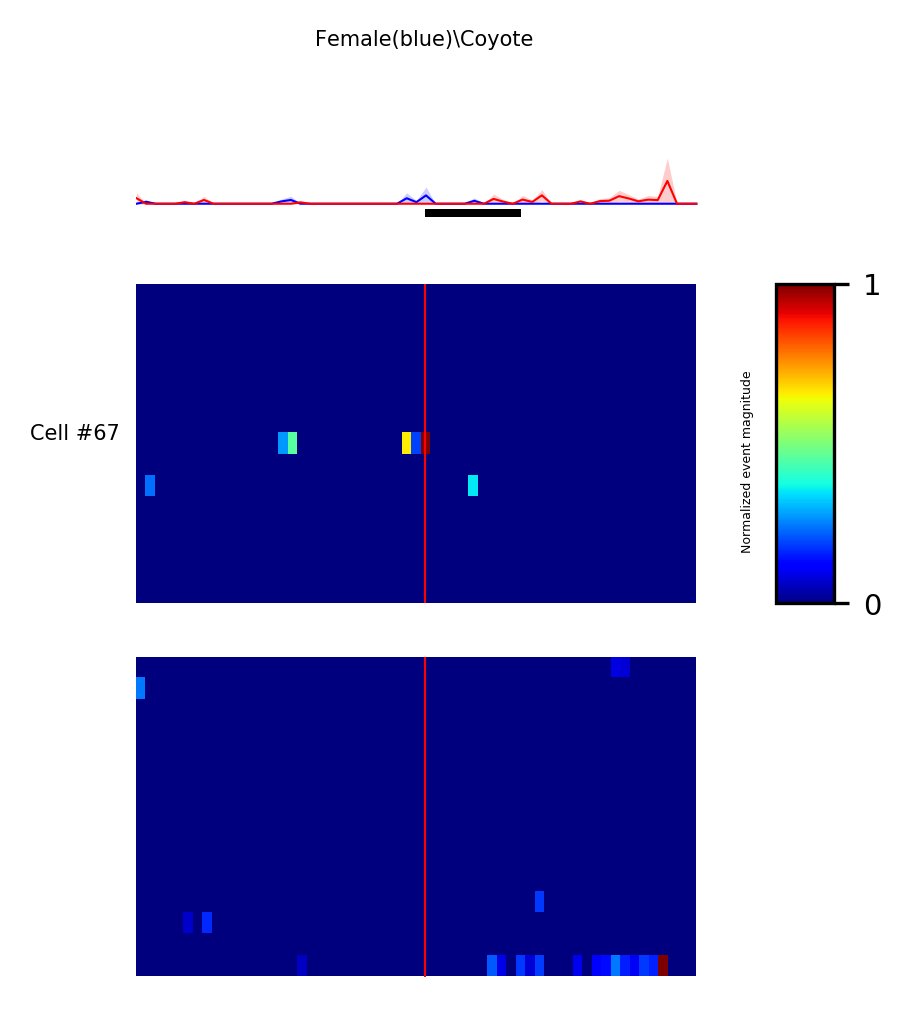

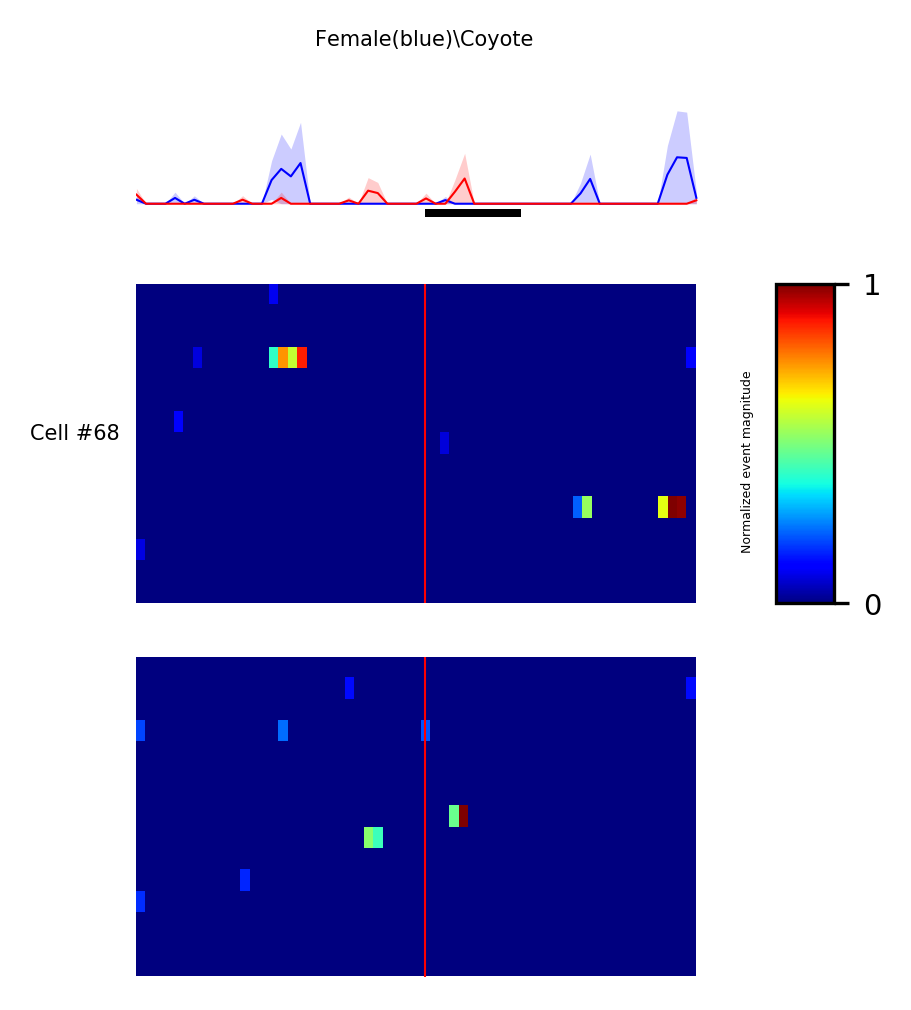

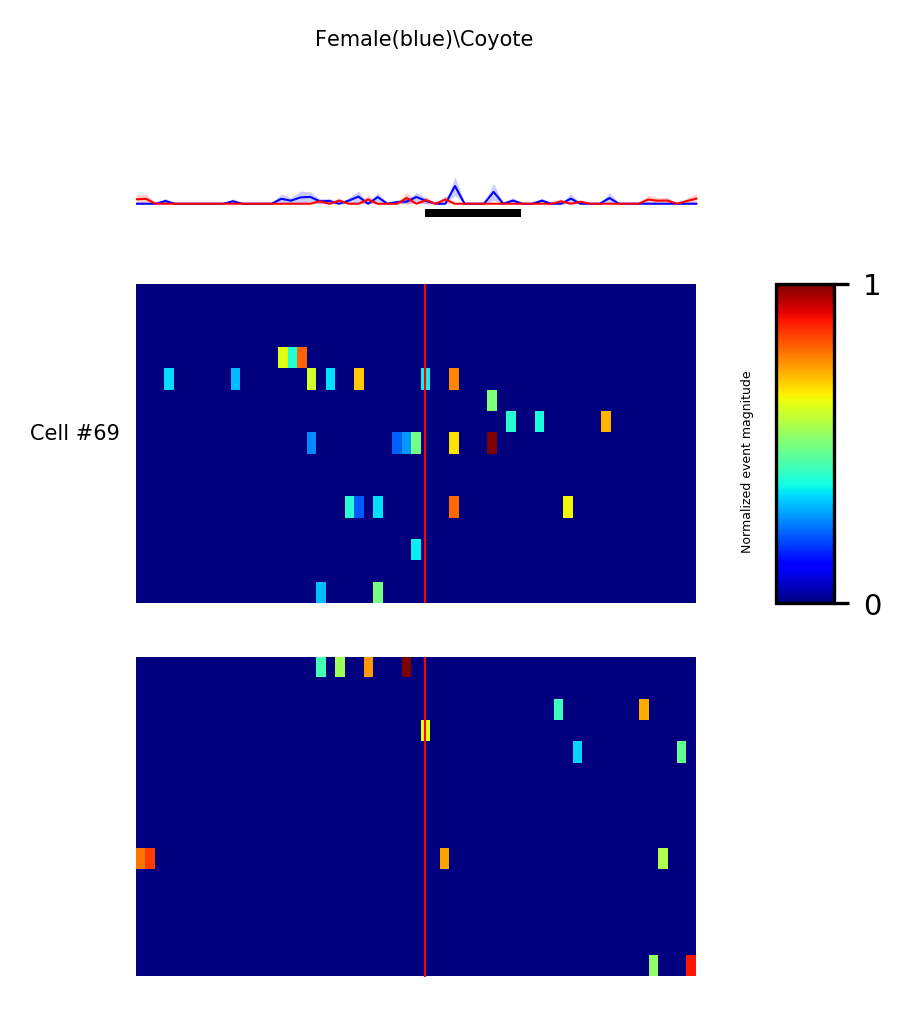

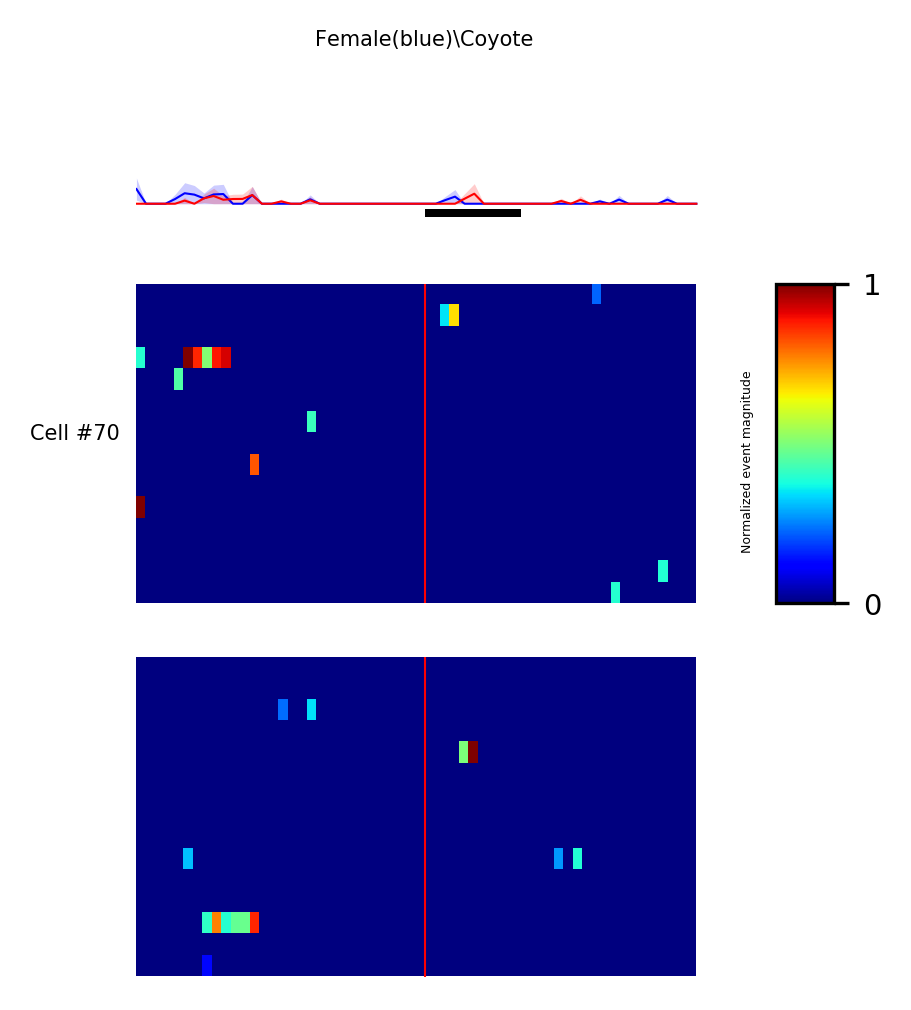

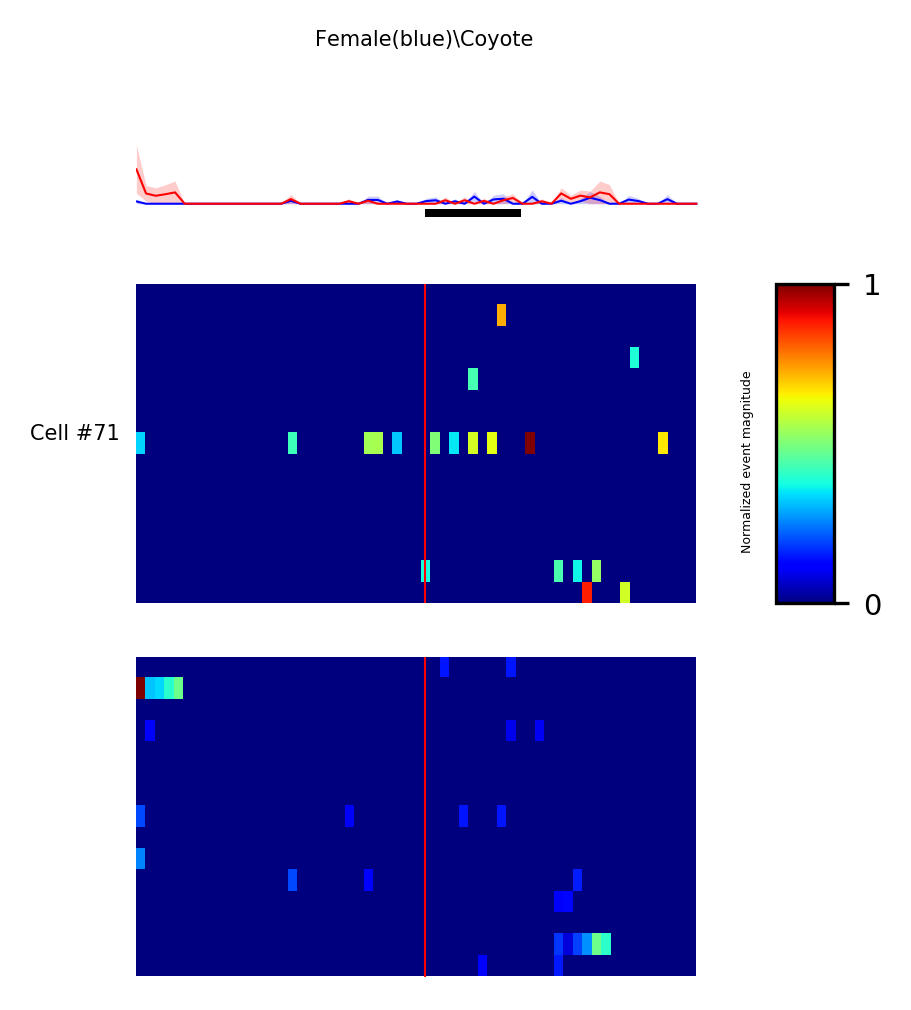

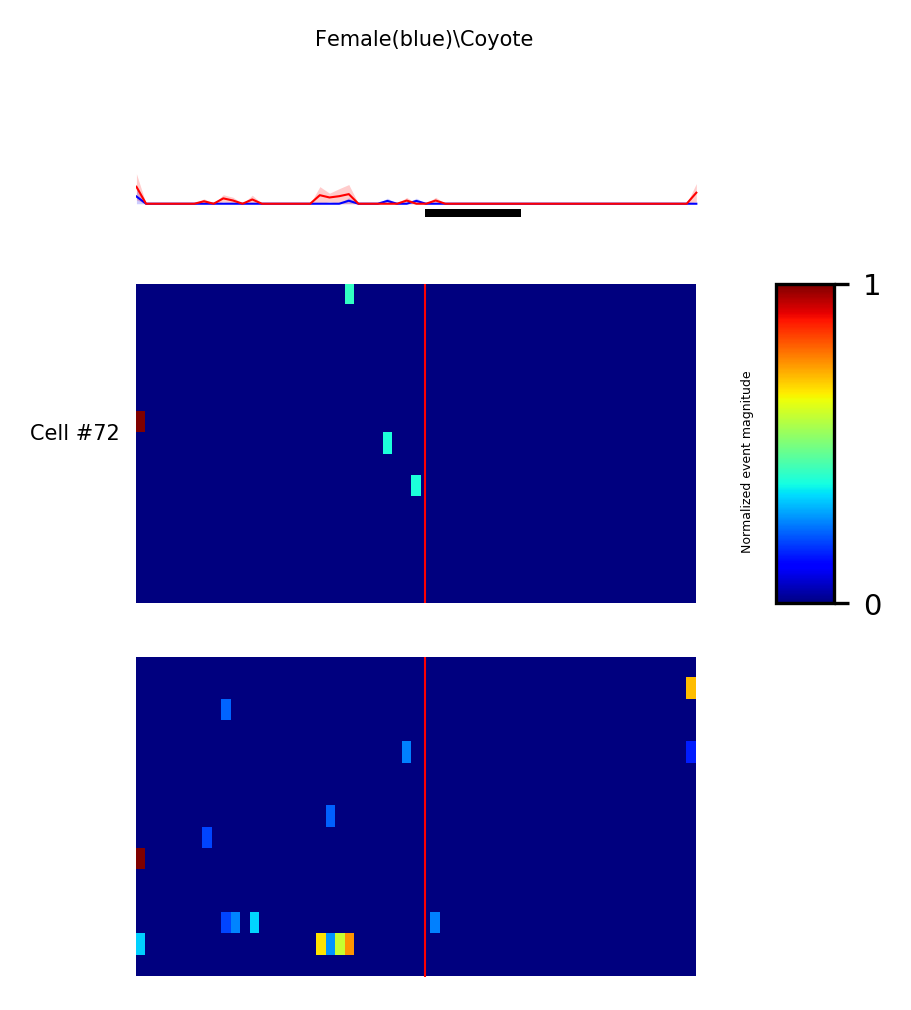

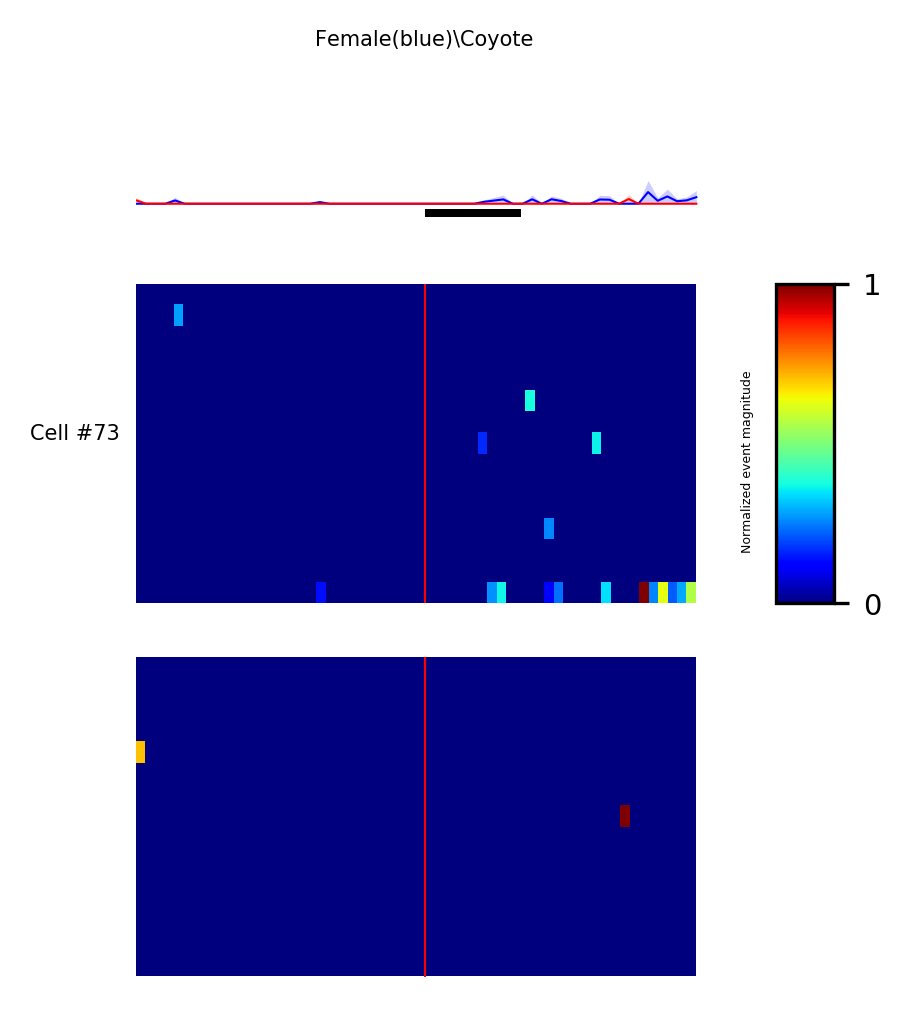

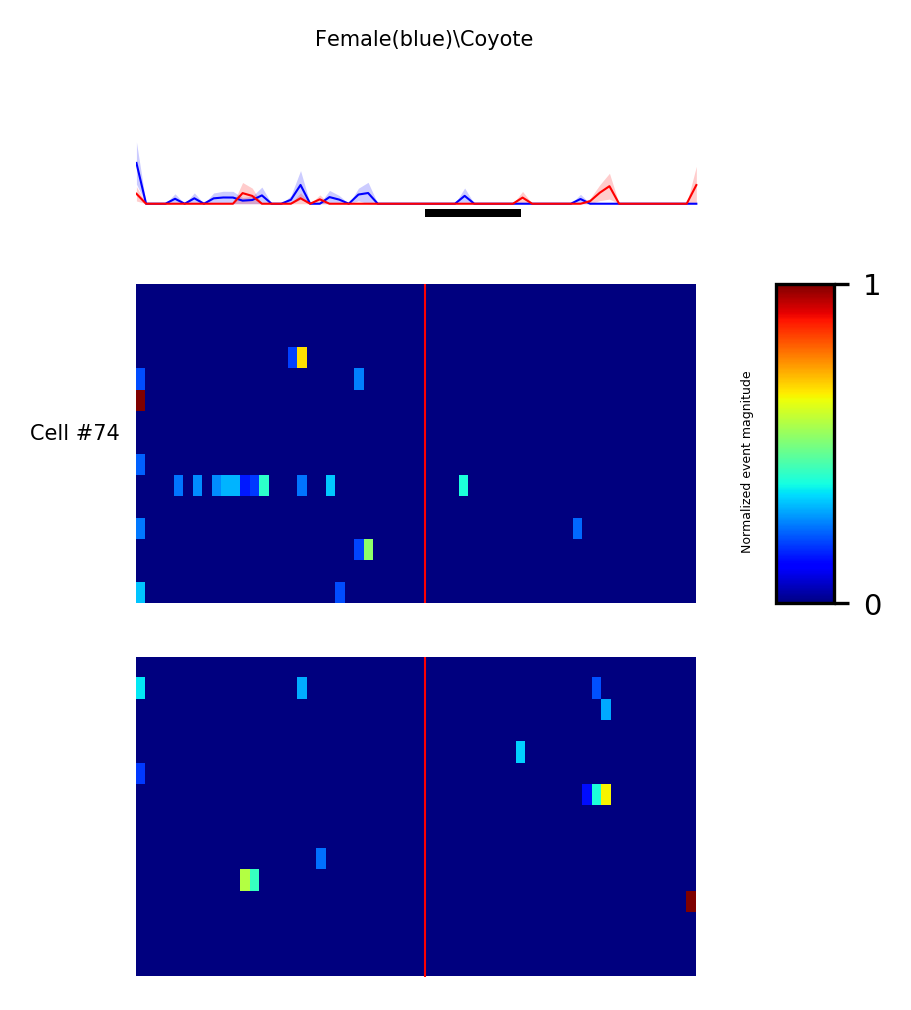

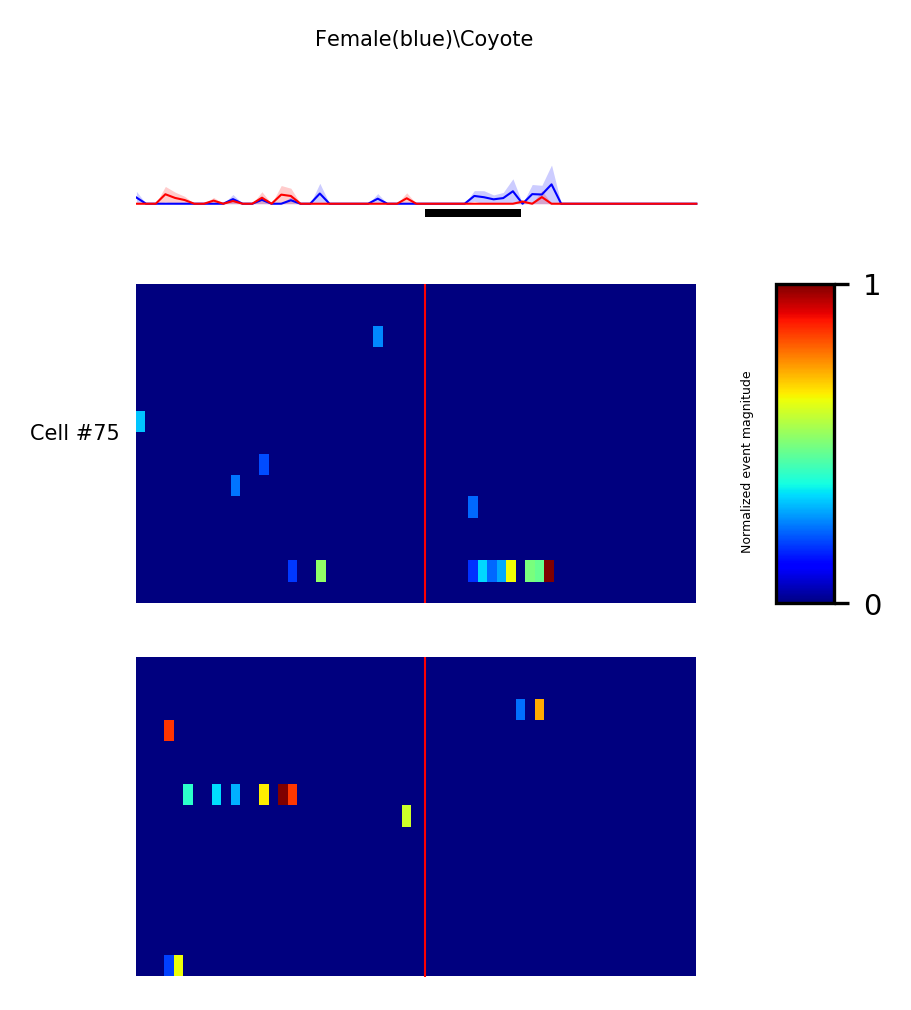

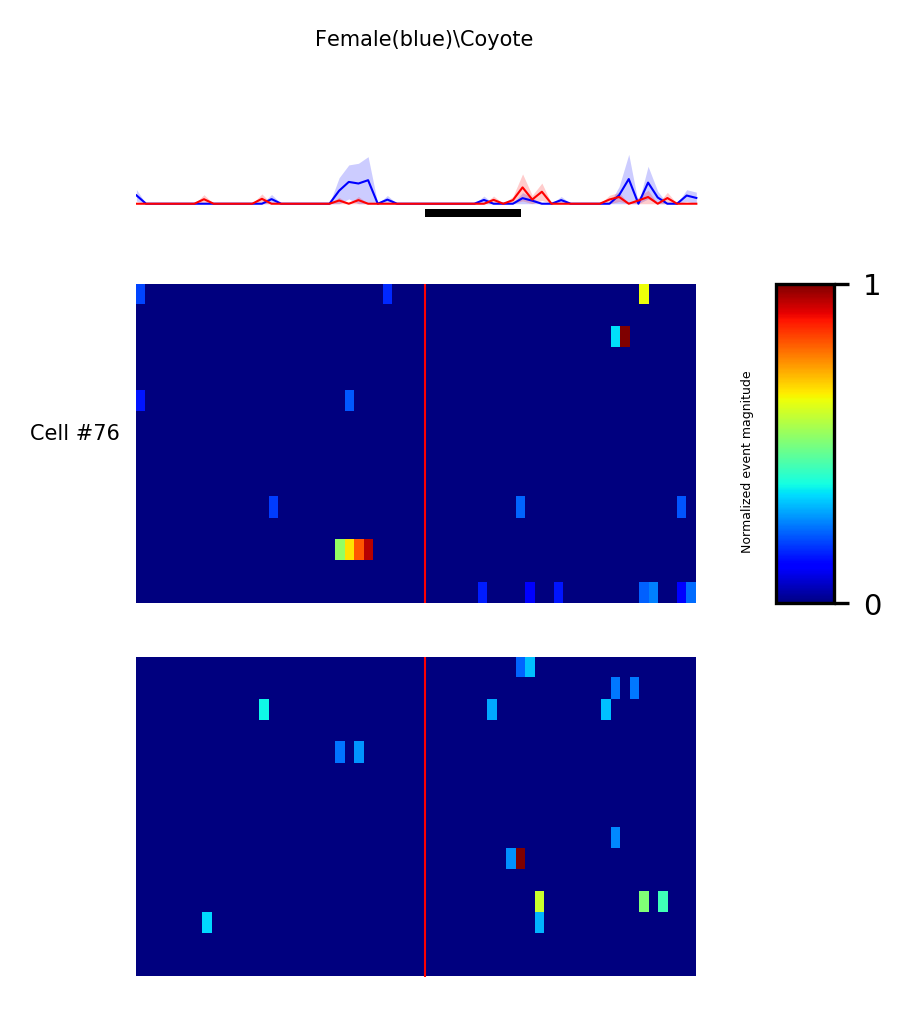

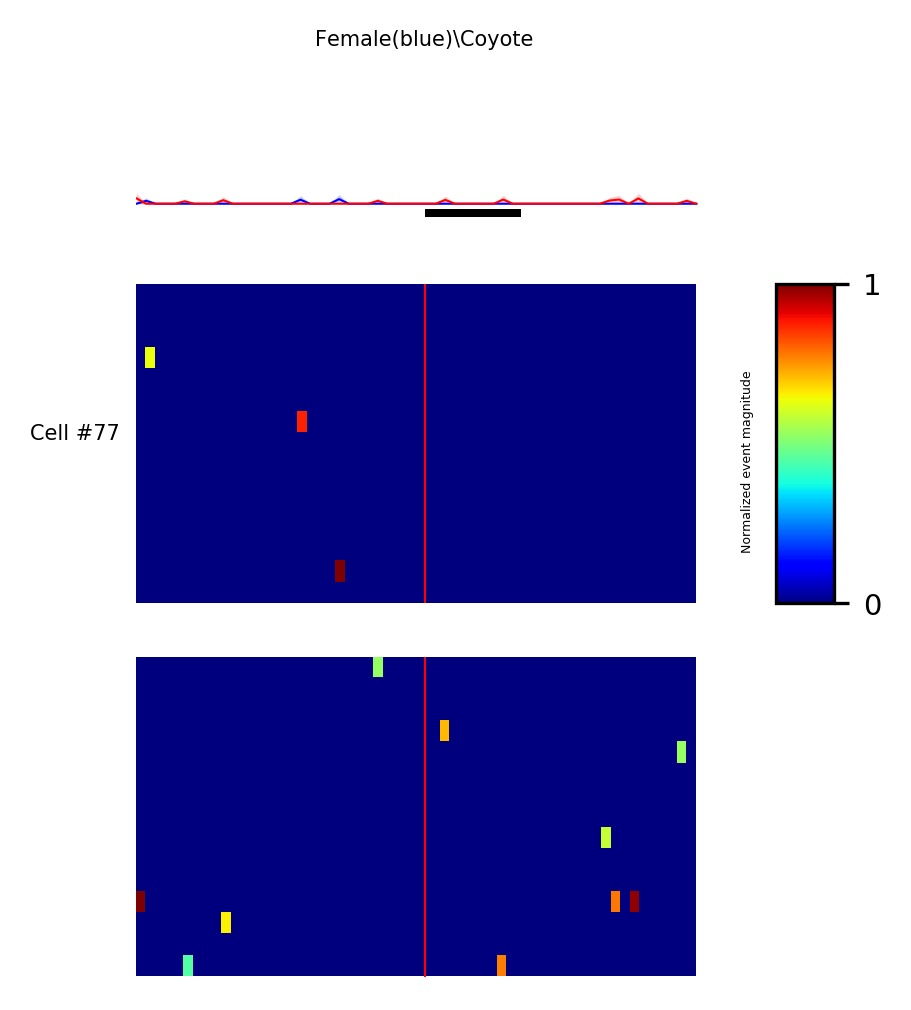

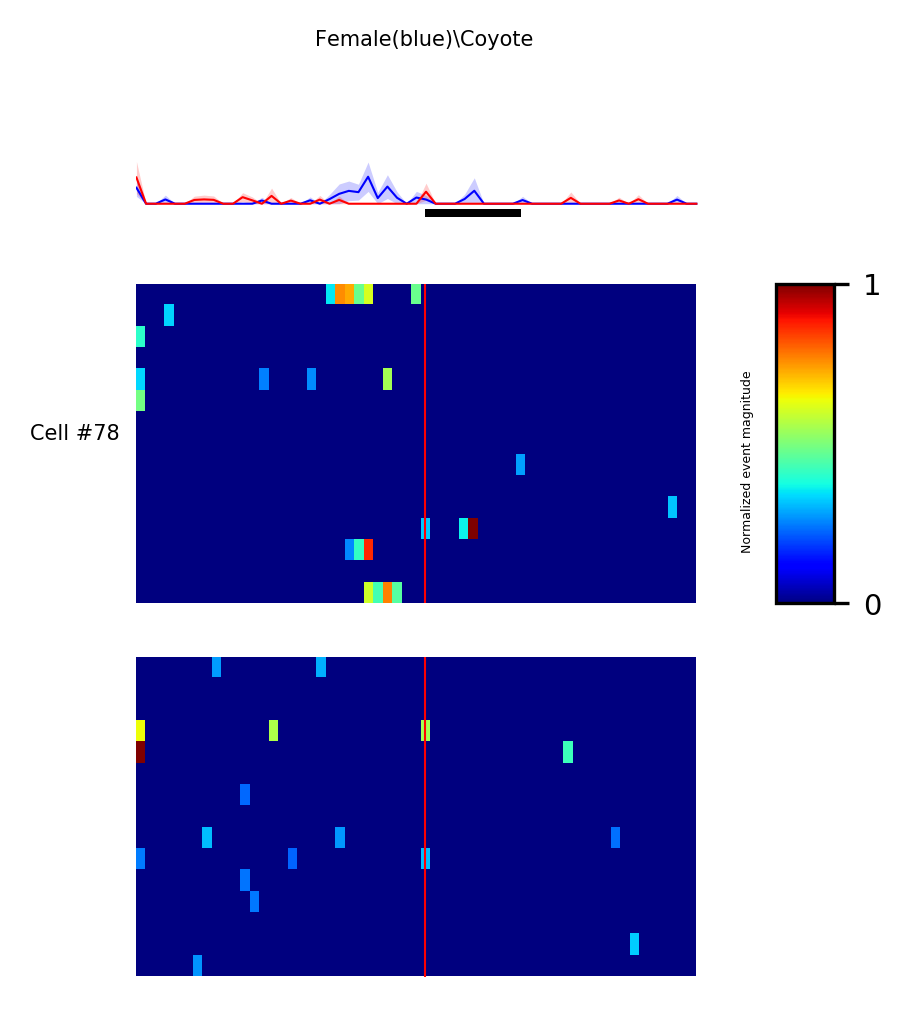

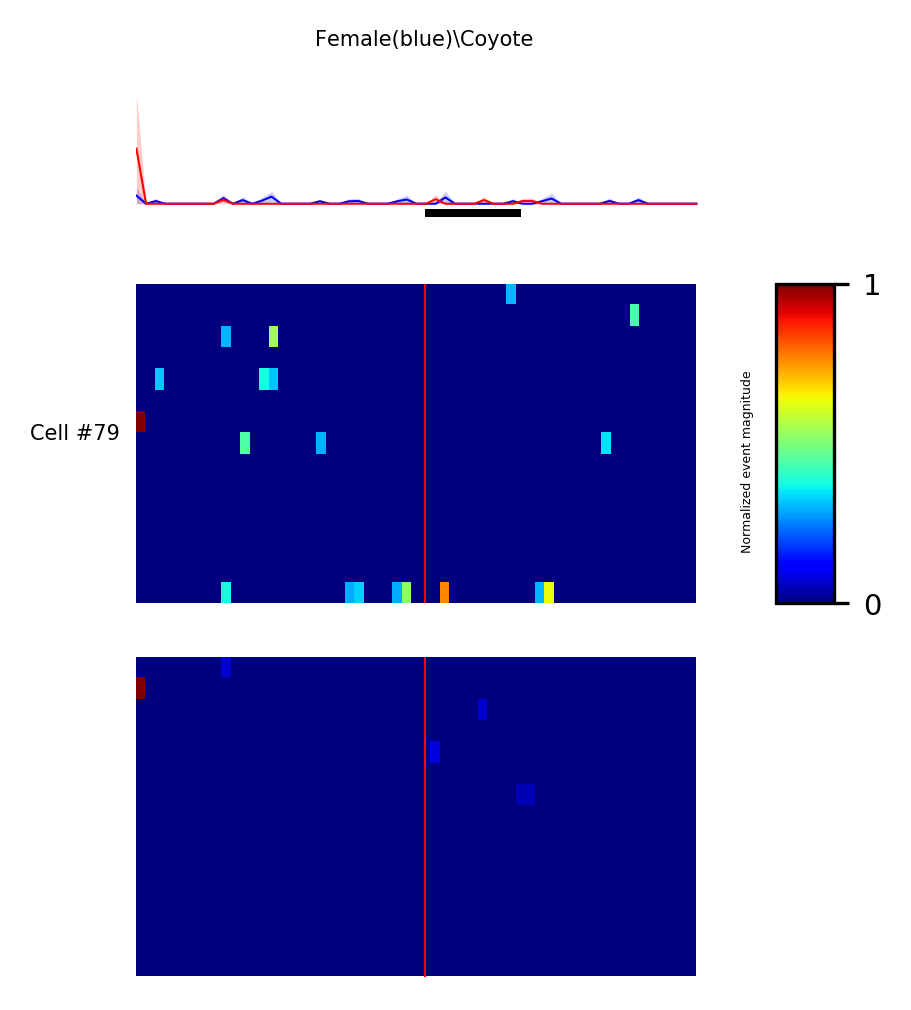

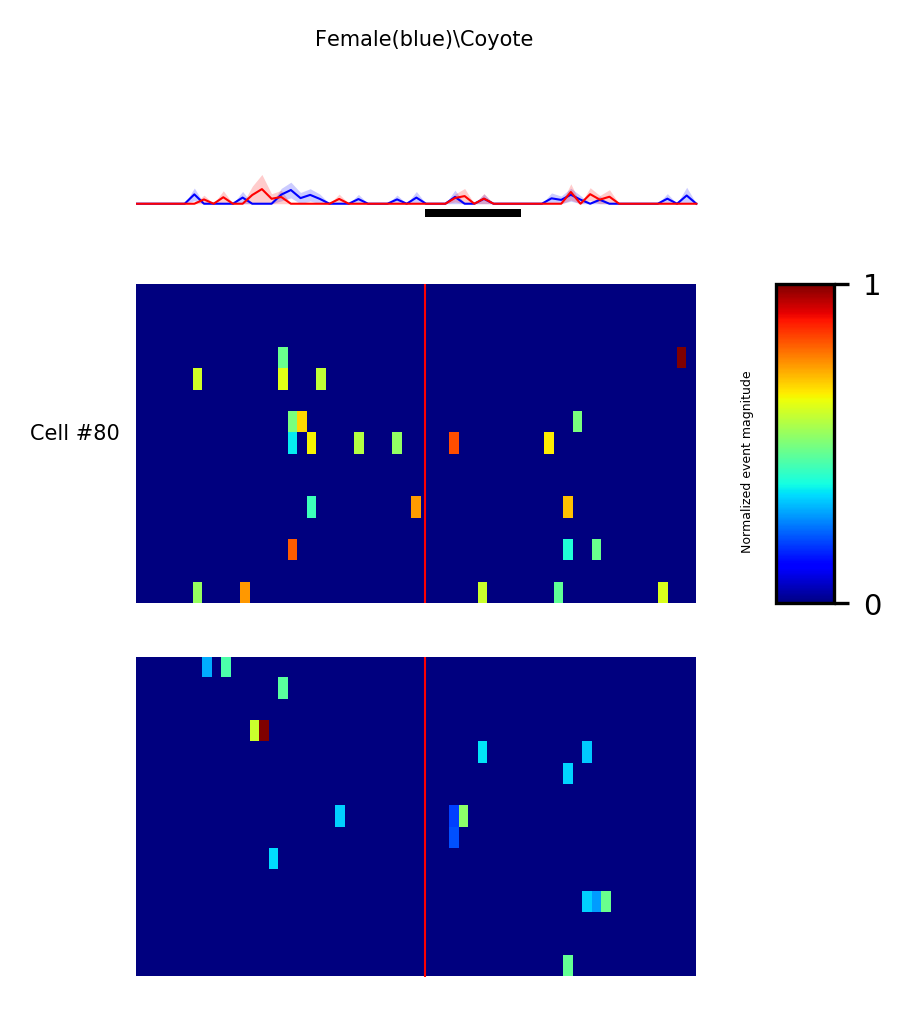

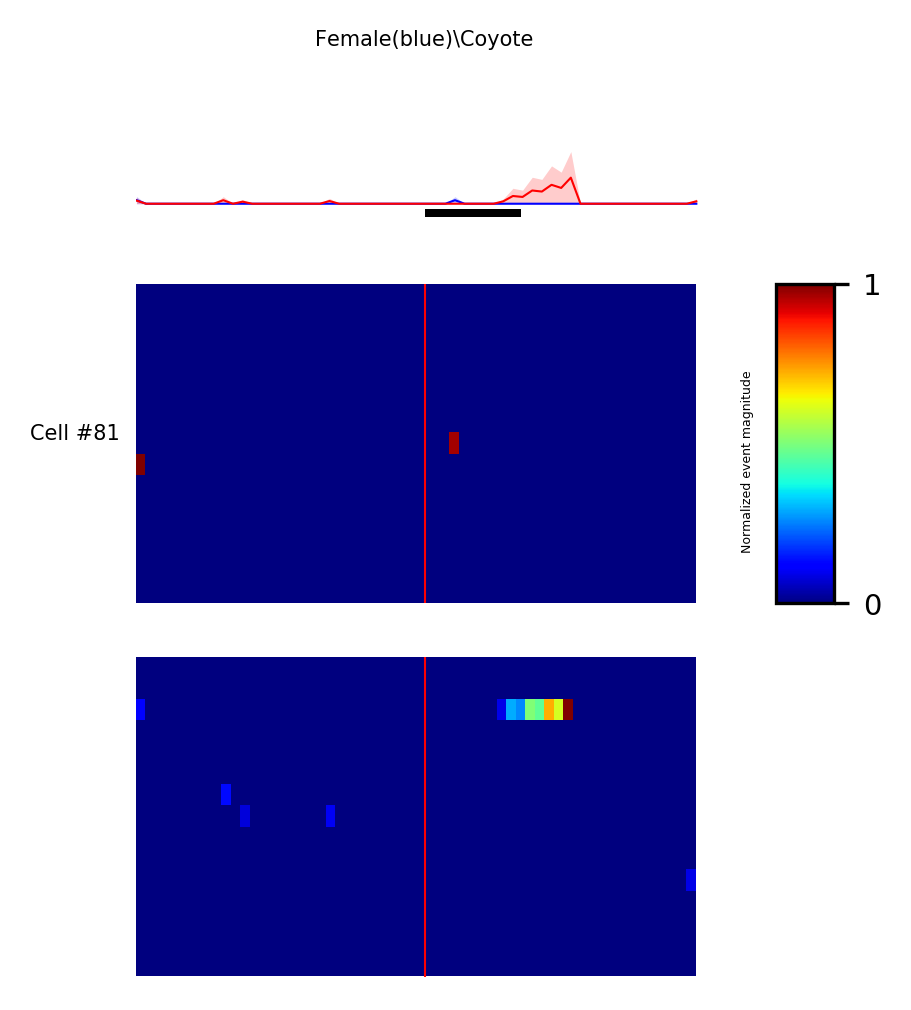

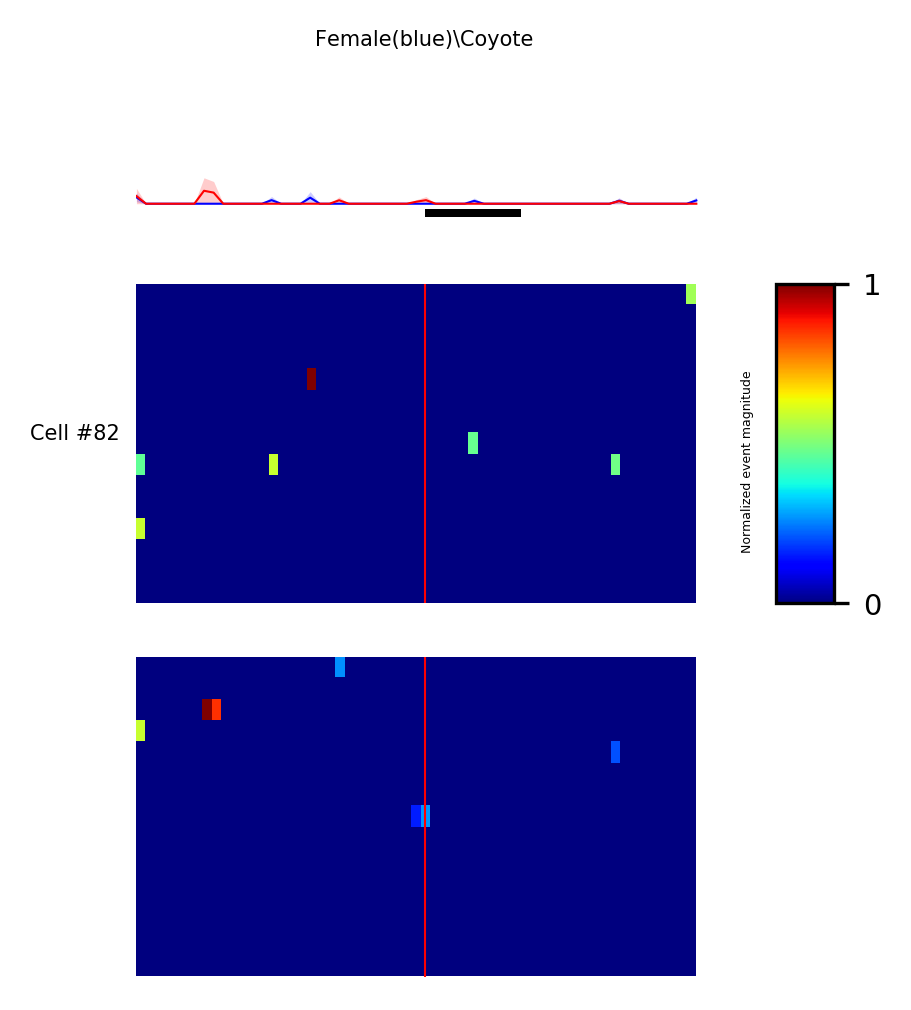

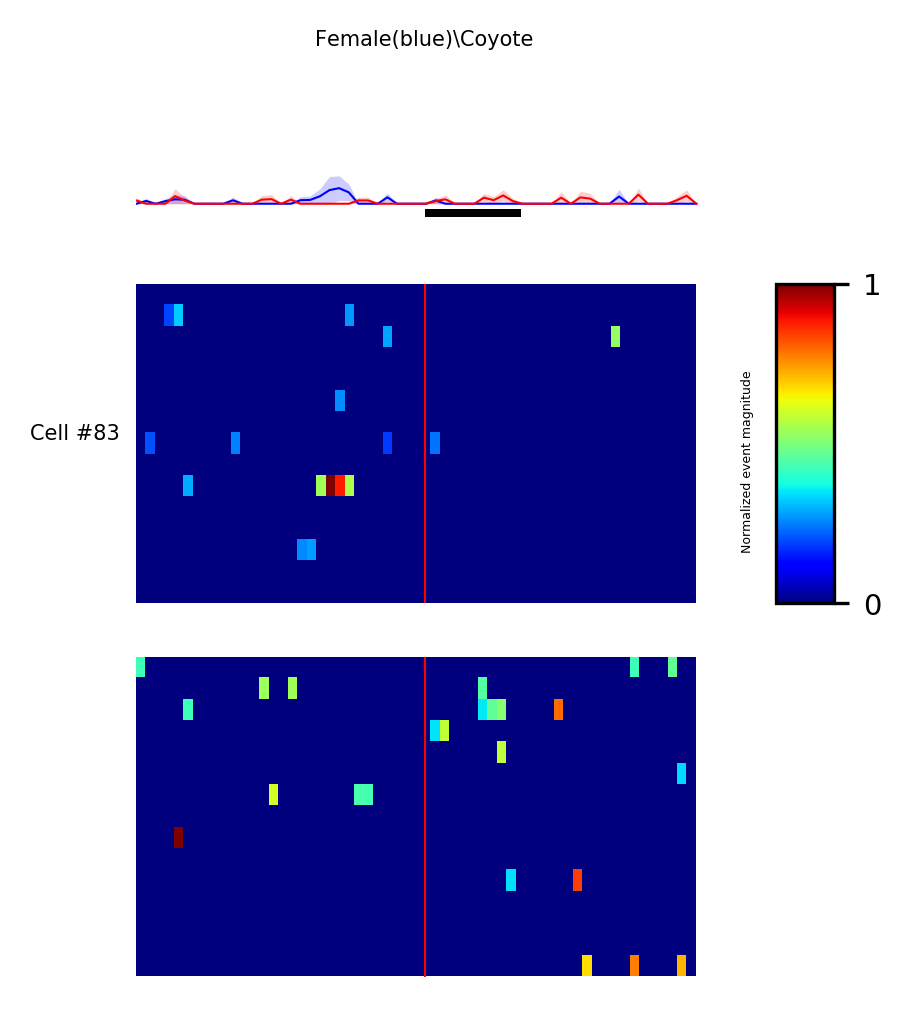

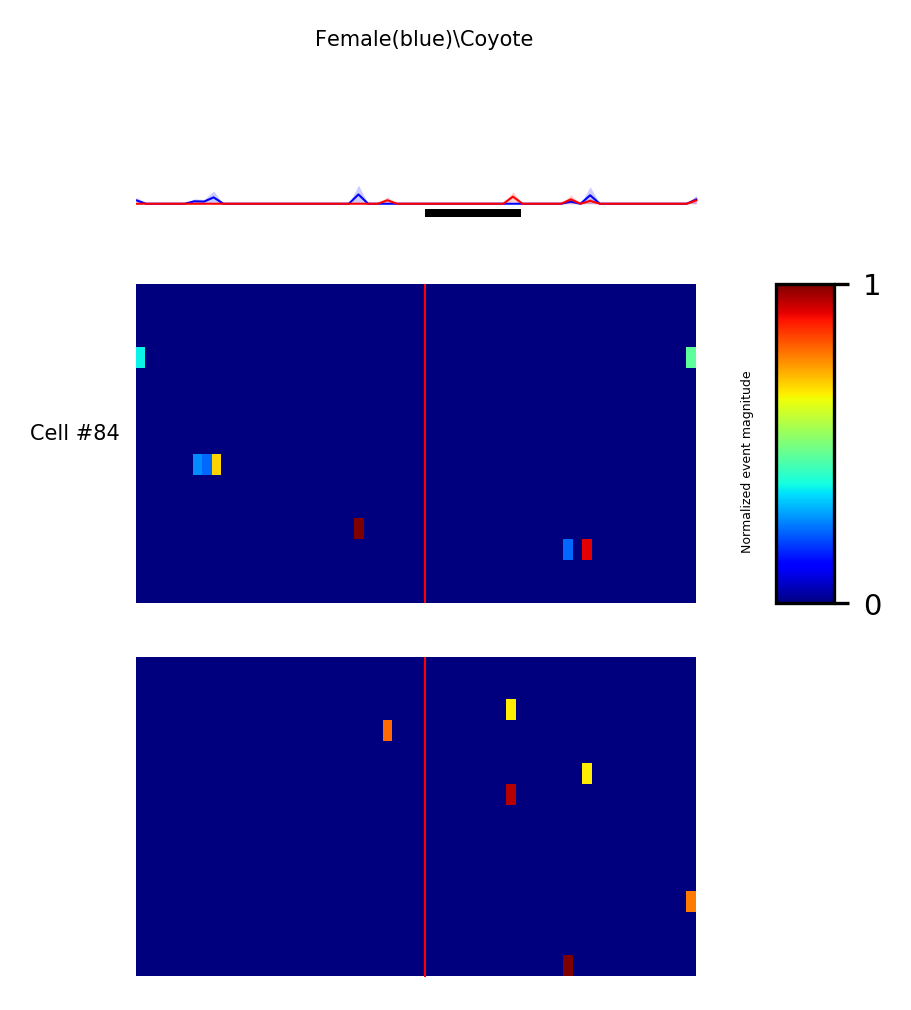

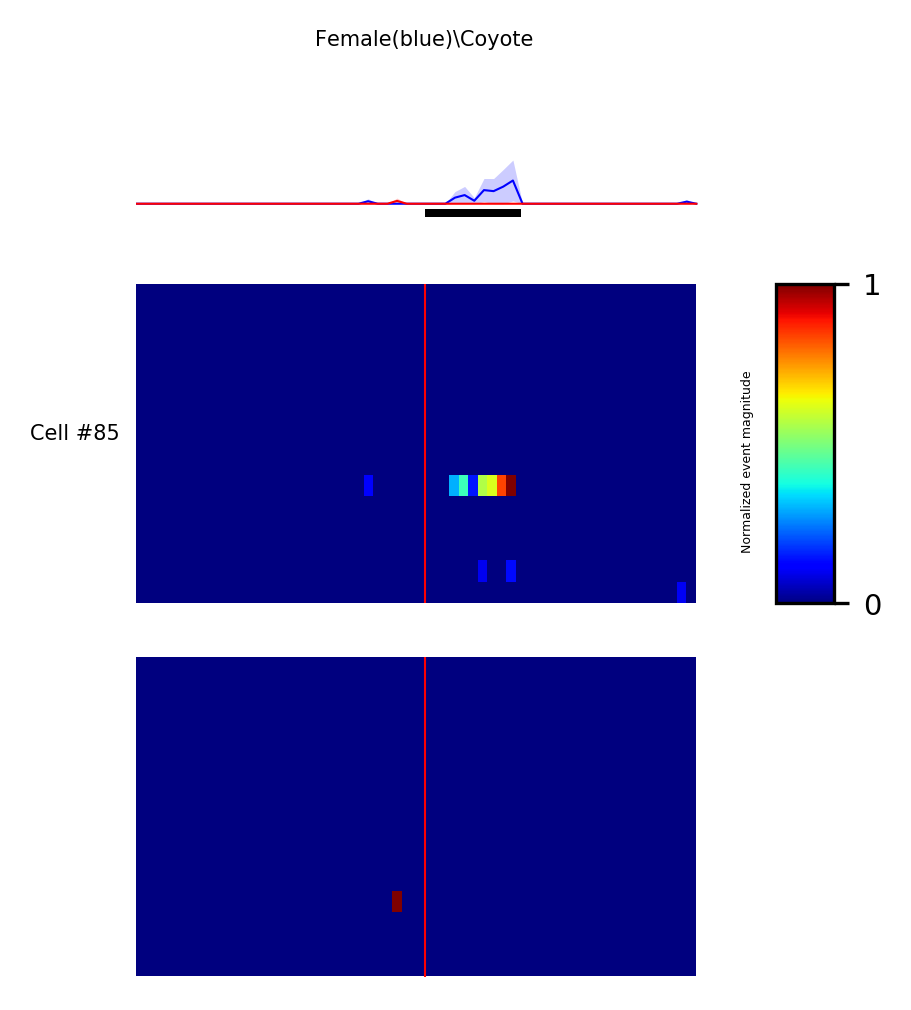

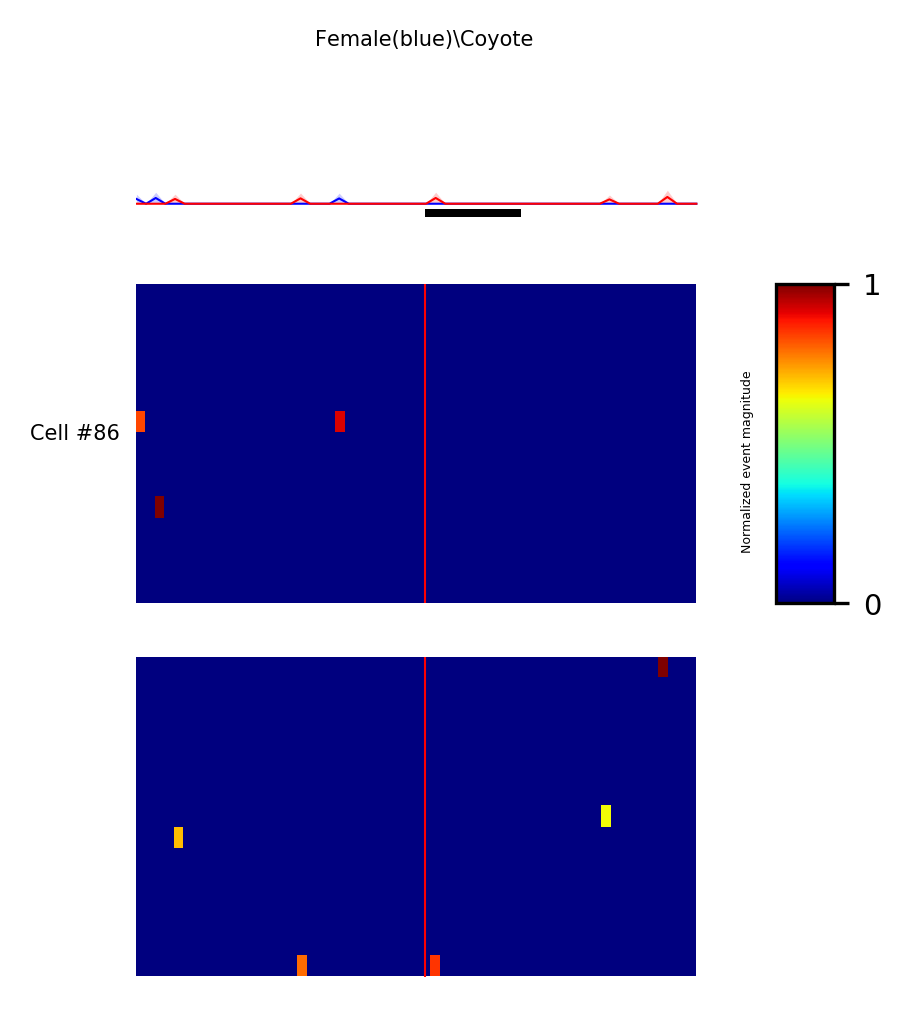

In [15]:
significance = 0.01
#t = np.where(ut.adjust_pvalues([s[1] for s in selectivity['femalet'][:, 0]])<significance)
for cell in  range(events.shape[1]): #t[0] 
    fig, axs = plot_panel(cell, cycles,
                          trial_types_top=[is_femalet],
                          trial_types_bottom=[is_coyotet],
                          lick_trials_top=is_femalet, lick_trials_bottom=is_coyotet,
                          t_start=-6, t_stop=6)
    axs[0][0].set_title('Female(blue)\Coyote', fontsize=5)
#    axs[0][1].set_title('Licks female\Licks coyote', fontsize=5)
#    axs[0][2].set_title('femaleed CS+\nNot femaleed CS+', fontsize=5)
#    axs[0][3].set_title('Licks CS+\nLicks CS-', fontsize=5)
    fig.savefig("../img/psth_cell%03d.pdf" % (cell+1))

In [16]:
su = np.where(ut.adjust_pvalues([s[1] for s in selectivity['female_4s_us'][:, 0]])<significance)

In [17]:
su[0]

array([ 4, 11, 15, 18, 30, 47])

In [18]:
sh = np.where(ut.adjust_pvalues([s[1] for s in selectivity['coyote_4s_us'][:, 0]])<significance)

In [19]:
sh[0]

array([40])

In [20]:
!pdftk ../img/psth_cell*.pdf cat output ../img/psth_booklet.pdf

In [21]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
